## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">DATA SCIENCE ... PROJECT</p>

<a id="toc"></a>

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [INTRODUCTION](#0)
* [IMPORTING MODULES, LOADING DATA & DATA REVIEW](#1)
* [PREPROCESSING](#2)
* [EXPLORATORY DATA ANALYSIS (EDA)](#3)    
* [SCALING, CATEGORICAL VARIABLES, SPLITTING](#4)
* [MODELS](#5)
* [CONCLUSION](#6)

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Introduction</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true"
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## 1.1 Information About the Project
This section provides an overview of the project, its objectives, and the expected outcomes. Students should clearly state the problem they are solving and the overall goal of the project, such as improving model performance or addressing a specific business problem.

**Objective:**  
Define the purpose of the project. Is it a classification, regression, or clustering task? Why is this problem important?

**Scope:**  
Clarify what the project will and won’t cover, emphasizing the importance of building a deployable model.

## 1.2 Description of the Dataset
Introduce the dataset selected for the project:

- **Source:** Mention the source of the dataset (e.g., Kaggle, UCI repository, government open data portals).
- **Size:** The number of records and columns.
- **Type:** Explain if it’s time series, tabular, text, or image data.

## 1.3 Description of the Columns
Provide an in-depth explanation of each feature in the dataset. Identify:

- **Target Variable:** What are you predicting (e.g., a binary or multiclass label, a continuous value)?
- **Feature Variables:** A brief description of the important columns, including their data types.

---



## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Modules, Load Data & Data Review</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [370]:
!pip install pandas==2.2.3
!pip install numpy==1.26.4
!pip install matplotlib==3.8.4
!pip install seaborn==0.13.2
!pip install missingno==0.5.2
!pip install scikit-learn==1.5.2
!pip install xgboost==2.1.2
!pip install lightgbm==4.5.0
!pip install catboost==1.2.7
!pip install imbalanced-learn==0.12.4

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler
import pickle


In [372]:
df_main = pd.read_csv('Loan_Default.csv')
df = df_main.copy()
pd.set_option("display.max_columns", df.shape[-1]) 


In [373]:
df.sample(10)

ID  year loan_limit             Gender approv_in_adv loan_type  \
92874   117764  2019         cf  Sex Not Available         nopre     type1   
76810   101700  2019         cf             Female         nopre     type1   
117898  142788  2019         cf               Male         nopre     type1   
114899  139789  2019         cf               Male         nopre     type1   
33108    57998  2019         cf              Joint         nopre     type1   
13268    38158  2019        ncf  Sex Not Available         nopre     type2   
60224    85114  2019         cf  Sex Not Available         nopre     type1   
67224    92114  2019         cf               Male         nopre     type1   
81737   106627  2019         cf  Sex Not Available         nopre     type1   
40205    65095  2019         cf              Joint         nopre     type1   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  \
92874            p4                l1        nopc                  nob/c   
76810            p3                l1        nopc                  nob/c   
117898           p4                l1        nopc                  nob/c   
114899           p4                l1        nopc                  nob/c   
33108            p4                l1        nopc                  nob/c   
13268            p1                l1        nopc                    b/c   
60224            p4                l1        nopc                  nob/c   
67224            p4                l1        nopc                  nob/c   
81737            p3                l1        nopc                  nob/c   
40205            p3                l1        nopc                  nob/c   

        loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
92874        566500             3.500               -0.0280             0.00   
76810        256500             4.875                0.8207             0.00   
117898       306500             4.875                1.3187             0.00   
114899       506500             3.625               -0.0647            96.21   
33108        606500             4.375                0.3483             0.00   
13268         96500             3.875                   NaN              NaN   
60224        146500             3.625                0.9507          4190.00   
67224        196500               NaN                   NaN              NaN   
81737        166500             4.875                0.8412             0.00   
40205        256500             4.625                0.2424          4982.50   

         term Neg_ammortization interest_only lump_sum_payment  \
92874   360.0           not_neg      int_only         not_lpsm   
76810   360.0           not_neg       not_int         not_lpsm   
117898  360.0           not_neg       not_int         not_lpsm   
114899  360.0           not_neg       not_int         not_lpsm   
33108   360.0           not_neg       not_int         not_lpsm   
13268   360.0           not_neg       not_int         not_lpsm   
60224   240.0           not_neg       not_int         not_lpsm   
67224   324.0           not_neg       not_int         not_lpsm   
81737   180.0           not_neg       not_int         not_lpsm   
40205   360.0           not_neg       not_int         not_lpsm   

        property_value construction_type occupancy_type Secured_by  \
92874         758000.0                sb             pr       home   
76810        1178000.0                sb             ir       home   
117898        348000.0                sb             pr       home   
114899        688000.0                sb             pr       home   
33108         678000.0                sb             pr       home   
13268         108000.0                sb             pr       home   
60224         168000.0                sb             pr       home   
67224         258000.0                sb             pr       home   
81737         258000.0                sb             pr       home   
40205   

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [375]:
df.shape

(148670, 34)

In [376]:
df.describe(include='all')

ID      year loan_limit  Gender approv_in_adv loan_type  \
count   148670.000000  148670.0     145326  148670        147762    148670   
unique            NaN       NaN          2       4             2         3   
top               NaN       NaN         cf    Male         nopre     type1   
freq              NaN       NaN     135348   42346        124621    113173   
mean     99224.500000    2019.0        NaN     NaN           NaN       NaN   
std      42917.476598       0.0        NaN     NaN           NaN       NaN   
min      24890.000000    2019.0        NaN     NaN           NaN       NaN   
25%      62057.250000    2019.0        NaN     NaN           NaN       NaN   
50%      99224.500000    2019.0        NaN     NaN           NaN       NaN   
75%     136391.750000    2019.0        NaN     NaN           NaN       NaN   
max     173559.000000    2019.0        NaN     NaN           NaN       NaN   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  \
count        148536            148670      148670                 148670   
unique            4                 2           2                      2   
top              p3                l1        nopc                  nob/c   
freq          55934            142344      148114                 127908   
mean            NaN               NaN         NaN                    NaN   
std             NaN               NaN         NaN                    NaN   
min             NaN               NaN         NaN                    NaN   
25%             NaN               NaN         NaN                    NaN   
50%             NaN               NaN         NaN                    NaN   
75%             NaN               NaN         NaN                    NaN   
max             NaN               NaN         NaN                    NaN   

         loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
count   1.486700e+05     112231.000000         112031.000000    109028.000000   
unique           NaN               NaN                   NaN              NaN   
top              NaN               NaN                   NaN              NaN   
freq             NaN               NaN                   NaN              NaN   
mean    3.311177e+05          4.045476              0.441656      3224.996127   
std     1.839093e+05          0.561391              0.513043      3251.121510   
min     1.650000e+04          0.000000             -3.638000         0.000000   
25%     1.965000e+05          3.625000              0.076000       581.490000   
50%     2.965000e+05          3.990000              0.390400      2596.450000   
75%     4.365000e+05          4.375000              0.775400      4812.500000   
max     3.576500e+06          8.000000              3.357000     60000.000000   

                 term Neg_ammortization interest_only lump_sum_payment  \
count   148629.000000            148549        148670           148670   
unique            NaN                 2             2                2   
top               NaN           not_neg       not_int         not_lpsm   
freq              NaN            133420        141560           145286   
mean       335.136582               NaN           NaN              NaN   
std         58.409084               NaN           NaN              NaN   
min         96.000000               NaN           NaN              NaN   
25%        360.000000               NaN           NaN              NaN   
50%        360.000000               NaN           NaN              NaN   
75%        360.000000               NaN           NaN              NaN   
max        360.000000               NaN           NaN              NaN   

        property_value construction_type occupancy_type Secured_by  \
count     1.335720e+05            148670         148670     148670   
unique             NaN                 2              3          2   
top                NaN                sb             pr       home   
freq               NaN     

In [377]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Preprocessing</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## 2.1 Data Cleaning
Cleaning the dataset is critical before any analysis. Describe any issues encountered, such as:

- **Duplicates:** Remove duplicate records.
- **Inconsistent Formats:** Address inconsistent data formats (e.g., date formats, string casing).
- **Incorrect Data:** Handle obvious data errors (e.g., negative ages or future dates).


In [378]:
willremove = []

In [379]:
df["ID"].sample(10)

73050      97940
146130    171020
146154    171044
35024      59914
121532    146422
132657    157547
40273      65163
26765      51655
659        25549
83156     108046
Name: ID, dtype: int64

In [380]:
df["ID"].nunique(),df.shape[0]

(148670, 148670)

In [381]:
willremove.append("ID")

In [382]:
df["year"].sample(10)

99025     2019
121202    2019
60228     2019
133302    2019
79730     2019
120248    2019
53871     2019
22952     2019
71782     2019
72723     2019
Name: year, dtype: int64

In [383]:
df["year"].describe()

count    148670.0
mean       2019.0
std           0.0
min        2019.0
25%        2019.0
50%        2019.0
75%        2019.0
max        2019.0
Name: year, dtype: float64

In [384]:
willremove.append("year")

In [385]:
df["loan_limit"].sample(10) 

119757    cf
145671    cf
77183     cf
46694     cf
27072     cf
45452     cf
67749     cf
13464     cf
71728     cf
6682      cf
Name: loan_limit, dtype: object

In [386]:
df["loan_limit"].value_counts(dropna=False)

loan_limit
cf     135348
ncf      9978
NaN      3344
Name: count, dtype: int64

In [387]:
willremove.append("loan_limit")

In [388]:
df["Gender"].sample(10)

59352     Sex Not Available
75765                 Joint
93961     Sex Not Available
23011                  Male
132093                Joint
14823                  Male
55902                Female
80438                 Joint
28554                 Joint
68622                Female
Name: Gender, dtype: object

In [389]:
df["Gender"].value_counts(dropna=False) , df["Gender"].isnull().sum()

(Gender
 Male                 42346
 Joint                41399
 Sex Not Available    37659
 Female               27266
 Name: count, dtype: int64,
 0)

In [390]:
df[df["Gender"]=="Sex Not Available"].sample(3)

ID  year loan_limit             Gender approv_in_adv loan_type  \
100205  125095  2019         cf  Sex Not Available         nopre     type1   
73373    98263  2019         cf  Sex Not Available         nopre     type1   
77747   102637  2019        ncf  Sex Not Available         nopre     type2   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  \
100205           p1                l1        nopc                  nob/c   
73373            p3                l1        nopc                  nob/c   
77747            p1                l1        nopc                    b/c   

        loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
100205       416500               NaN                   NaN              NaN   
73373        456500             4.500                1.0002           8787.2   
77747        386500             4.125                   NaN              0.0   

         term Neg_ammortization interest_only lump_sum_payment  \
100205  360.0           not_neg       not_int         not_lpsm   
73373   360.0           not_neg       not_int         not_lpsm   
77747   324.0           neg_amm       not_int         not_lpsm   

        property_value construction_type occupancy_type Secured_by  \
100205             NaN                sb             sr       home   
73373         578000.0                sb             pr       home   
77747         398000.0                sb             pr       home   

       total_units   income credit_type  Credit_Score  \
100205          1U   9840.0        EQUI           648   
73373           1U  13620.0        CRIF           679   
77747           1U      NaN        EQUI           876   

       co-applicant_credit_type    age submission_of_application        LTV  \
100205                      EXP  35-44                   to_inst        NaN   
73373                       EXP  65-74                   to_inst  78.979239   
77747                       EXP    NaN                       NaN  97.110553   

       Region Security_Type  Status  dtir1  
100205  south        direct       1    NaN  
73373   south        direct       0   30.0  
77747   south        direct       1    NaN

In [391]:
df.loc[df["Gender"] == "Sex Not Available", "Gender"] = np.nan

In [392]:
df["Gender"].value_counts(dropna=False), df["Gender"].isnull().sum()

(Gender
 Male      42346
 Joint     41399
 NaN       37659
 Female    27266
 Name: count, dtype: int64,
 37659)

In [393]:
willremove.append("Gender")

In [394]:
df["approv_in_adv"].sample(10)

59477    nopre
92884    nopre
11270    nopre
89903    nopre
19651    nopre
69077    nopre
12991    nopre
51279    nopre
84665    nopre
8947       pre
Name: approv_in_adv, dtype: object

In [395]:
df["approv_in_adv"].value_counts(dropna=False)

approv_in_adv
nopre    124621
pre       23141
NaN         908
Name: count, dtype: int64

In [396]:
willremove.append("approv_in_adv")

In [397]:
df["loan_type"].sample(10)

110440    type1
17800     type1
100435    type1
79660     type1
36440     type1
67000     type1
81716     type1
77660     type1
47312     type1
84840     type3
Name: loan_type, dtype: object

In [398]:
df["loan_type"].value_counts(dropna=False)

loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64

In [399]:
willremove.append("loan_type")

In [400]:
df["loan_purpose"].sample(10)

64750     p1
409       p4
77285     p3
52193     p4
23847     p4
129849    p3
136649    p3
92300     p3
32164     p3
47904     p4
Name: loan_purpose, dtype: object

In [401]:
df["loan_purpose"].value_counts(dropna=False)

loan_purpose
p3     55934
p4     54799
p1     34529
p2      3274
NaN      134
Name: count, dtype: int64

In [402]:
willremove.append("loan_purpose")

In [403]:
df["Credit_Worthiness"].sample(10)

54121     l1
37599     l1
68574     l1
35657     l1
89758     l1
23357     l1
62063     l1
129000    l1
34553     l1
100352    l1
Name: Credit_Worthiness, dtype: object

In [404]:
df["Credit_Worthiness"].value_counts(dropna=False)

Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64

In [405]:
willremove.append("Credit_Worthiness")

In [406]:
df["open_credit"].sample(10)

112136    nopc
64840     nopc
2510      nopc
120677    nopc
28192     nopc
136528    nopc
45761     nopc
46580     nopc
84629     nopc
129365    nopc
Name: open_credit, dtype: object

In [407]:
df["open_credit"].value_counts(dropna=False)

open_credit
nopc    148114
opc        556
Name: count, dtype: int64

In [408]:
willremove.append("open_credit")

In [409]:
df["business_or_commercial"].sample(10)

80380     nob/c
136991    nob/c
54647     nob/c
45020     nob/c
140316    nob/c
10855     nob/c
94746       b/c
74847     nob/c
43842     nob/c
104969    nob/c
Name: business_or_commercial, dtype: object

In [410]:
df["business_or_commercial"].value_counts(dropna=False)

business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64

In [411]:
willremove.append("business_or_commercial")

In [412]:
df["loan_amount"].sample(10)

41395      226500
23148     1256500
78298      216500
83920      206500
60747      206500
34693      146500
103681     626500
136834     346500
37718      366500
115493     206500
Name: loan_amount, dtype: int64

In [413]:
df["loan_amount"].describe(),df["loan_amount"].isnull().sum()

(count    1.486700e+05
 mean     3.311177e+05
 std      1.839093e+05
 min      1.650000e+04
 25%      1.965000e+05
 50%      2.965000e+05
 75%      4.365000e+05
 max      3.576500e+06
 Name: loan_amount, dtype: float64,
 0)

In [414]:
df["rate_of_interest"].sample(10)

36548     3.750
121792    3.990
141302    4.180
24209     3.625
67076     3.625
147047    2.990
9937      4.875
33136       NaN
88728     3.375
38266       NaN
Name: rate_of_interest, dtype: float64

In [415]:
df["rate_of_interest"].describe(),df["rate_of_interest"].isnull().sum()

(count    112231.000000
 mean          4.045476
 std           0.561391
 min           0.000000
 25%           3.625000
 50%           3.990000
 75%           4.375000
 max           8.000000
 Name: rate_of_interest, dtype: float64,
 36439)

In [416]:
willremove.append("rate_of_interest")

In [417]:
df["Interest_rate_spread"].sample(10)

126929    0.4164
2695      0.4957
14794     0.7946
71615     1.2992
81584     0.1525
10079     1.3861
42435        NaN
139959       NaN
111533    0.2951
81959    -0.3649
Name: Interest_rate_spread, dtype: float64

In [418]:
df["Interest_rate_spread"].describe(),df["Interest_rate_spread"].isnull().sum()

(count    112031.000000
 mean          0.441656
 std           0.513043
 min          -3.638000
 25%           0.076000
 50%           0.390400
 75%           0.775400
 max           3.357000
 Name: Interest_rate_spread, dtype: float64,
 36639)

In [419]:
willremove.append("Interest_rate_spread")

In [420]:
df["Upfront_charges"].sample(10)

20270        0.00
52684     1521.36
117889    4199.98
127356    1245.00
102532    4748.00
4819         0.00
123511    1480.62
106912    2346.00
145992    3055.00
148082    6490.60
Name: Upfront_charges, dtype: float64

In [421]:
df["Upfront_charges"].describe(),df["Upfront_charges"].isnull().sum()

(count    109028.000000
 mean       3224.996127
 std        3251.121510
 min           0.000000
 25%         581.490000
 50%        2596.450000
 75%        4812.500000
 max       60000.000000
 Name: Upfront_charges, dtype: float64,
 39642)

In [422]:
df["term"].sample(10)

26235     360.0
2689      360.0
136169    360.0
74145     180.0
28600     240.0
52398     360.0
38819     360.0
136802    360.0
135068    360.0
72117     360.0
Name: term, dtype: float64

In [423]:
df["term"].describe(),df["term"].isnull().sum()

(count    148629.000000
 mean        335.136582
 std          58.409084
 min          96.000000
 25%         360.000000
 50%         360.000000
 75%         360.000000
 max         360.000000
 Name: term, dtype: float64,
 41)

In [424]:
df["term"].value_counts(dropna=False)

term
360.0    121685
180.0     12981
240.0      5859
300.0      2822
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0       185
156.0       174
216.0       115
276.0       100
132.0        93
288.0        90
168.0        82
228.0        74
204.0        59
264.0        43
NaN          41
108.0        33
192.0        17
252.0         8
165.0         1
280.0         1
322.0         1
Name: count, dtype: int64

In [425]:
df["Neg_ammortization"].sample(10)

43883     neg_amm
103275    not_neg
104022    neg_amm
46204     not_neg
34311     neg_amm
34493     not_neg
45676     not_neg
102725    not_neg
64971     not_neg
112784    not_neg
Name: Neg_ammortization, dtype: object

In [426]:
df["Neg_ammortization"].value_counts(dropna=False)

Neg_ammortization
not_neg    133420
neg_amm     15129
NaN           121
Name: count, dtype: int64

In [427]:
willremove.append("Neg_ammortization")

In [428]:
df["interest_only"].sample(10)

3922      not_int
1288      not_int
79299     not_int
70186     not_int
1347      not_int
134881    not_int
89521     not_int
64202     not_int
133564    not_int
136956    not_int
Name: interest_only, dtype: object

In [429]:
df["interest_only"].value_counts(dropna=False)

interest_only
not_int     141560
int_only      7110
Name: count, dtype: int64

In [430]:
willremove.append("interest_only")

In [431]:
df["lump_sum_payment"].sample(10)

94952     not_lpsm
30935     not_lpsm
115554    not_lpsm
34922     not_lpsm
3896      not_lpsm
144808    not_lpsm
45527     not_lpsm
47909     not_lpsm
103236    not_lpsm
75320     not_lpsm
Name: lump_sum_payment, dtype: object

In [432]:
df["lump_sum_payment"].value_counts(dropna=False)

lump_sum_payment
not_lpsm    145286
lpsm          3384
Name: count, dtype: int64

In [433]:
willremove.append("lump_sum_payment")

In [434]:
df["property_value"].sample(10)

38952      308000.0
66989      388000.0
70281           NaN
55473     1228000.0
119964     138000.0
73585      158000.0
39251      258000.0
96470      488000.0
144609     638000.0
104975     228000.0
Name: property_value, dtype: float64

In [435]:
df["property_value"].describe(),df["property_value"].isnull().sum()

(count    1.335720e+05
 mean     4.978935e+05
 std      3.599353e+05
 min      8.000000e+03
 25%      2.680000e+05
 50%      4.180000e+05
 75%      6.280000e+05
 max      1.650800e+07
 Name: property_value, dtype: float64,
 15098)

In [436]:
df["construction_type"].sample(10)

126561    sb
145233    sb
20632     sb
111958    sb
98844     sb
8432      sb
102252    sb
53815     sb
35033     sb
147844    sb
Name: construction_type, dtype: object

In [437]:
df["construction_type"].value_counts(dropna=False)

construction_type
sb    148637
mh        33
Name: count, dtype: int64

In [438]:
willremove.append("construction_type")

In [439]:
df["occupancy_type"].sample(10)

80776     ir
129355    pr
51747     pr
142287    pr
131453    pr
11813     pr
98224     pr
58044     pr
62138     pr
32084     pr
Name: occupancy_type, dtype: object

In [440]:
df["occupancy_type"].value_counts(dropna=False)

occupancy_type
pr    138201
ir      7340
sr      3129
Name: count, dtype: int64

In [441]:
willremove.append("occupancy_type")

In [442]:
df["Secured_by"].sample(10)

139998    home
57143     home
33657     home
60546     home
86452     home
97668     home
138726    home
76108     home
61329     home
48860     home
Name: Secured_by, dtype: object

In [443]:
df["Secured_by"].value_counts(dropna=False)

Secured_by
home    148637
land        33
Name: count, dtype: int64

In [444]:
willremove.append("Secured_by")

In [445]:
df["total_units"].sample(10)    

145052    1U
33650     1U
123361    1U
51208     1U
95134     1U
142489    1U
54379     1U
50007     1U
130889    1U
116981    1U
Name: total_units, dtype: object

In [446]:
df["total_units"].value_counts(dropna=False)

total_units
1U    146480
2U      1477
3U       393
4U       320
Name: count, dtype: int64

In [447]:
willremove.append("total_units")

In [448]:
df["income"].sample(10)

40524     3420.0
94211     2460.0
56856     4140.0
124203    5640.0
99690     7080.0
139723    1920.0
143252    2700.0
114565    3240.0
73004     2220.0
77268     7020.0
Name: income, dtype: float64

In [449]:
df["income"].describe(),df["income"].isnull().sum()

(count    139520.000000
 mean       6957.338876
 std        6496.586382
 min           0.000000
 25%        3720.000000
 50%        5760.000000
 75%        8520.000000
 max      578580.000000
 Name: income, dtype: float64,
 9150)

In [450]:
df["credit_type"].sample(10)

25753     EXP
48100     CIB
53522     EXP
654       CIB
14382    CRIF
25326     EXP
13693     CIB
60311     EXP
99473    CRIF
55923    CRIF
Name: credit_type, dtype: object

In [451]:
df["credit_type"].value_counts(dropna=False)

credit_type
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: count, dtype: int64

In [452]:
willremove.append("credit_type")

In [453]:
df["Credit_Score"].sample(10)

84102     847
129770    568
123219    813
89076     790
3539      789
96465     579
53741     840
85621     550
77964     804
131223    557
Name: Credit_Score, dtype: int64

In [454]:
df["Credit_Score"].describe(),df["Credit_Score"].isnull().sum()

(count    148670.000000
 mean        699.789103
 std         115.875857
 min         500.000000
 25%         599.000000
 50%         699.000000
 75%         800.000000
 max         900.000000
 Name: Credit_Score, dtype: float64,
 0)

In [455]:
df["co-applicant_credit_type"].sample(10)

20433     EXP
76999     EXP
52397     EXP
24350     CIB
44550     EXP
83790     CIB
111508    EXP
50917     EXP
110366    EXP
104302    CIB
Name: co-applicant_credit_type, dtype: object

In [456]:
df["co-applicant_credit_type"].value_counts(dropna=False)

co-applicant_credit_type
CIB    74392
EXP    74278
Name: count, dtype: int64

In [457]:
willremove.append("co-applicant_credit_type")

In [458]:
df["age"].sample(10)

128613    35-44
83798     45-54
27118     25-34
146068    25-34
21833     35-44
105567    35-44
109161    45-54
44506     45-54
36639       >74
69550     35-44
Name: age, dtype: object

In [459]:
df["age"].value_counts(dropna=False)

age
45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
NaN        200
Name: count, dtype: int64

In [460]:
df["submission_of_application"].sample(10)

111290    not_inst
5107      not_inst
126029     to_inst
28926     not_inst
58720     not_inst
122747     to_inst
40412      to_inst
126316     to_inst
108088     to_inst
38769      to_inst
Name: submission_of_application, dtype: object

In [461]:
df["submission_of_application"].value_counts(dropna=False)

submission_of_application
to_inst     95814
not_inst    52656
NaN           200
Name: count, dtype: int64

In [462]:
willremove.append("submission_of_application")

In [463]:
df["LTV"].sample(10)

107084     85.326087
38748      51.008065
89576      87.133891
115580           NaN
108951     68.208661
93799      58.756039
40978            NaN
1082      119.444444
16999      91.666667
122236     84.855769
Name: LTV, dtype: float64

In [464]:
df["LTV"].describe(),df["LTV"].isnull().sum()       

(count    133572.000000
 mean         72.746457
 std          39.967603
 min           0.967478
 25%          60.474860
 50%          75.135870
 75%          86.184211
 max        7831.250000
 Name: LTV, dtype: float64,
 15098)

In [465]:
df["Region"].sample(10)

89623       North
136968      North
11696     central
101087      south
65452       south
6615        south
146476      south
141313      south
135352      North
30349       south
Name: Region, dtype: object

In [466]:
df["Region"].value_counts(dropna=False)

Region
North         74722
south         64016
central        8697
North-East     1235
Name: count, dtype: int64

In [467]:
willremove.append("Region")

In [468]:
df["Security_Type"].sample(10)

123922    direct
46494     direct
120935    direct
99744     direct
137517    direct
41215     direct
61790     direct
4063      direct
128285    direct
114176    direct
Name: Security_Type, dtype: object

In [469]:
df["Security_Type"].value_counts(dropna=False)

Security_Type
direct      148637
Indriect        33
Name: count, dtype: int64

In [470]:
willremove.append("Security_Type")

In [471]:
df["Status"].sample(10)

36088     1
68508     0
78392     1
98628     1
102569    0
59423     0
10287     1
44287     0
527       0
145845    1
Name: Status, dtype: int64

In [472]:
df["Status"].value_counts(dropna=False) 

Status
0    112031
1     36639
Name: count, dtype: int64

In [473]:
df["dtir1"].sample(10)

71481     41.0
79078     40.0
137103    44.0
76683     31.0
11495     43.0
147160    29.0
142231    32.0
73963     45.0
13522     45.0
85703      NaN
Name: dtir1, dtype: float64

In [474]:
df["dtir1"].describe(),df["dtir1"].isnull().sum()

(count    124549.000000
 mean         37.732932
 std          10.545435
 min           5.000000
 25%          31.000000
 50%          39.000000
 75%          45.000000
 max          61.000000
 Name: dtir1, dtype: float64,
 24121)

In [475]:
[i for i in df.columns if not i in willremove]

['loan_amount',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'age',
 'LTV',
 'Status',
 'dtir1']

In [476]:
df_old = df.copy()

In [477]:
df.drop(willremove,axis=1,inplace=True)

In [478]:
df.head()

loan_amount  Upfront_charges   term  property_value   income  Credit_Score  \
0       116500              NaN  360.0        118000.0   1740.0           758   
1       206500              NaN  360.0             NaN   4980.0           552   
2       406500            595.0  360.0        508000.0   9480.0           834   
3       456500              NaN  360.0        658000.0  11880.0           587   
4       696500              0.0  360.0        758000.0  10440.0           602   

     age        LTV  Status  dtir1  
0  25-34  98.728814       1   45.0  
1  55-64        NaN       1    NaN  
2  35-44  80.019685       0   46.0  
3  45-54  69.376900       0   42.0  
4  25-34  91.886544       0   39.0

## 2.2 Missing Value Analysis
Evaluate the dataset for missing values:

- **Percentage of Missing Data:** Identify the percentage of missing data for each feature.
- **Handling Missing Data:** Explain the strategy used to handle missing values (e.g., removal, imputation using mean, median, mode, or more advanced methods).

<Axes: >

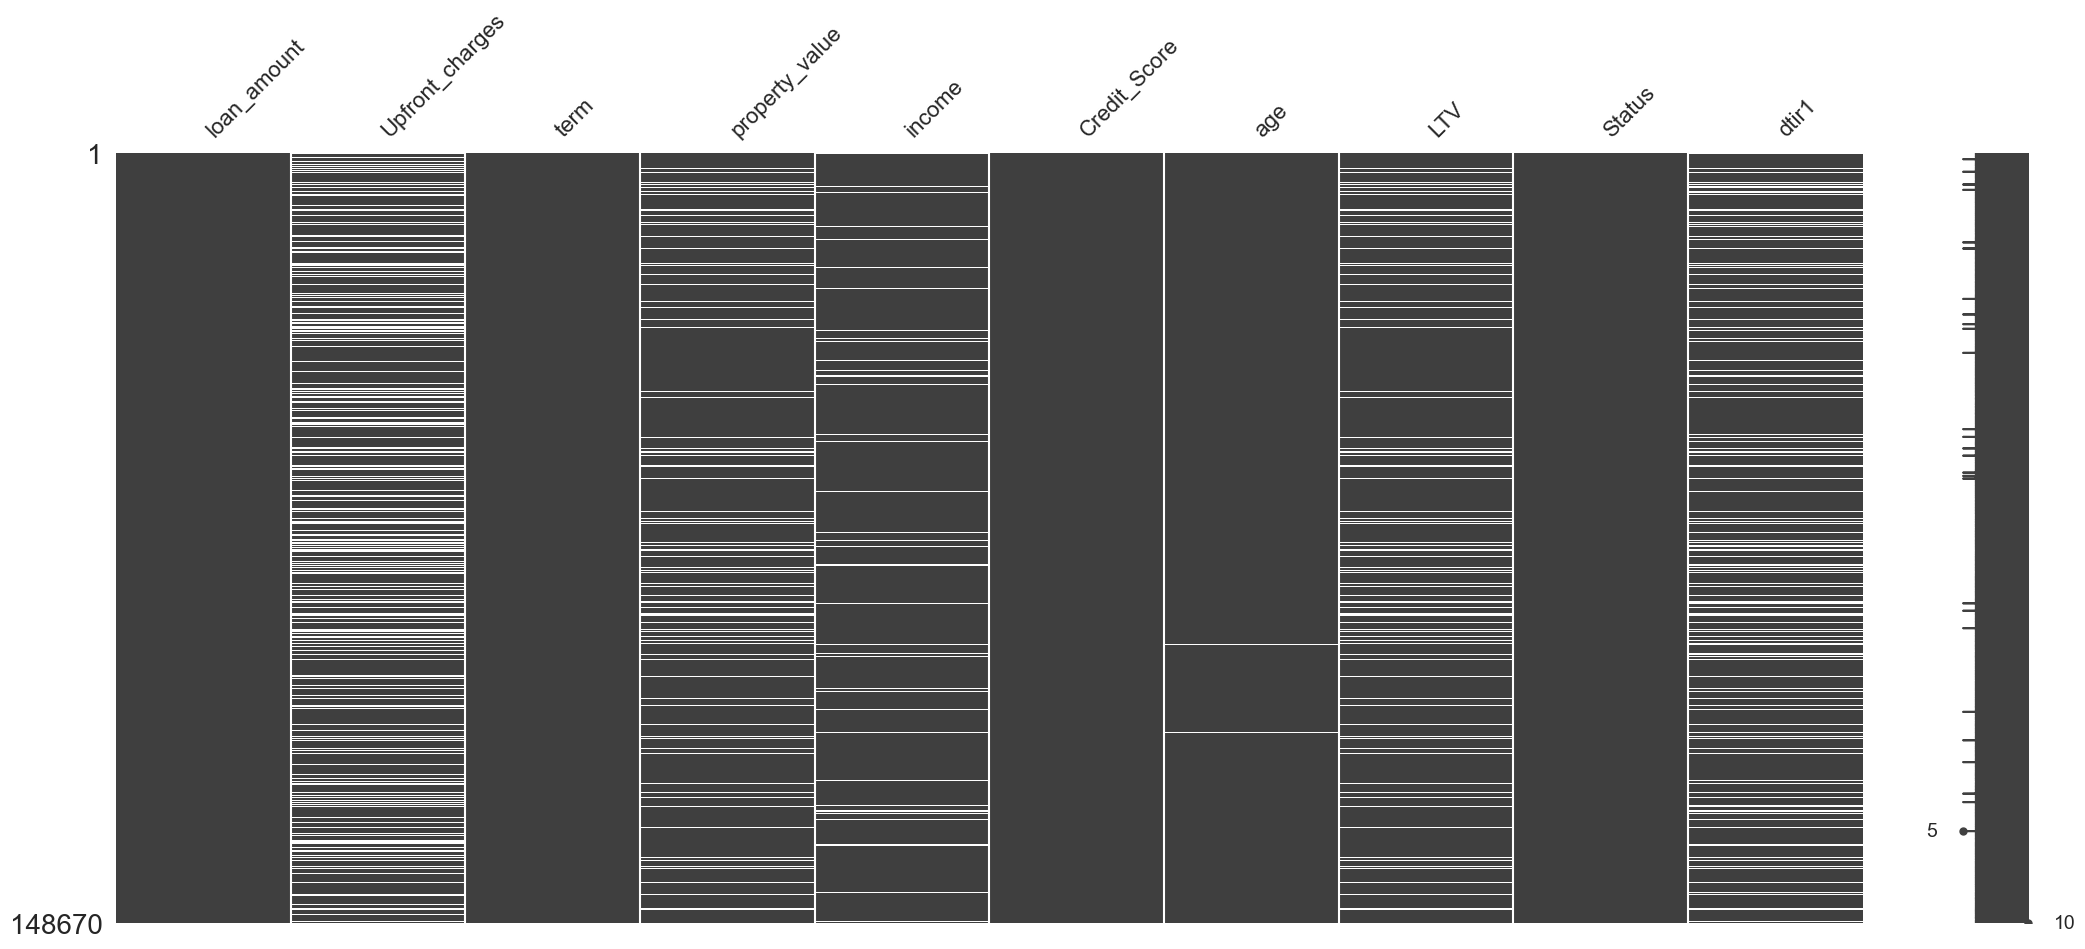

In [479]:
msno.matrix(df)

In [480]:
total = df.shape[0]
miss_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
miss_percent = {}
for col in miss_columns:
    null_count = df[col].isnull().sum()
    percent = (null_count/total) * 100
    miss_percent[col] = percent
    print("{} : {} ({}%)".format(col, null_count, round(percent, 3)))

Upfront_charges : 39642 (26.664%)
term : 41 (0.028%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


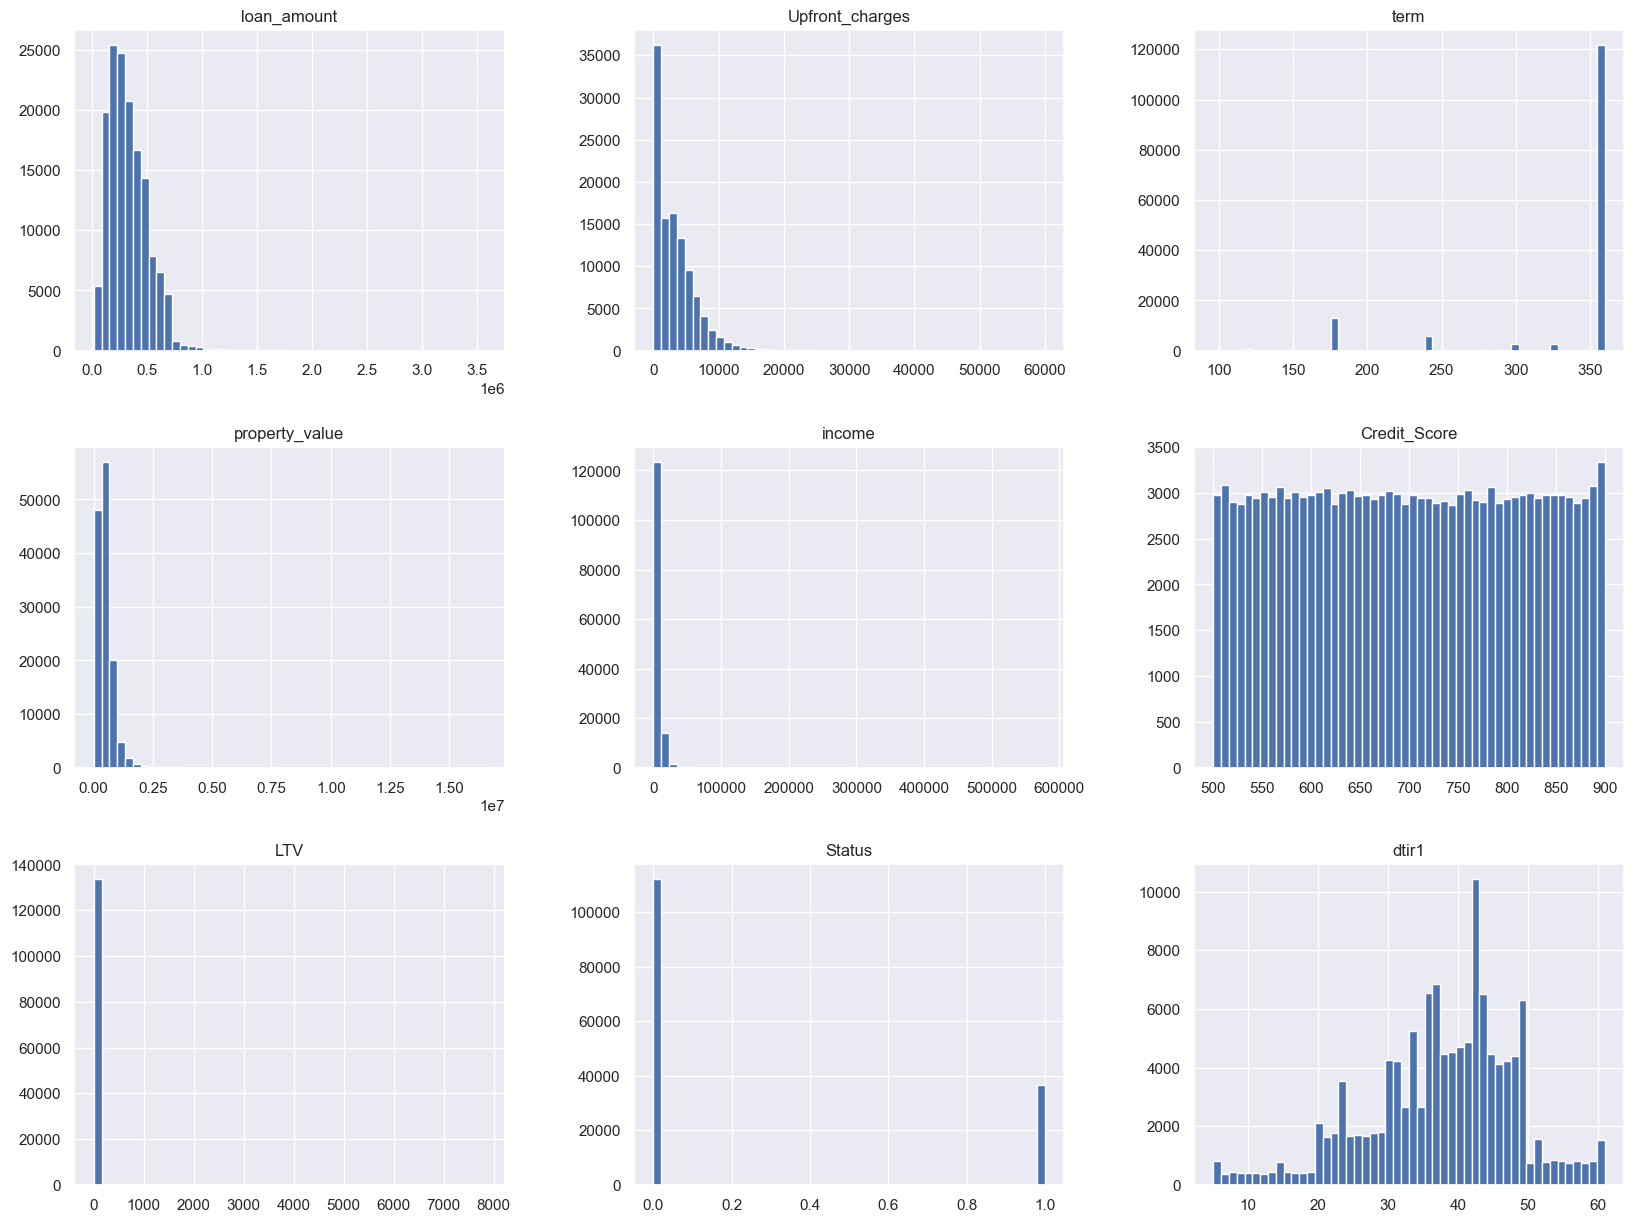

In [481]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

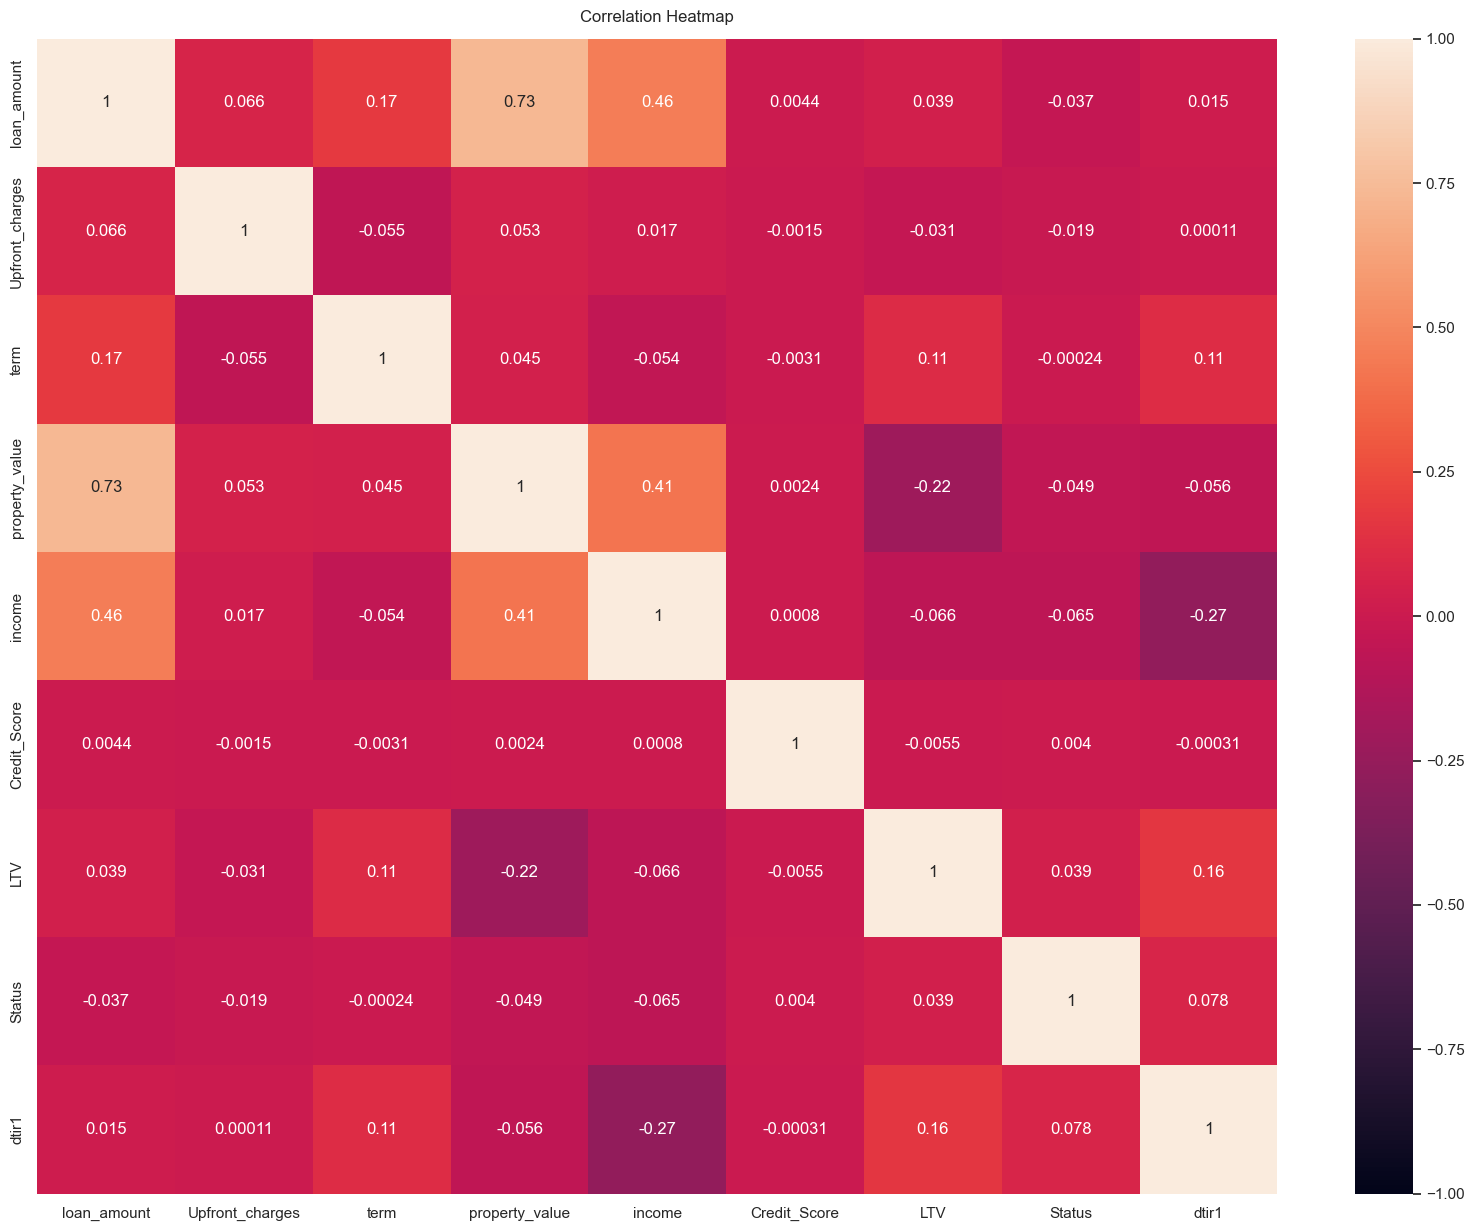

In [482]:
corr = df.drop(columns=["age"],axis=1).corr()
plt.figure(figsize=(20, 15))
heatmap = sb.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [483]:
df.isnull().sum()

loan_amount            0
Upfront_charges    39642
term                  41
property_value     15098
income              9150
Credit_Score           0
age                  200
LTV                15098
Status                 0
dtir1              24121
dtype: int64

In [484]:
df.dtypes

loan_amount          int64
Upfront_charges    float64
term               float64
property_value     float64
income             float64
Credit_Score         int64
age                 object
LTV                float64
Status               int64
dtir1              float64
dtype: object

In [485]:
uc_att_1 = df["Upfront_charges"].fillna(df.groupby('loan_amount')['Upfront_charges'].transform(lambda x: x.mean()))
uc_att_1.isnull().sum()

54

In [486]:
uc_att_2 = df["Upfront_charges"].fillna(df.groupby(['loan_amount','term'])['Upfront_charges'].transform(lambda x: x.mean()))
uc_att_2.isnull().sum()

261

In [487]:
np.max(uc_att_1 - uc_att_2), np.min(uc_att_1 - uc_att_2)

(7812.465, -19690.0)

In [488]:
df["Upfront_charges"] = uc_att_2

In [489]:
df["term"].fillna(df.groupby('loan_amount')['term'].transform(lambda x: x.mode()[0])).isnull().sum()

0

In [490]:
df["term"].fillna(df.groupby('loan_amount')['term'].transform(lambda x: x.mode()[0]),inplace=True)

C:\Users\hskay\AppData\Local\Temp\ipykernel_45828\3484462955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["term"].fillna(df.groupby('loan_amount')['term'].transform(lambda x: x.mode()[0]),inplace=True)


In [491]:
df["property_value"].fillna(df.groupby('loan_amount')['property_value'].transform(lambda x: x.mean())).isnull().sum()   

7

In [492]:
df["property_value"].fillna(df.groupby('loan_amount')['property_value'].transform(lambda x: x.mean()),inplace=True)   

C:\Users\hskay\AppData\Local\Temp\ipykernel_45828\464885817.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["property_value"].fillna(df.groupby('loan_amount')['property_value'].transform(lambda x: x.mean()),inplace=True)


In [493]:
df["income"].fillna(df.groupby('property_value')['income'].transform(lambda x: x.mean())).isnull().sum()

6

In [494]:
df["income"].fillna(df.groupby('property_value')['income'].transform(lambda x: x.mean()),inplace=True)

C:\Users\hskay\AppData\Local\Temp\ipykernel_45828\3743406681.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["income"].fillna(df.groupby('property_value')['income'].transform(lambda x: x.mean()),inplace=True)


In [495]:
df["age"].fillna(df.groupby('property_value')['age'].transform(lambda x: x.mode()[0])).isnull().sum()

0

In [496]:
df["age"].fillna(df.groupby('property_value')['age'].transform(lambda x: x.mode()[0]),inplace=True)

C:\Users\hskay\AppData\Local\Temp\ipykernel_45828\3001916602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df.groupby('property_value')['age'].transform(lambda x: x.mode()[0]),inplace=True)


In [497]:
df["LTV"].fillna(df.groupby('term')['LTV'].transform(lambda x: x.mean())).isnull().sum()

1

In [498]:
df["LTV"].fillna(df.groupby('term')['LTV'].transform(lambda x: x.mean()),inplace=True)

C:\Users\hskay\AppData\Local\Temp\ipykernel_45828\841890541.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LTV"].fillna(df.groupby('term')['LTV'].transform(lambda x: x.mean()),inplace=True)


In [499]:
df["dtir1"].fillna(df.groupby('loan_amount')['dtir1'].transform(lambda x: x.mean())).isnull().sum()

7

In [500]:
df["dtir1"].fillna(df.groupby('loan_amount')['dtir1'].transform(lambda x: x.mean()),inplace=True)

C:\Users\hskay\AppData\Local\Temp\ipykernel_45828\2025548805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["dtir1"].fillna(df.groupby('loan_amount')['dtir1'].transform(lambda x: x.mean()),inplace=True)


In [501]:
df.isnull().sum()

loan_amount          0
Upfront_charges    261
term                 0
property_value       7
income               6
Credit_Score         0
age                  0
LTV                  1
Status               0
dtir1                7
dtype: int64

In [502]:
df["Upfront_charges"]=df["Upfront_charges"].fillna(df["Upfront_charges"].mean())
df["property_value"]=df["property_value"].fillna(df["property_value"].mean())
df["income"]=df["income"].fillna(df["income"].mean())
df["LTV"]=df["LTV"].fillna(df["LTV"].mean())
df["dtir1"]=df["dtir1"].fillna(df["dtir1"].mean())

In [503]:
df.isnull().sum().sum()

0

In [504]:
del df_old
del df_main

cols = list(df.columns[:-2])
cols.extend([df.columns[-1],df.columns[-2]])

df = df[cols]
df.columns = df.columns.str.lower()
df_main = df.copy()

## 2.3 Outlier Analysis
Identify and handle outliers in the data.Plot features using boxplots to visualize outliers.

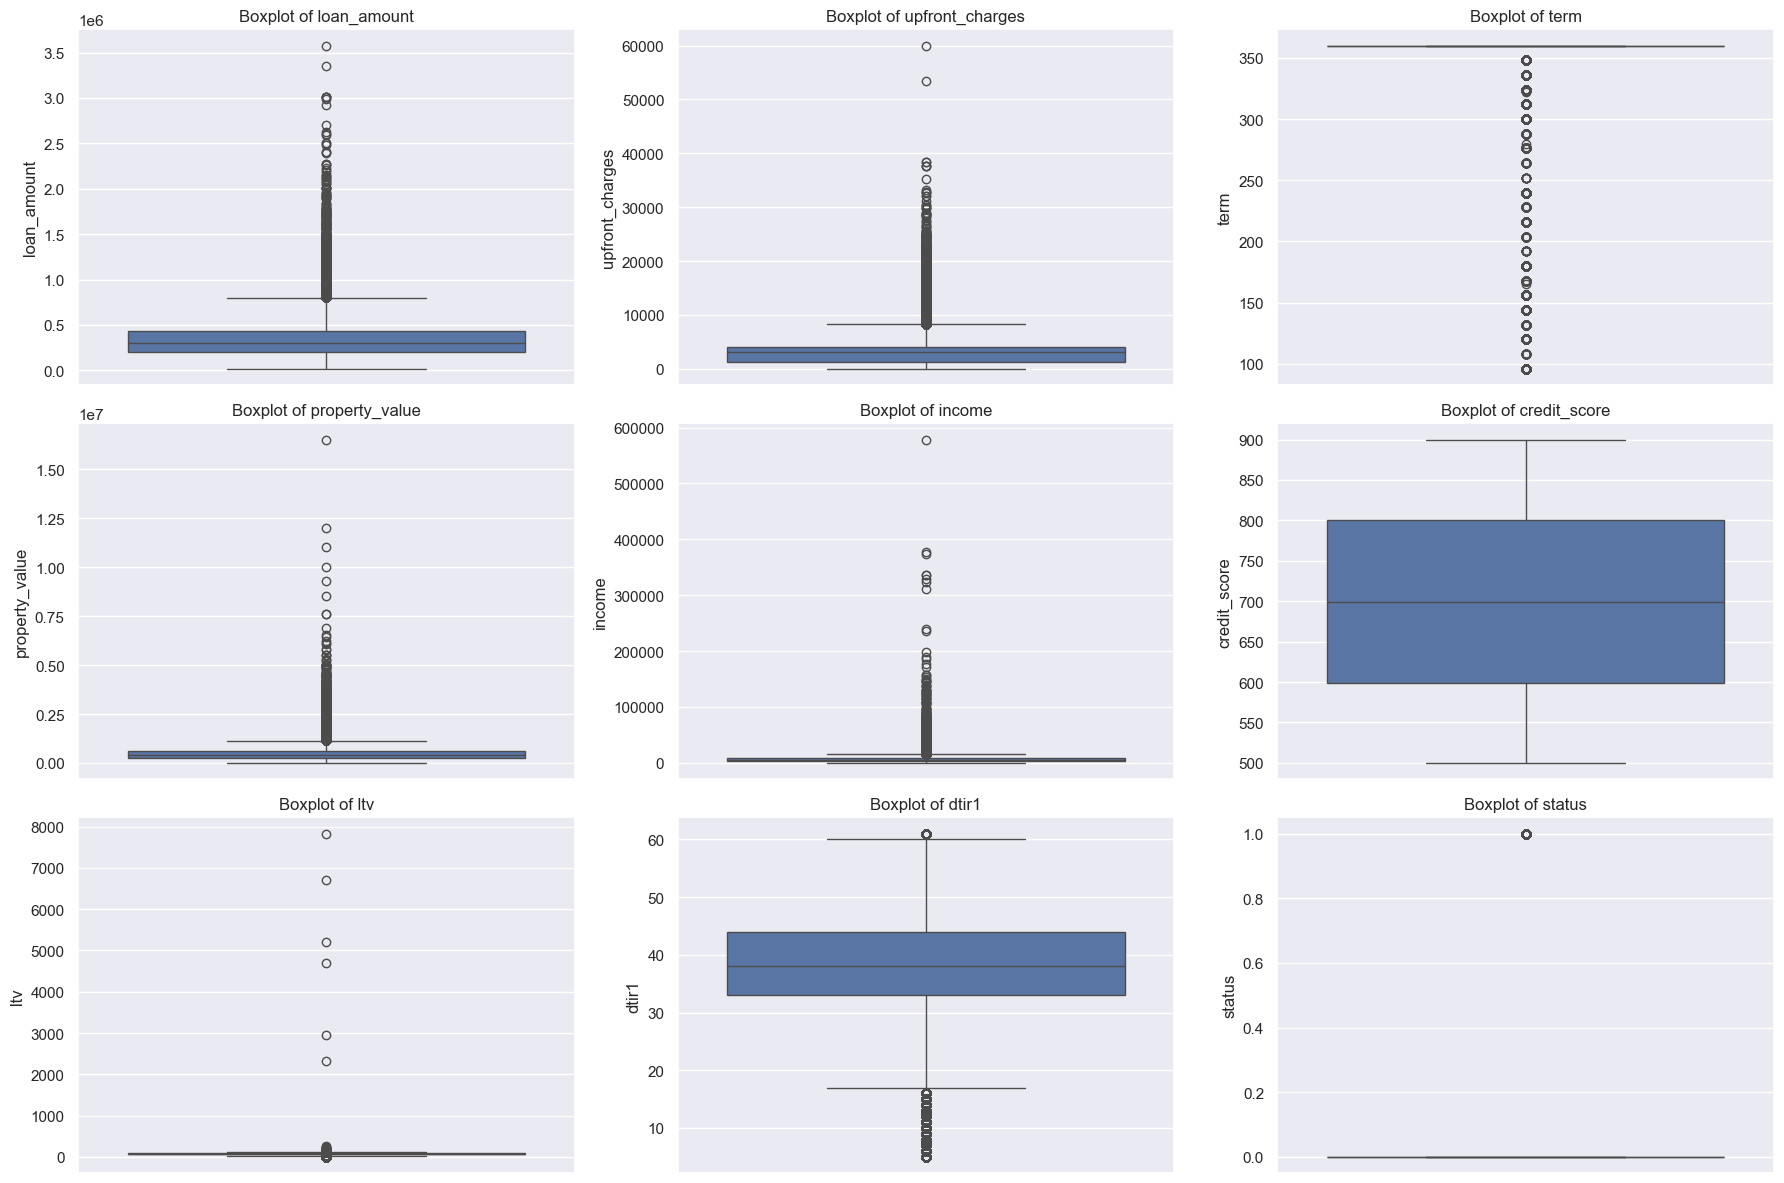

In [505]:
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(y=col, data=df)
    plt.title(f'Boxplot of {col}')  

plt.tight_layout()  
plt.show()

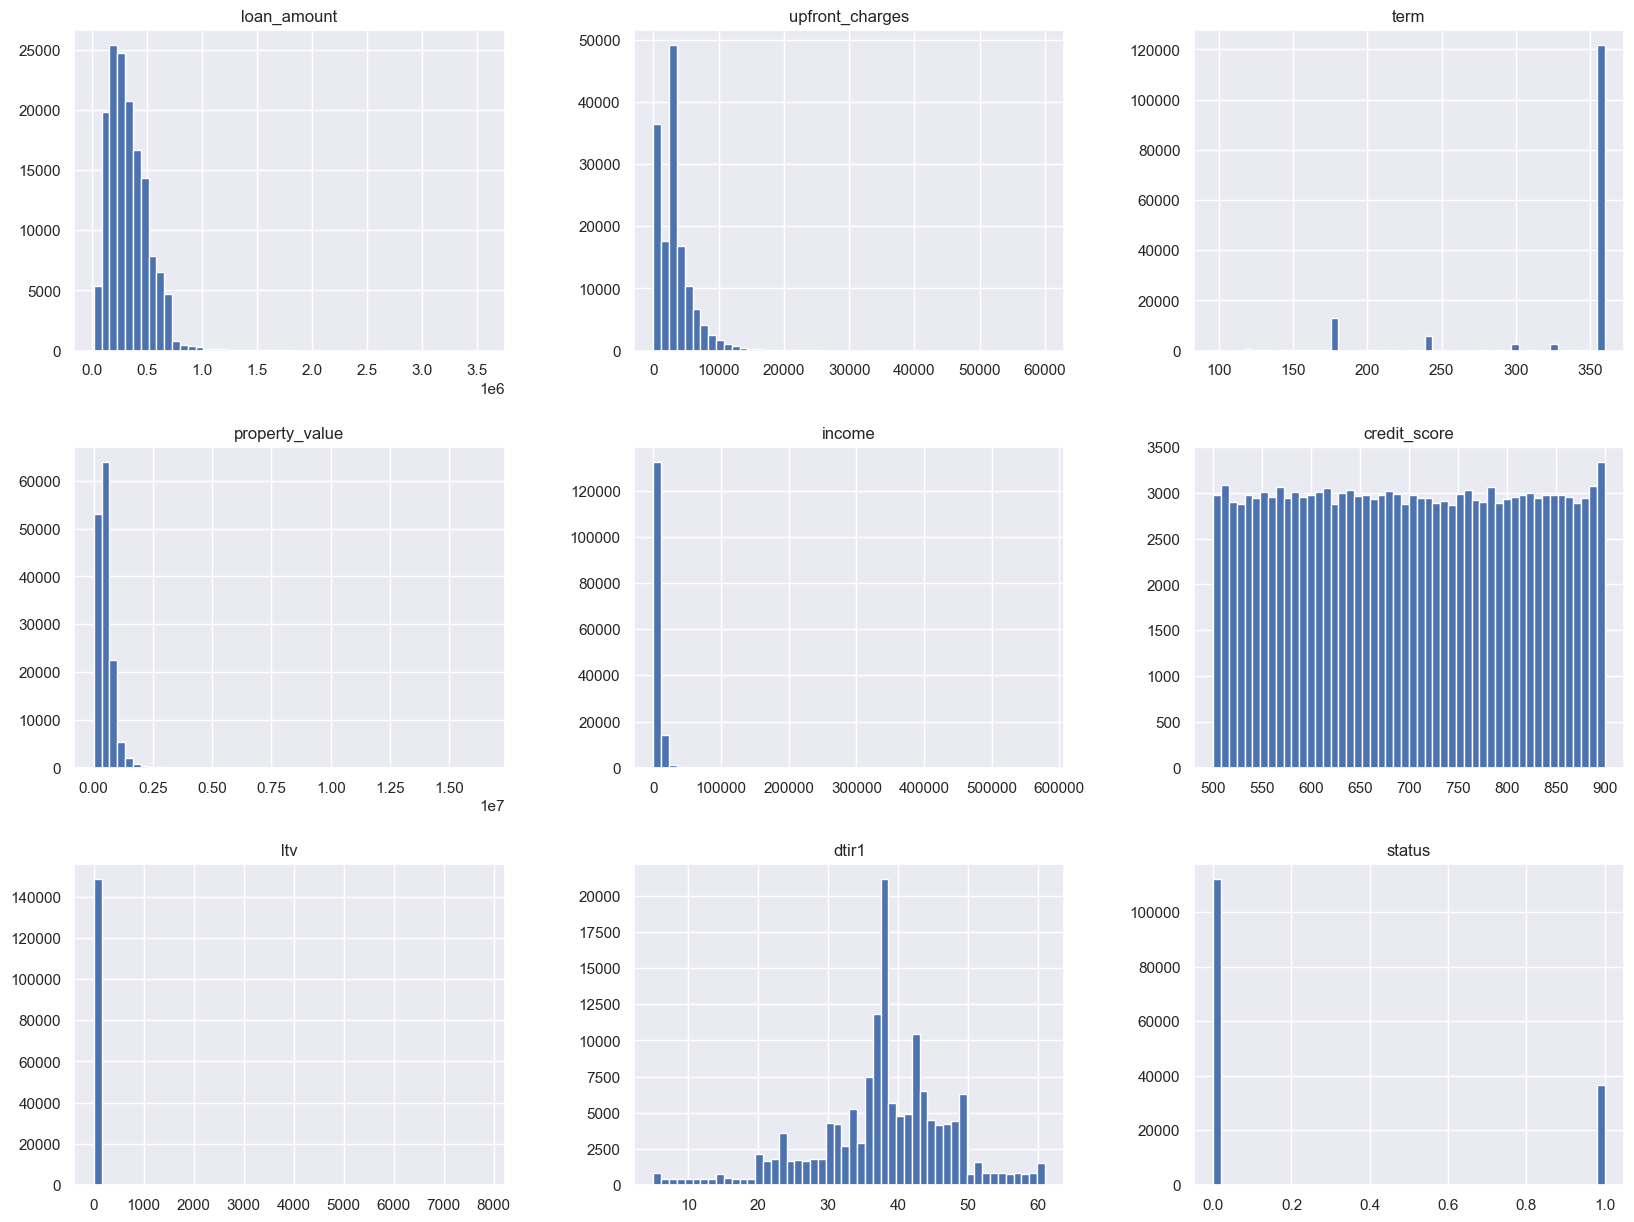

In [506]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

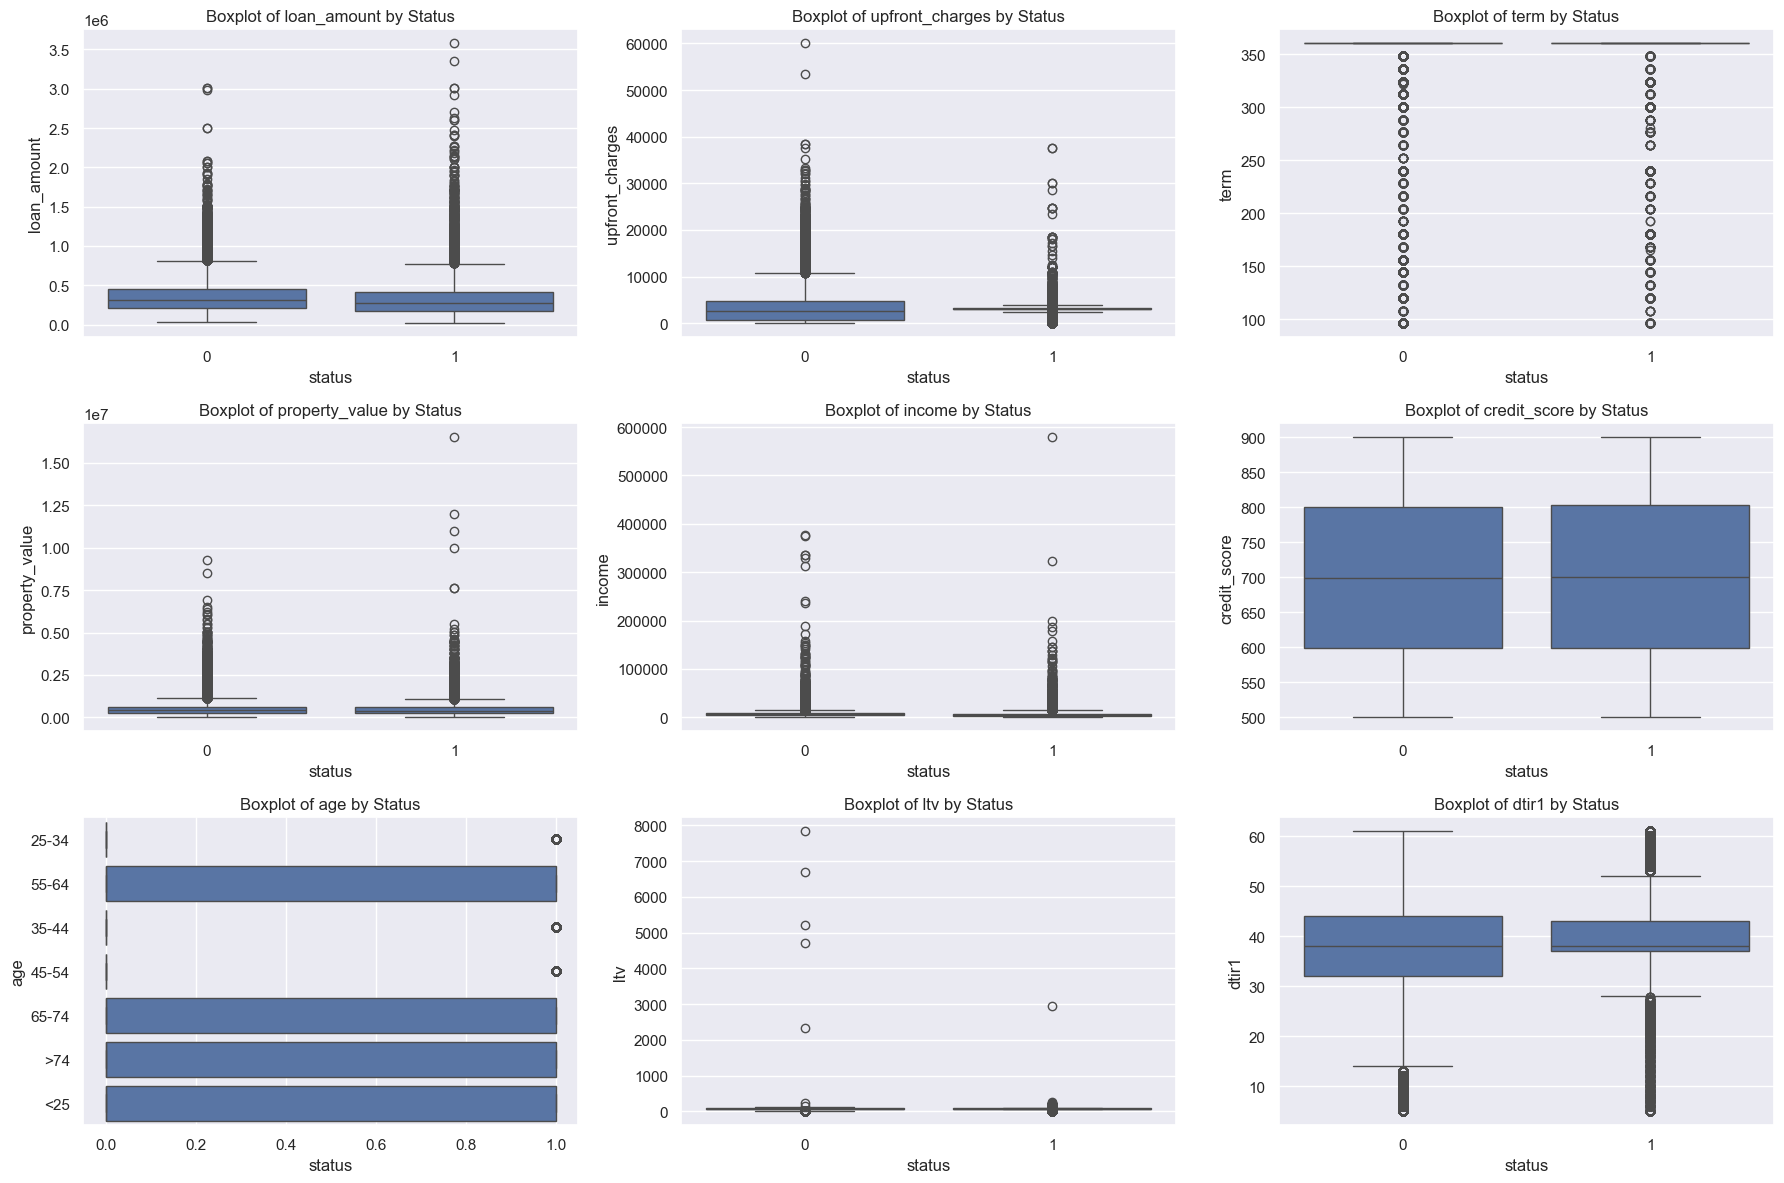

In [507]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(x='status', y=col, data=df)
    plt.title(f'Boxplot of {col} by Status')  

plt.tight_layout()  
plt.show()

## 2.4 Feature Engineering (if needed)
Transform or create new features to improve model performance

In [508]:
df_2 = df.copy()
category_list = df["age"].astype('category').cat.categories.to_list()
df_2["age"] = df["age"].astype('category').cat.codes

In [509]:
category_list

['25-34', '35-44', '45-54', '55-64', '65-74', '<25', '>74']

In [510]:
y = df_2["status"].copy()
X = df_2.drop("status", axis=1).copy()
del df_2

In [511]:
smote = SMOTE(random_state=1)
X_smote, y_smote = smote.fit_resample(X, y)
df_smote = pd.concat([X_smote, y_smote], axis=1)
np.bincount(y_smote)

array([112031, 112031], dtype=int64)

In [512]:
df_smote.head()

loan_amount  upfront_charges   term  property_value   income  credit_score  \
0       116500      2570.136346  360.0   118000.000000   1740.0           758   
1       206500      3002.893204  360.0   350858.517806   4980.0           552   
2       406500       595.000000  360.0   508000.000000   9480.0           834   
3       456500      2977.392940  360.0   658000.000000  11880.0           587   
4       696500         0.000000  360.0   758000.000000  10440.0           602   

   age        ltv      dtir1  status  
0    0  98.728814  45.000000       1  
1    3  74.471918  37.438237       1  
2    1  80.019685  46.000000       0  
3    2  69.376900  42.000000       0  
4    0  91.886544  39.000000       0

In [513]:
X_smote["age"].value_counts()

age
2    56244
1    52695
3    49045
0    28458
4    26086
6     7580
5     3954
Name: count, dtype: int64

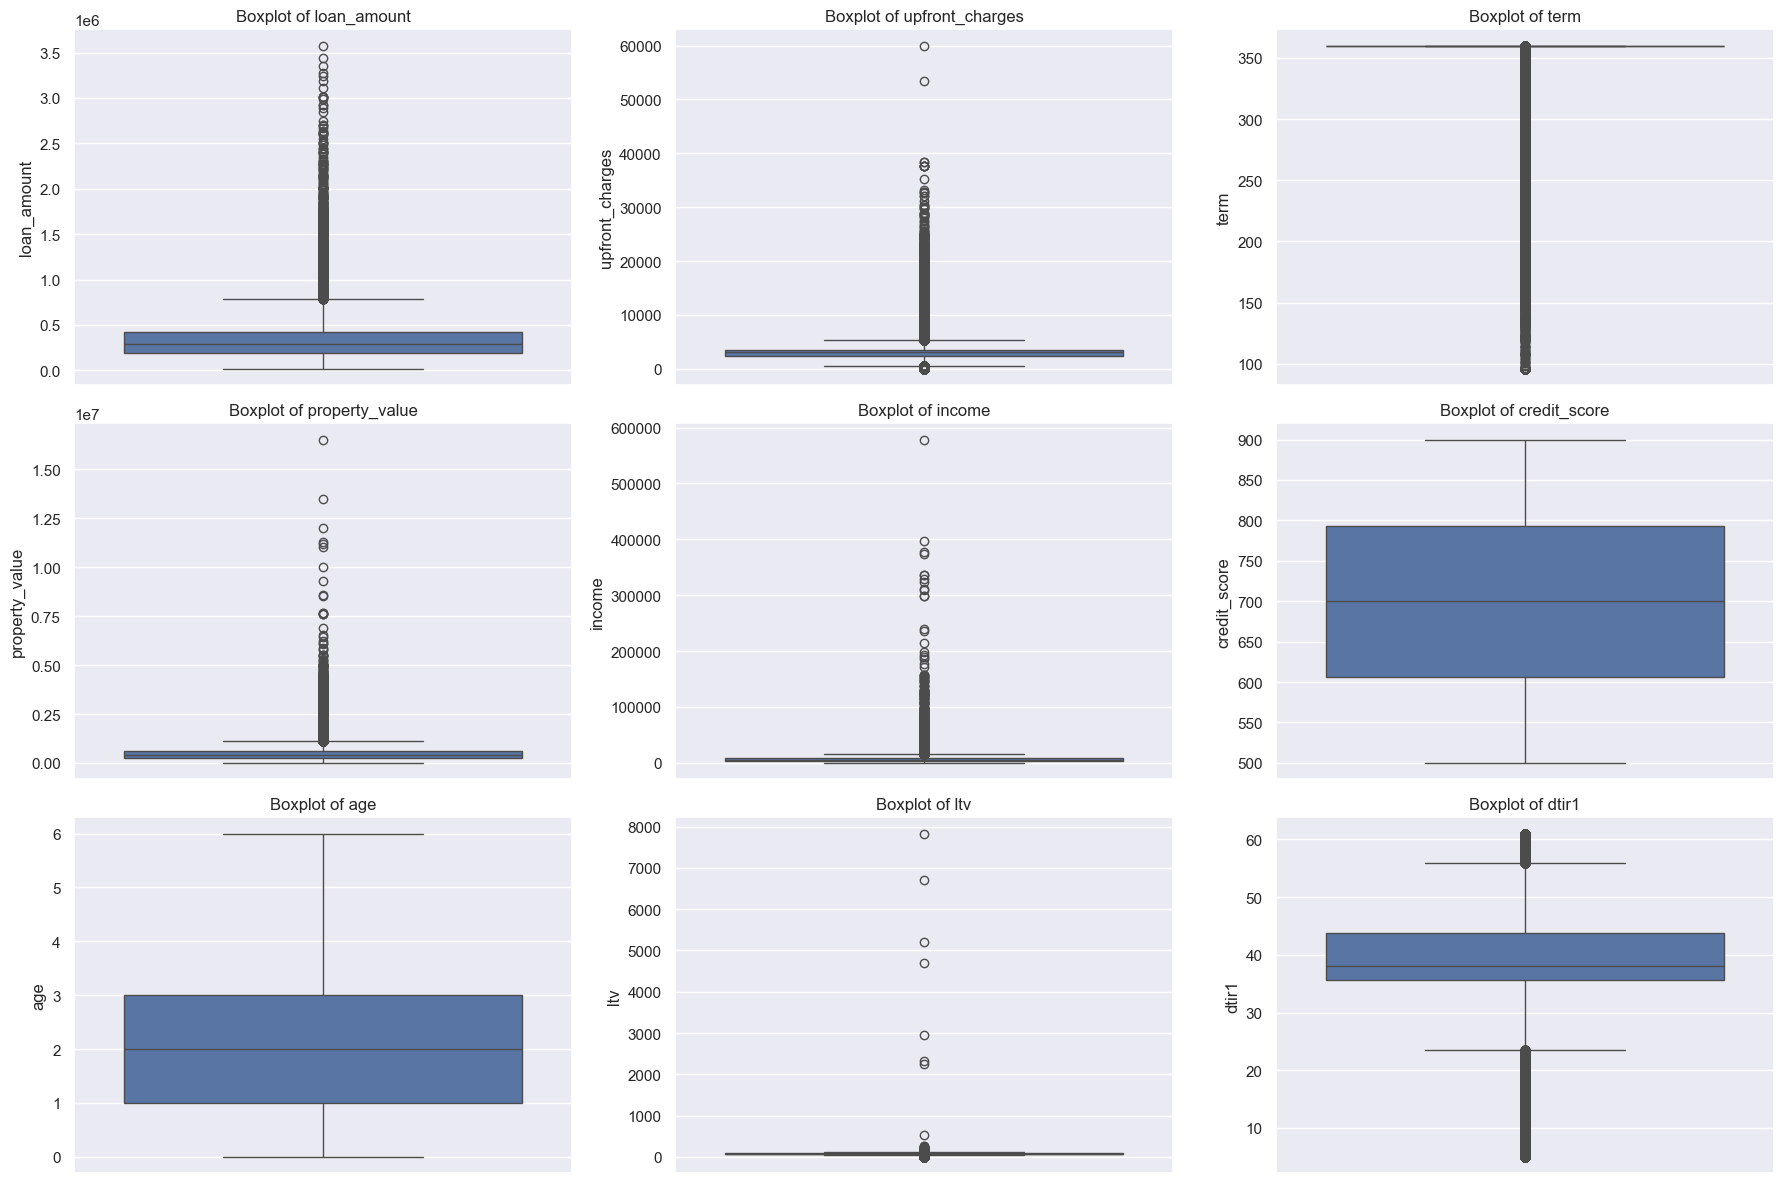

In [514]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_smote.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(y=col, data=df_smote)
    plt.title(f'Boxplot of {col}')  

plt.tight_layout()  
plt.show()

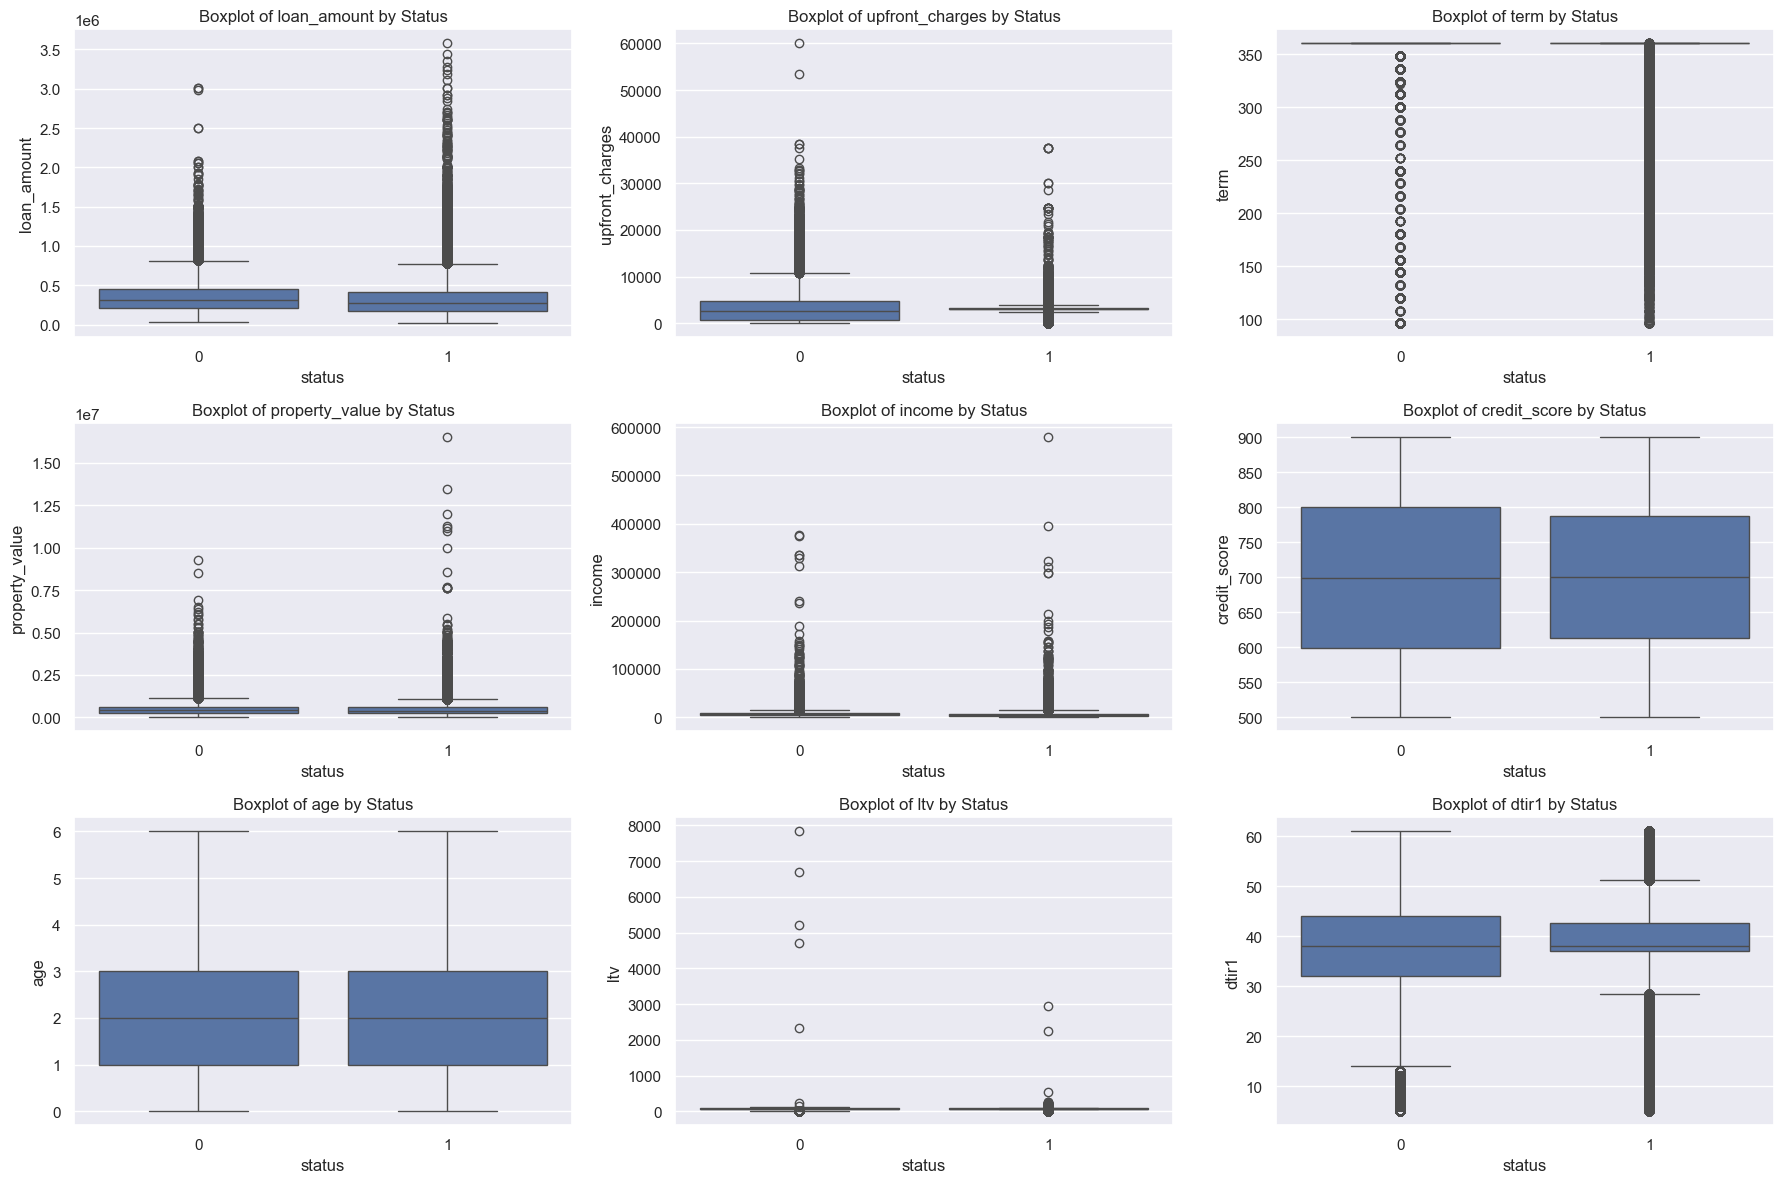

In [515]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_smote.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(x='status', y=col, data=df_smote)
    plt.title(f'Boxplot of {col} by Status')  

plt.tight_layout()  
plt.show()

In [516]:
adasyn = ADASYN(random_state=1)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
df_adasyn = pd.concat([X_adasyn, y_adasyn], axis=1)
np.bincount(y_adasyn)

array([112031, 110745], dtype=int64)

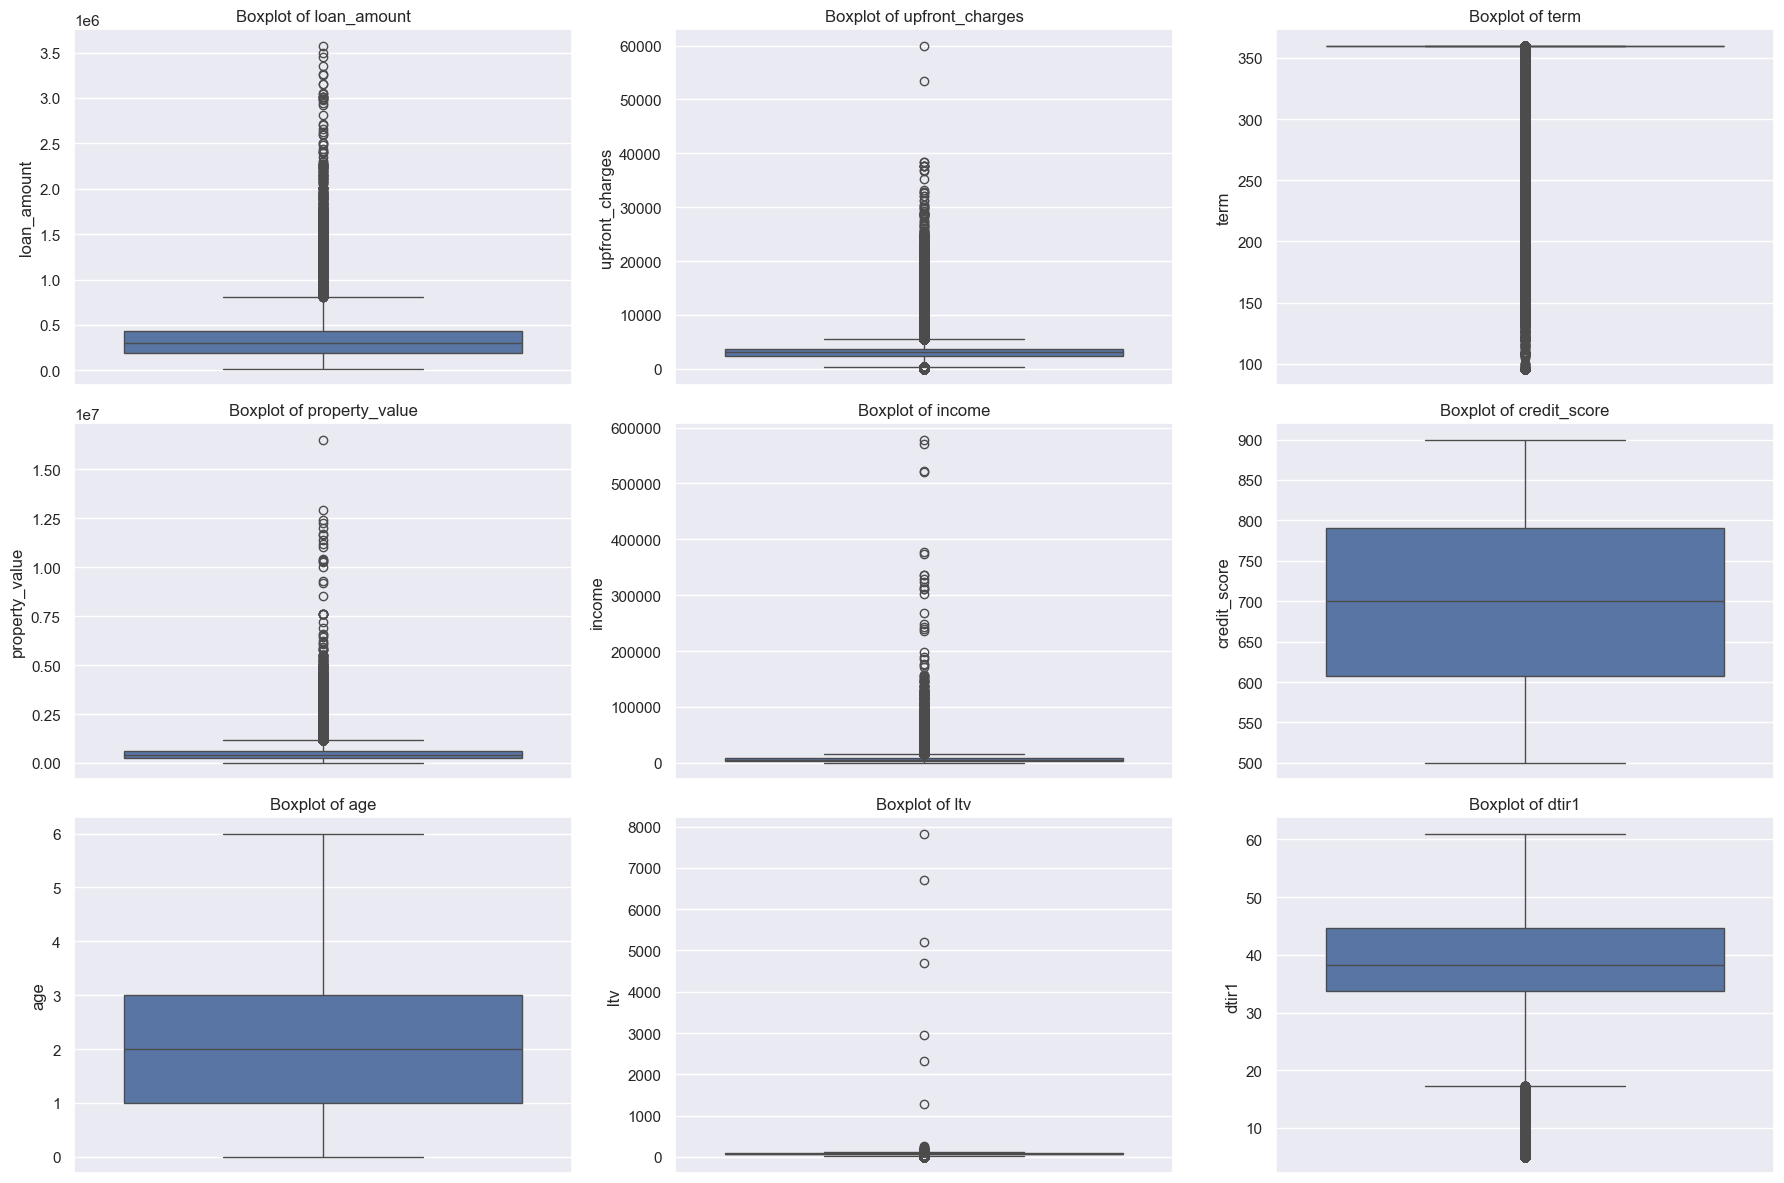

In [517]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_adasyn.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(y=col, data=df_adasyn)
    plt.title(f'Boxplot of {col}')  

plt.tight_layout()  
plt.show()

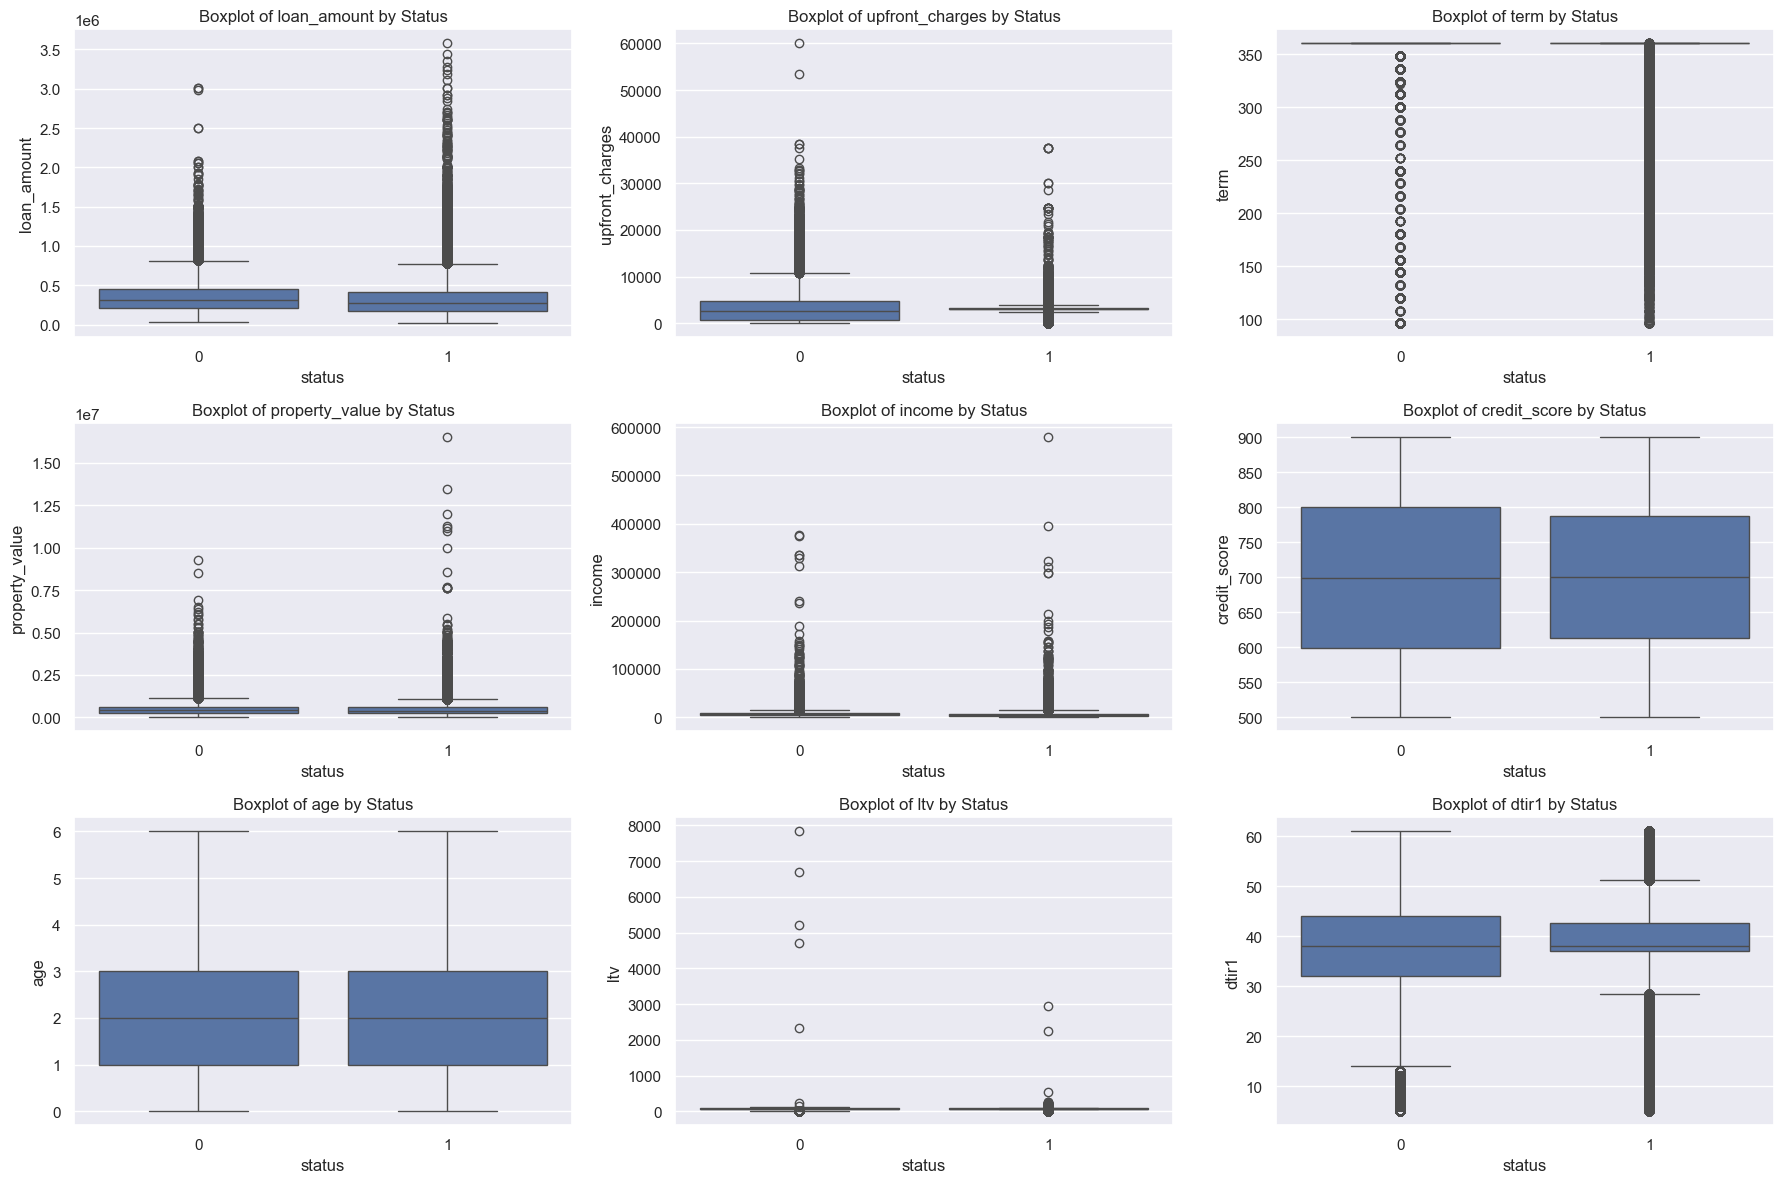

In [518]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_smote.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(x='status', y=col, data=df_smote)
    plt.title(f'Boxplot of {col} by Status')  

plt.tight_layout()  
plt.show()

In [519]:
X_adasyn["age"].value_counts()

age
2    57887
1    51163
3    49997
0    26744
4    25643
6     7555
5     3787
Name: count, dtype: int64

In [520]:
under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X, y)
df_under = pd.concat([X_under, y_under], axis=1)
np.bincount(y_under)

array([36639, 36639], dtype=int64)

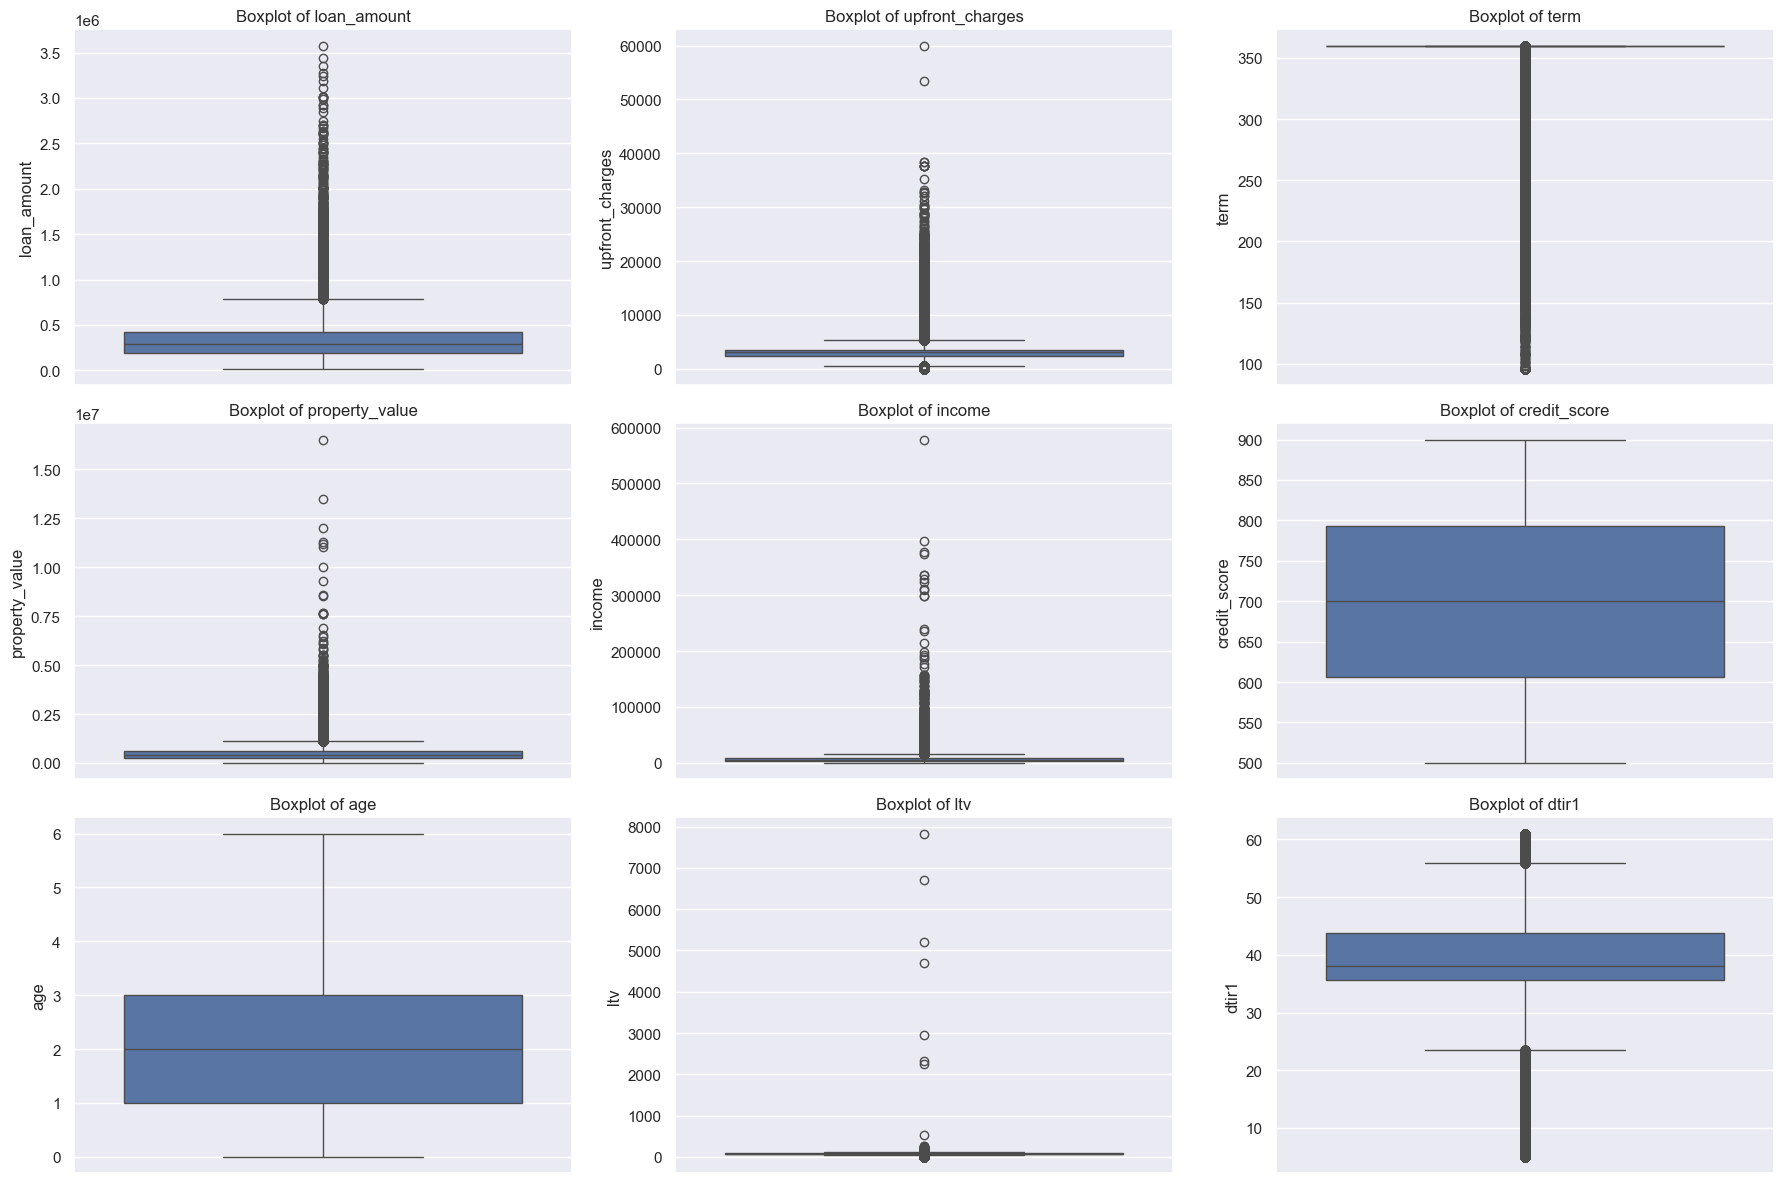

In [521]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_smote.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(y=col, data=df_smote)
    plt.title(f'Boxplot of {col}')  

plt.tight_layout()  
plt.show()

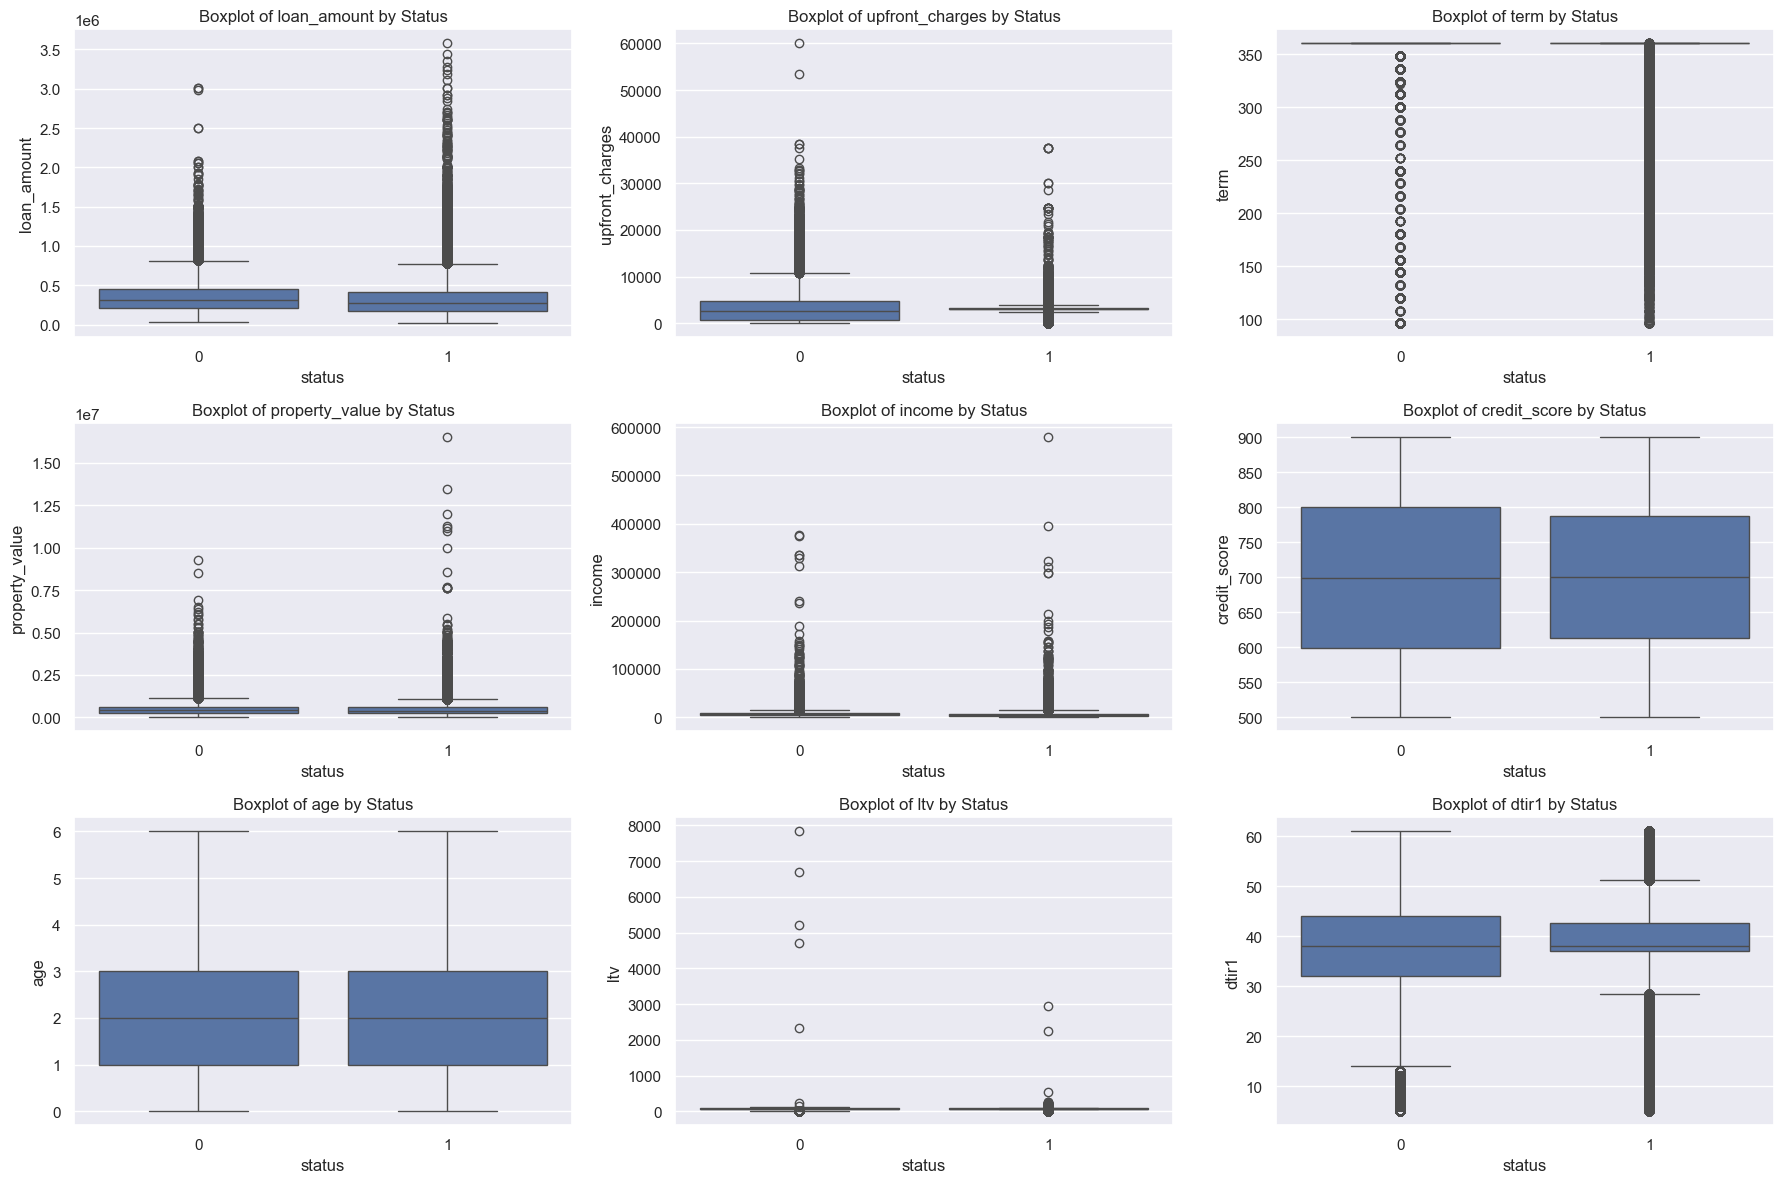

In [522]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_smote.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(x='status', y=col, data=df_smote)
    plt.title(f'Boxplot of {col} by Status')  

plt.tight_layout()  
plt.show()

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Exploratory Data Analysis (EDA)</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## 3.1 Data Visualization
Visualize the data to identify trends, patterns, or anomalies. Suggested visualizations:

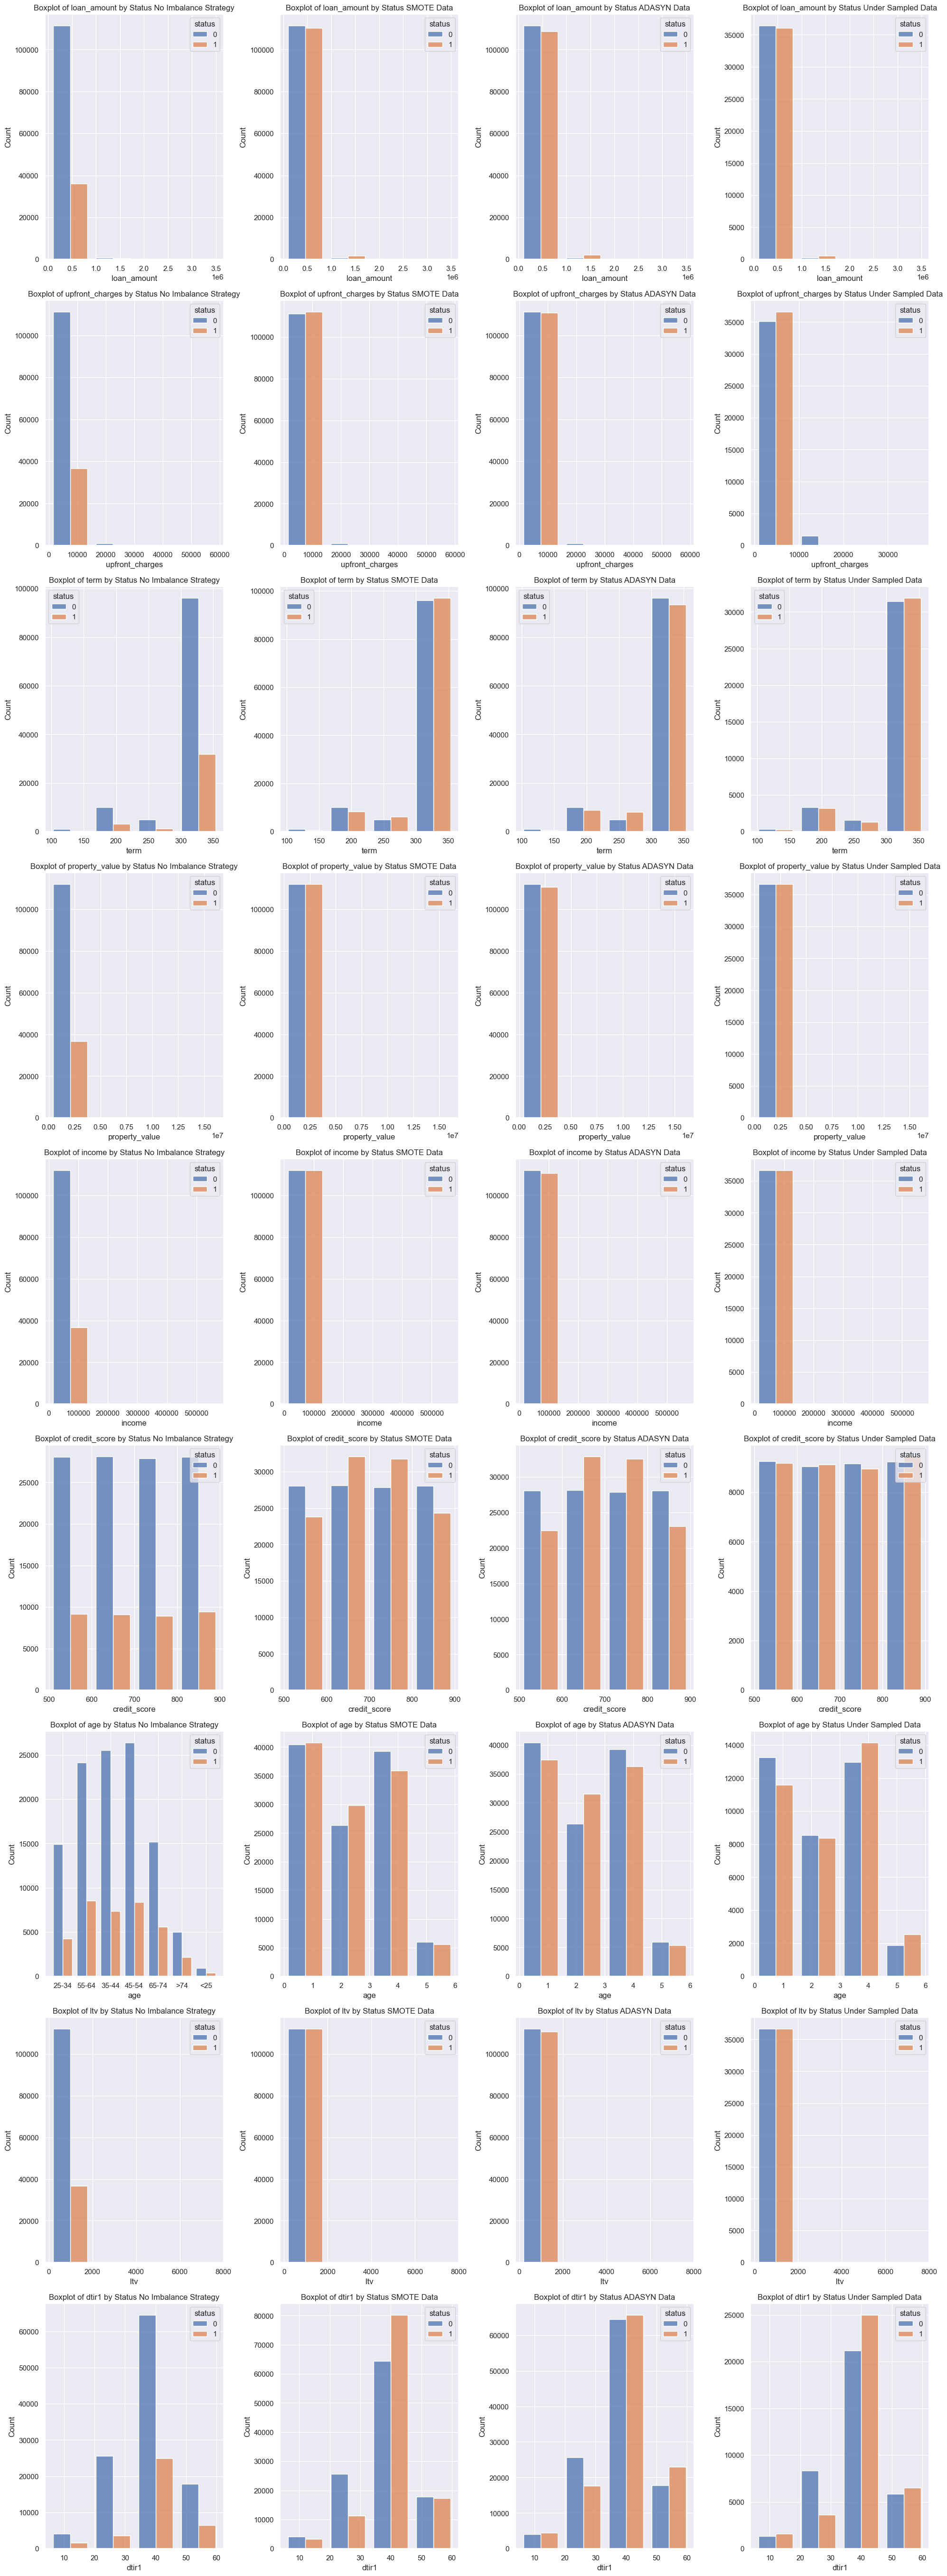

In [523]:
plt.figure(figsize=(20, 60))  
sb.set_theme(style='darkgrid')

df_sets = [df, df_smote, df_adasyn, df_under]
methods_for_imbalanced_data = ['No Imbalance Strategy', 'SMOTE Data', 'ADASYN Data', 'Under Sampled Data']

for i,col in enumerate(df.columns[:-1]):
    for j,title in enumerate(methods_for_imbalanced_data):
        plt.subplot(10, 4, i*4 + j+1)  
        sb.histplot(data=df_sets[j], x=col, hue="status", multiple="dodge", shrink=.8, bins=4)
        plt.title('Boxplot of {} by Status {}'.format(col,title))  
        

plt.tight_layout()  
plt.show()

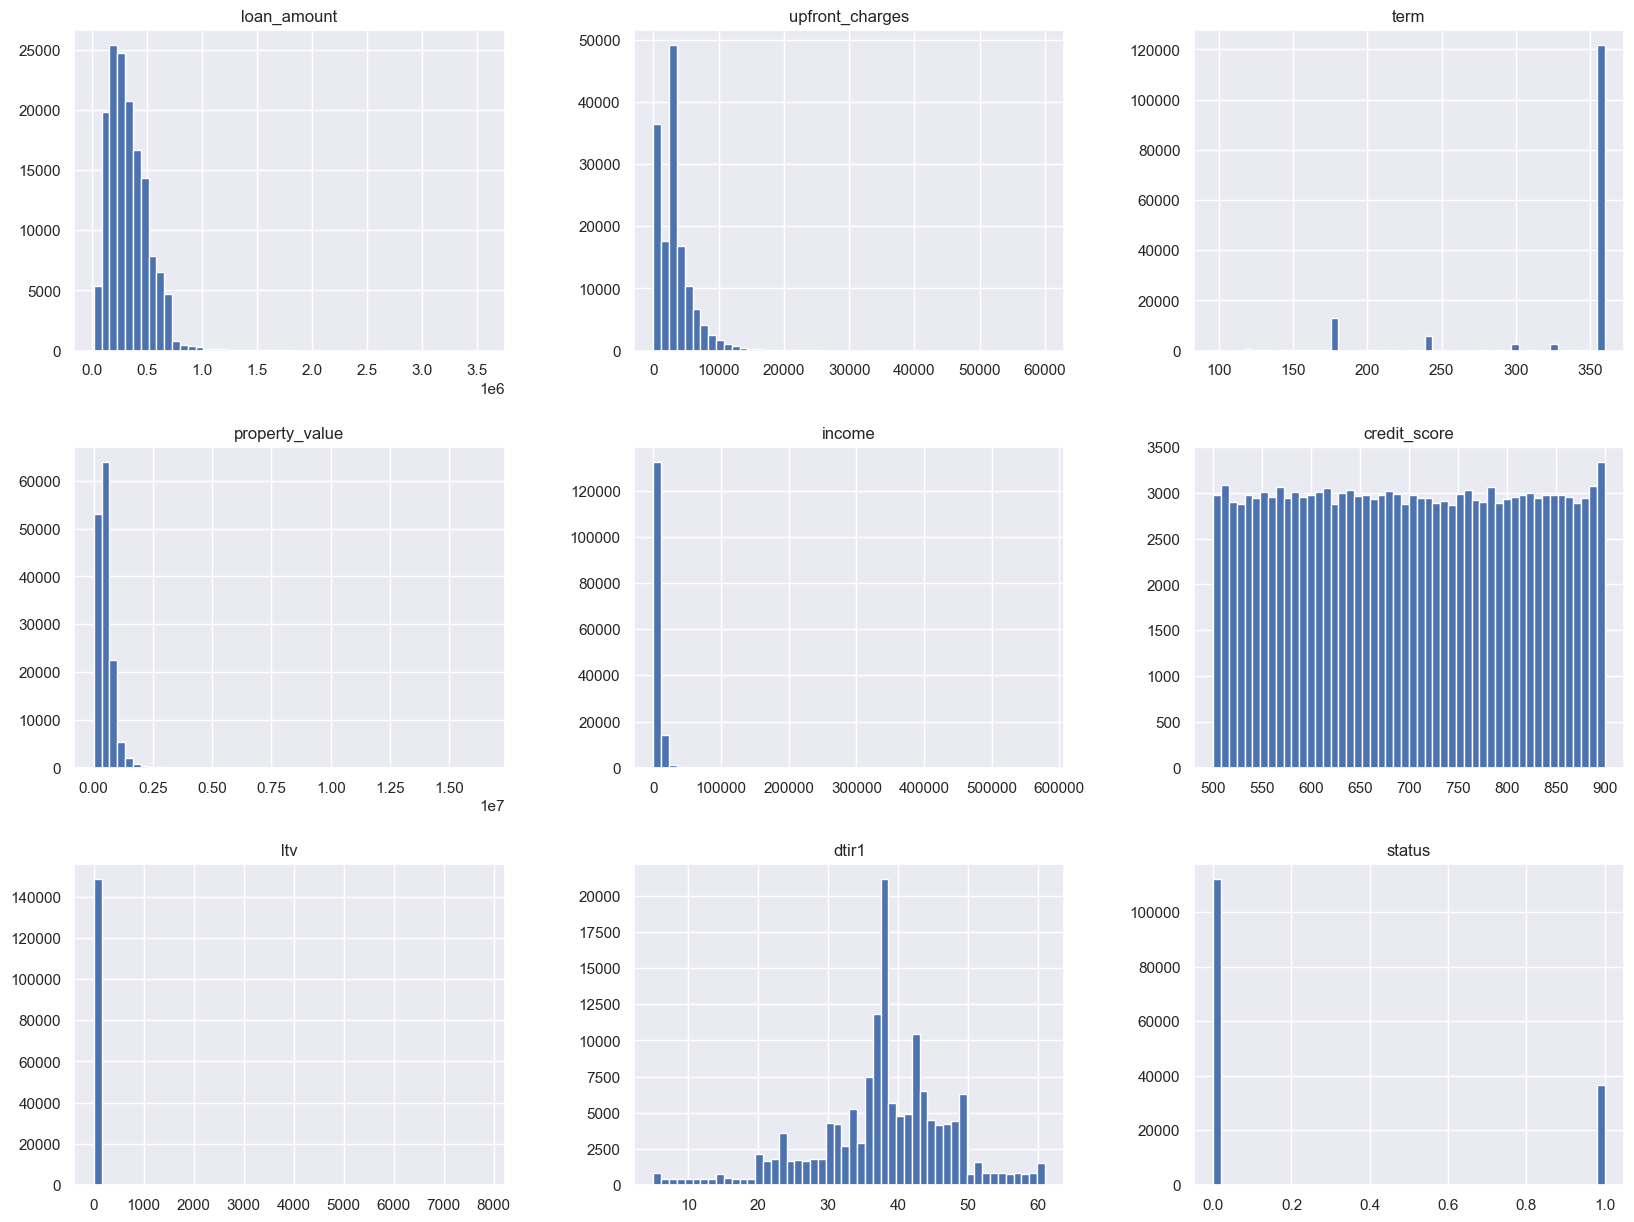

In [524]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

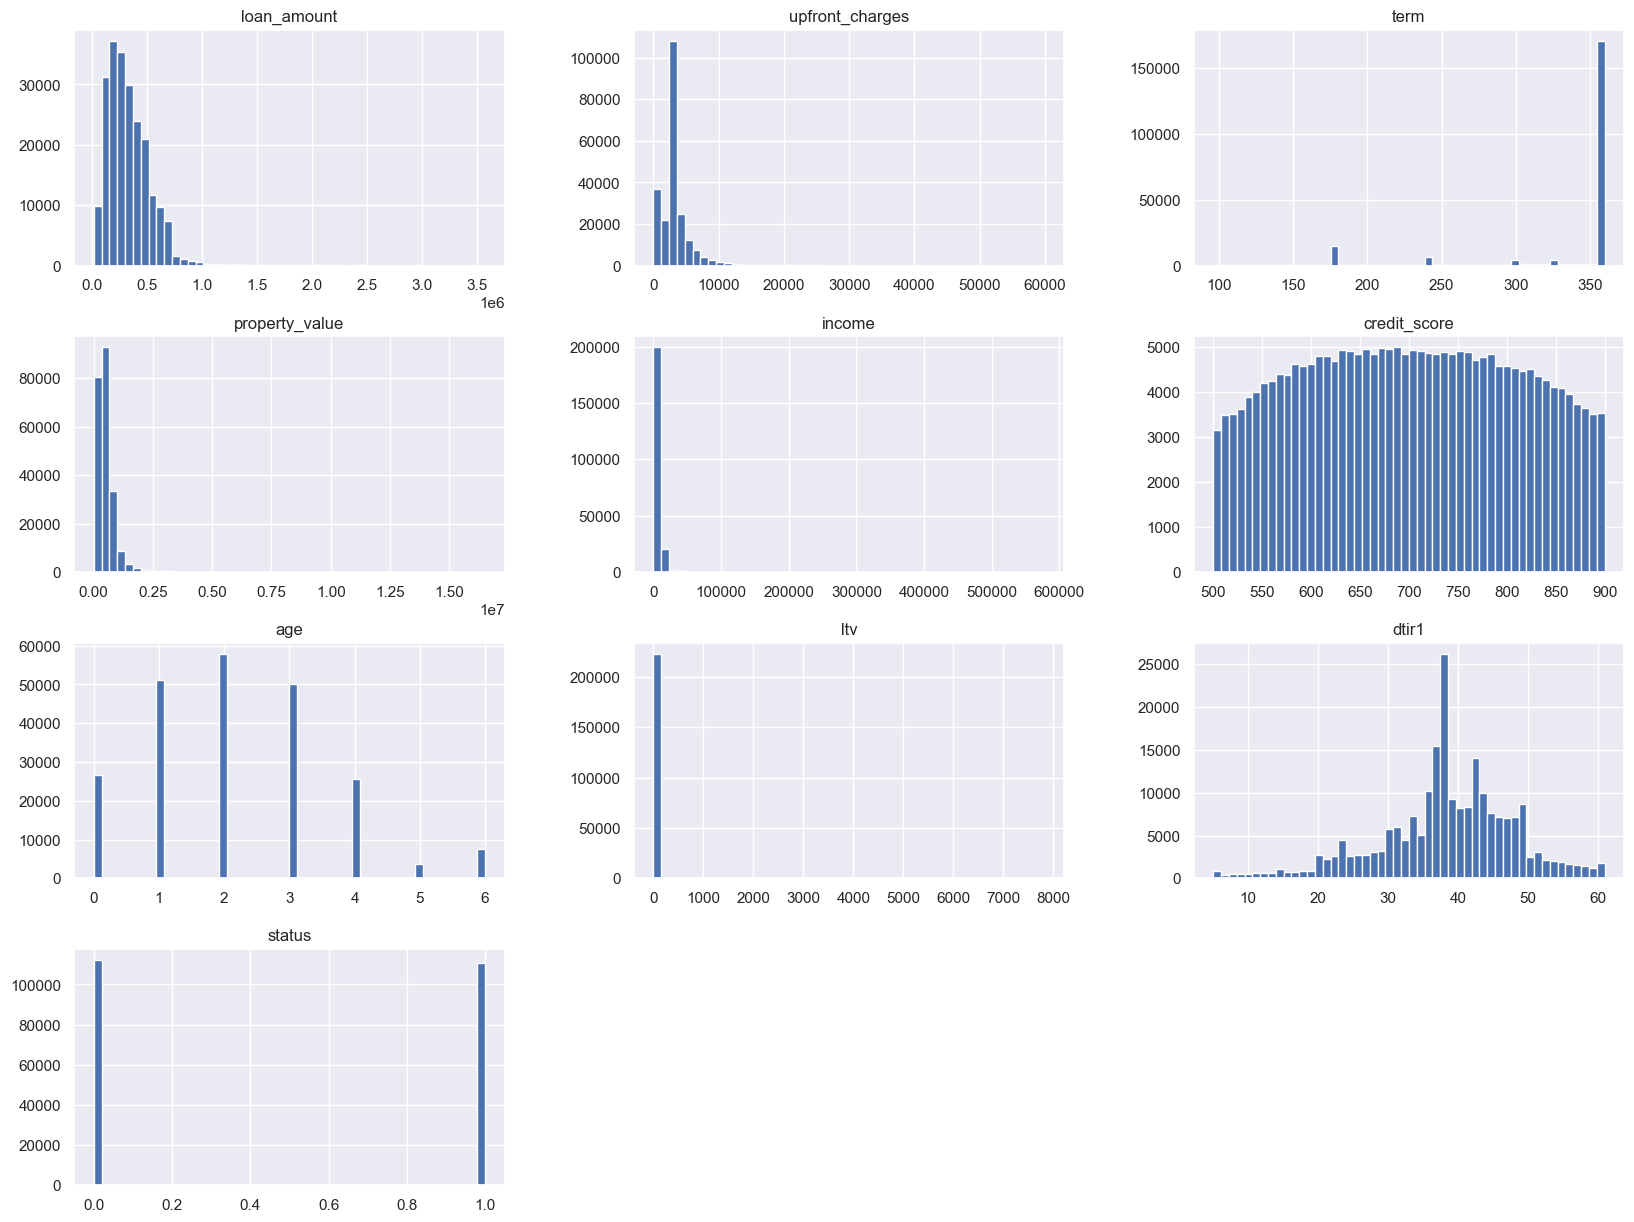

In [525]:
df_adasyn.hist(bins = 50, figsize = (20, 15))
plt.show()

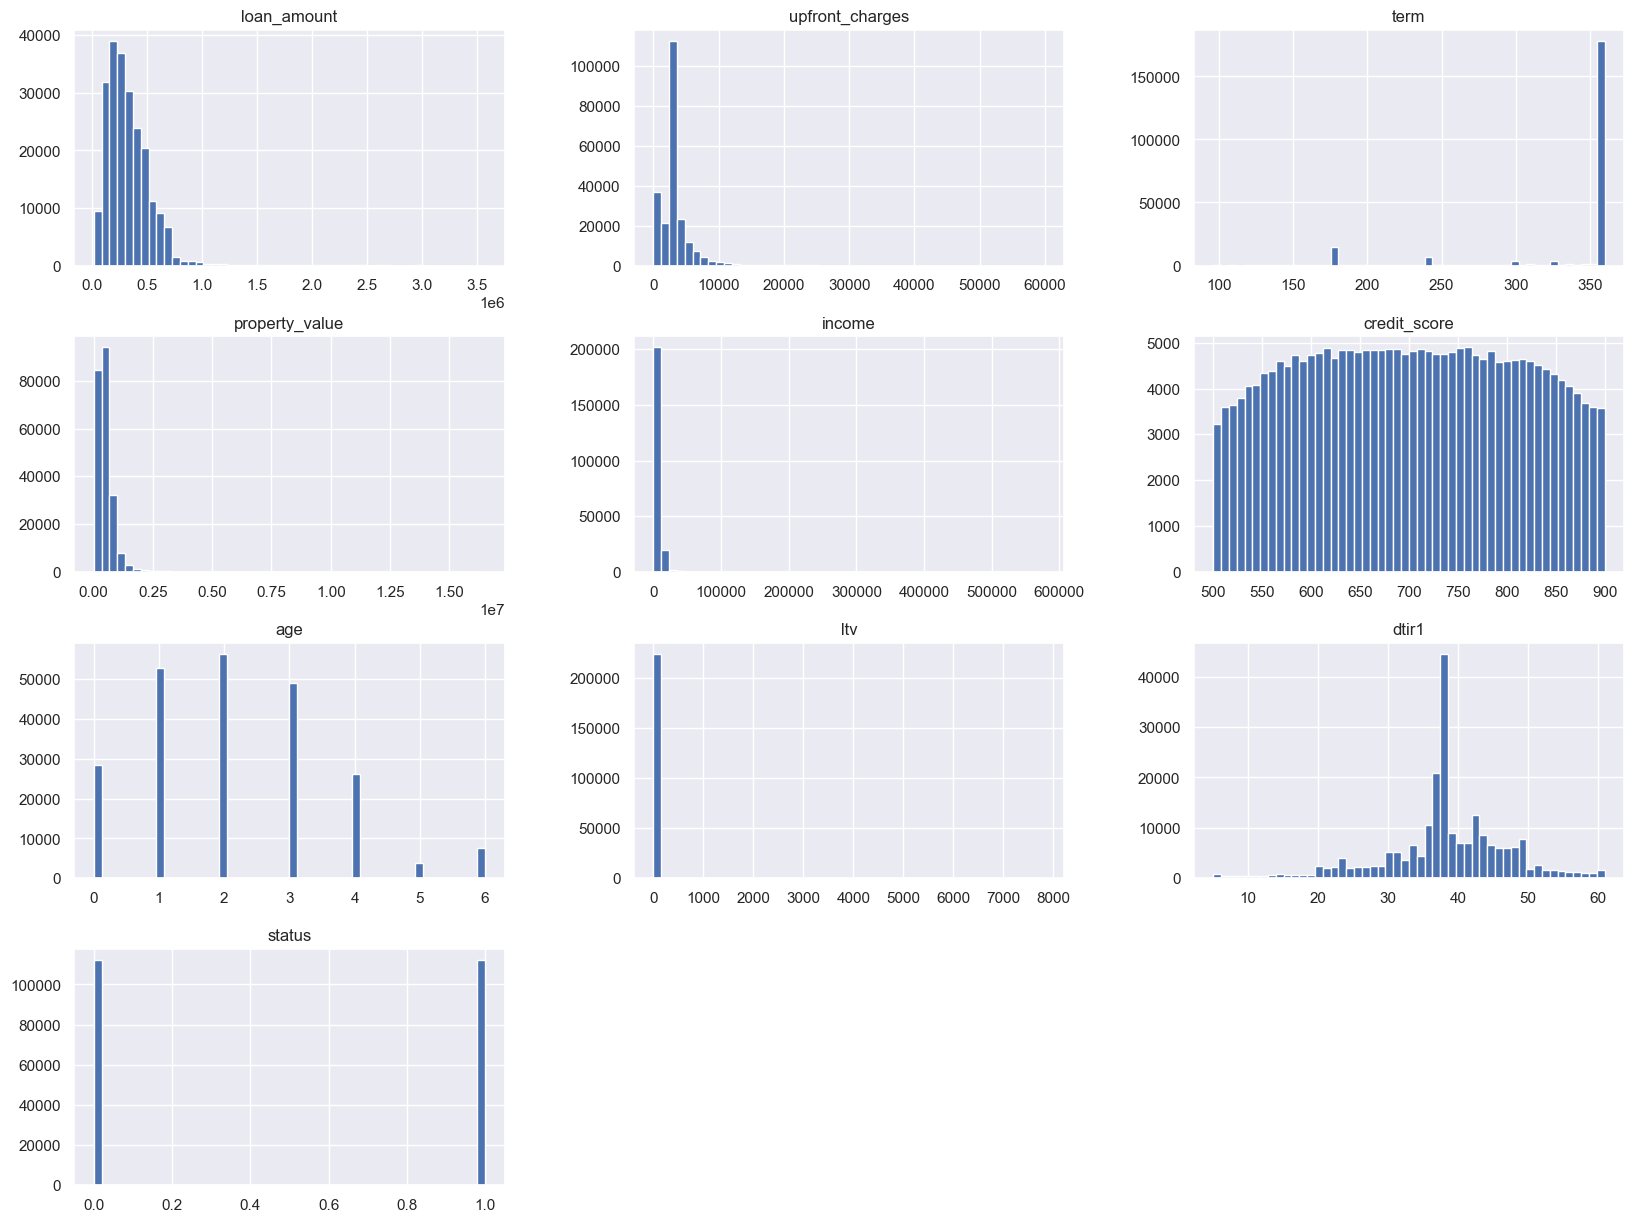

In [526]:
df_smote.hist(bins = 50, figsize = (20, 15))
plt.show()

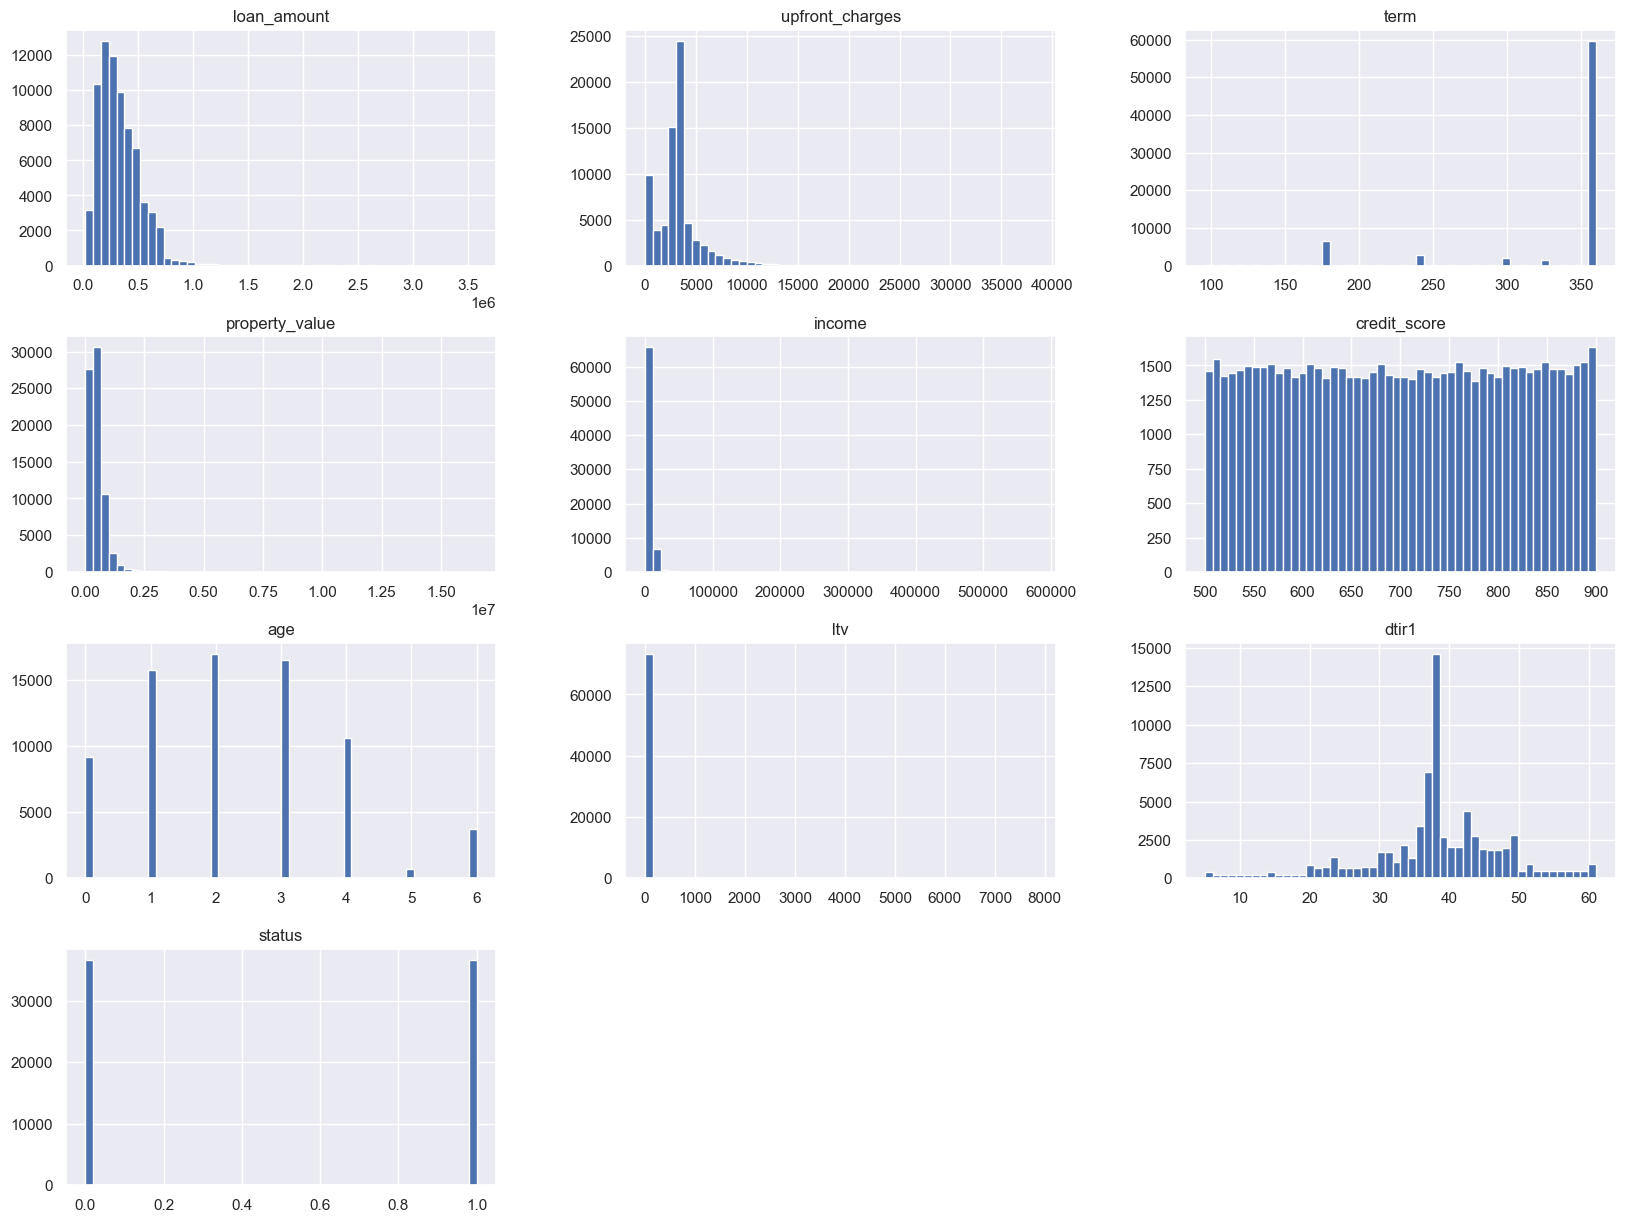

In [527]:
df_under.hist(bins = 50, figsize = (20, 15))
plt.show()

## 3.2 Correlation Analysis
Analyze correlations between numerical features

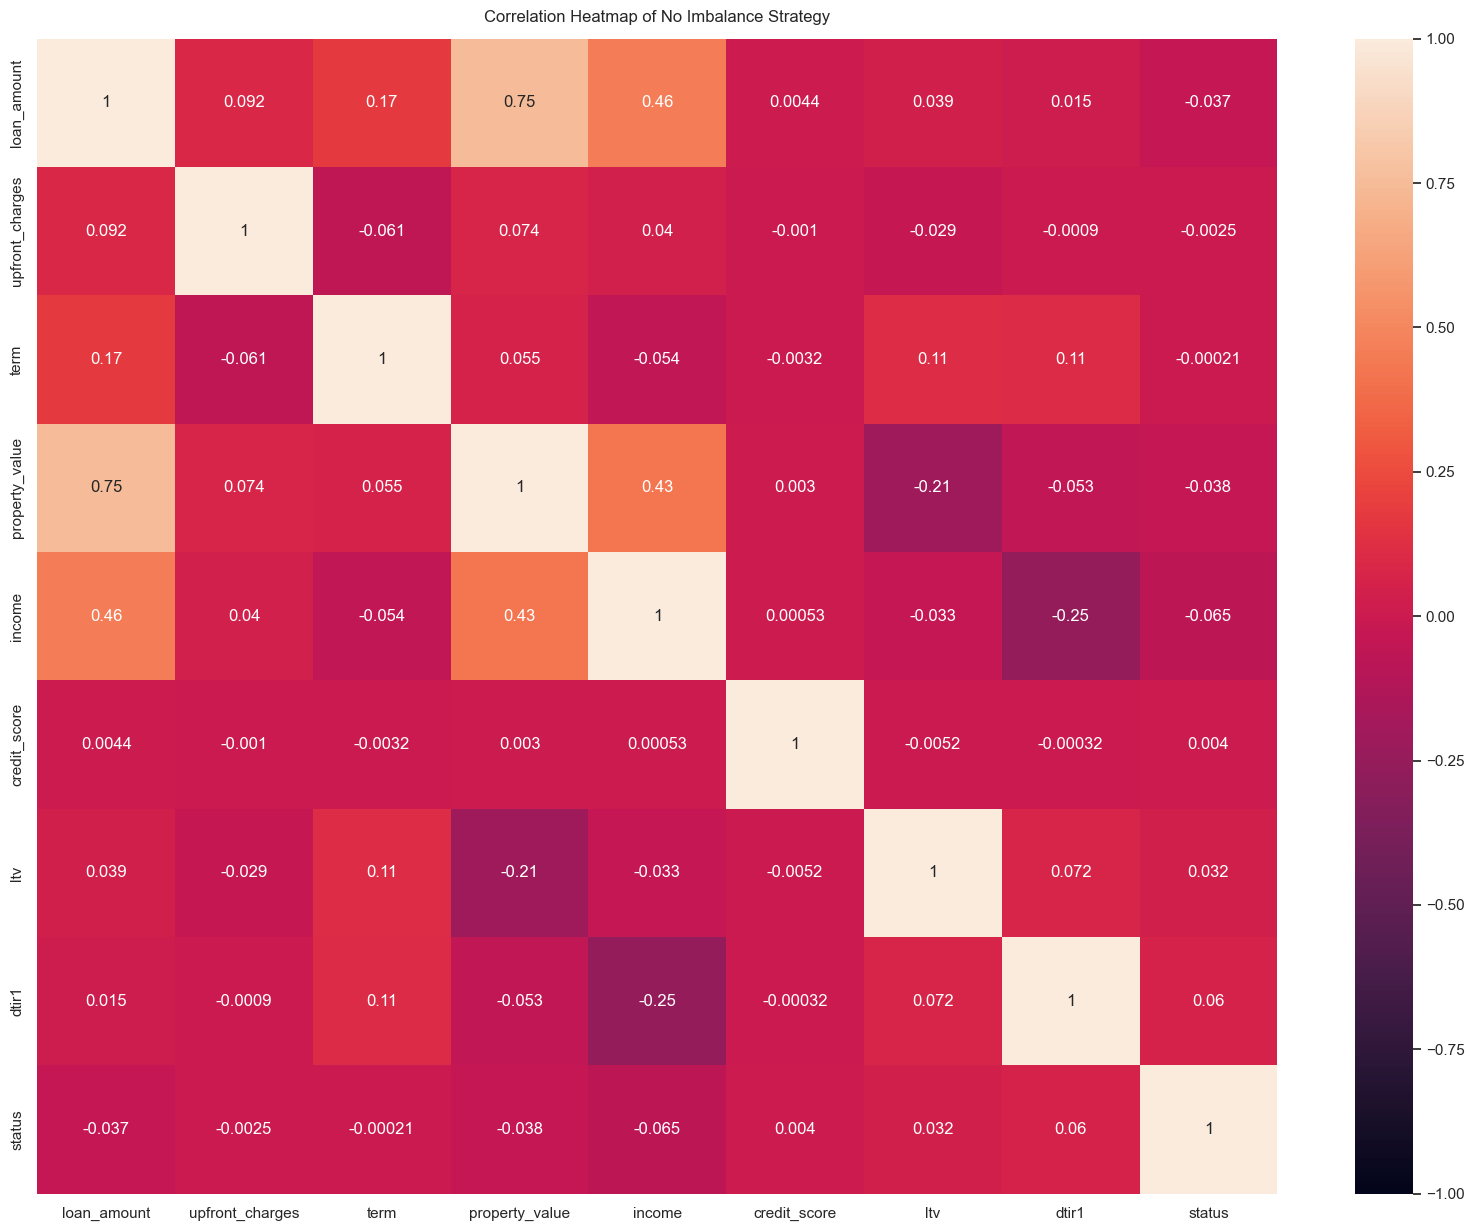

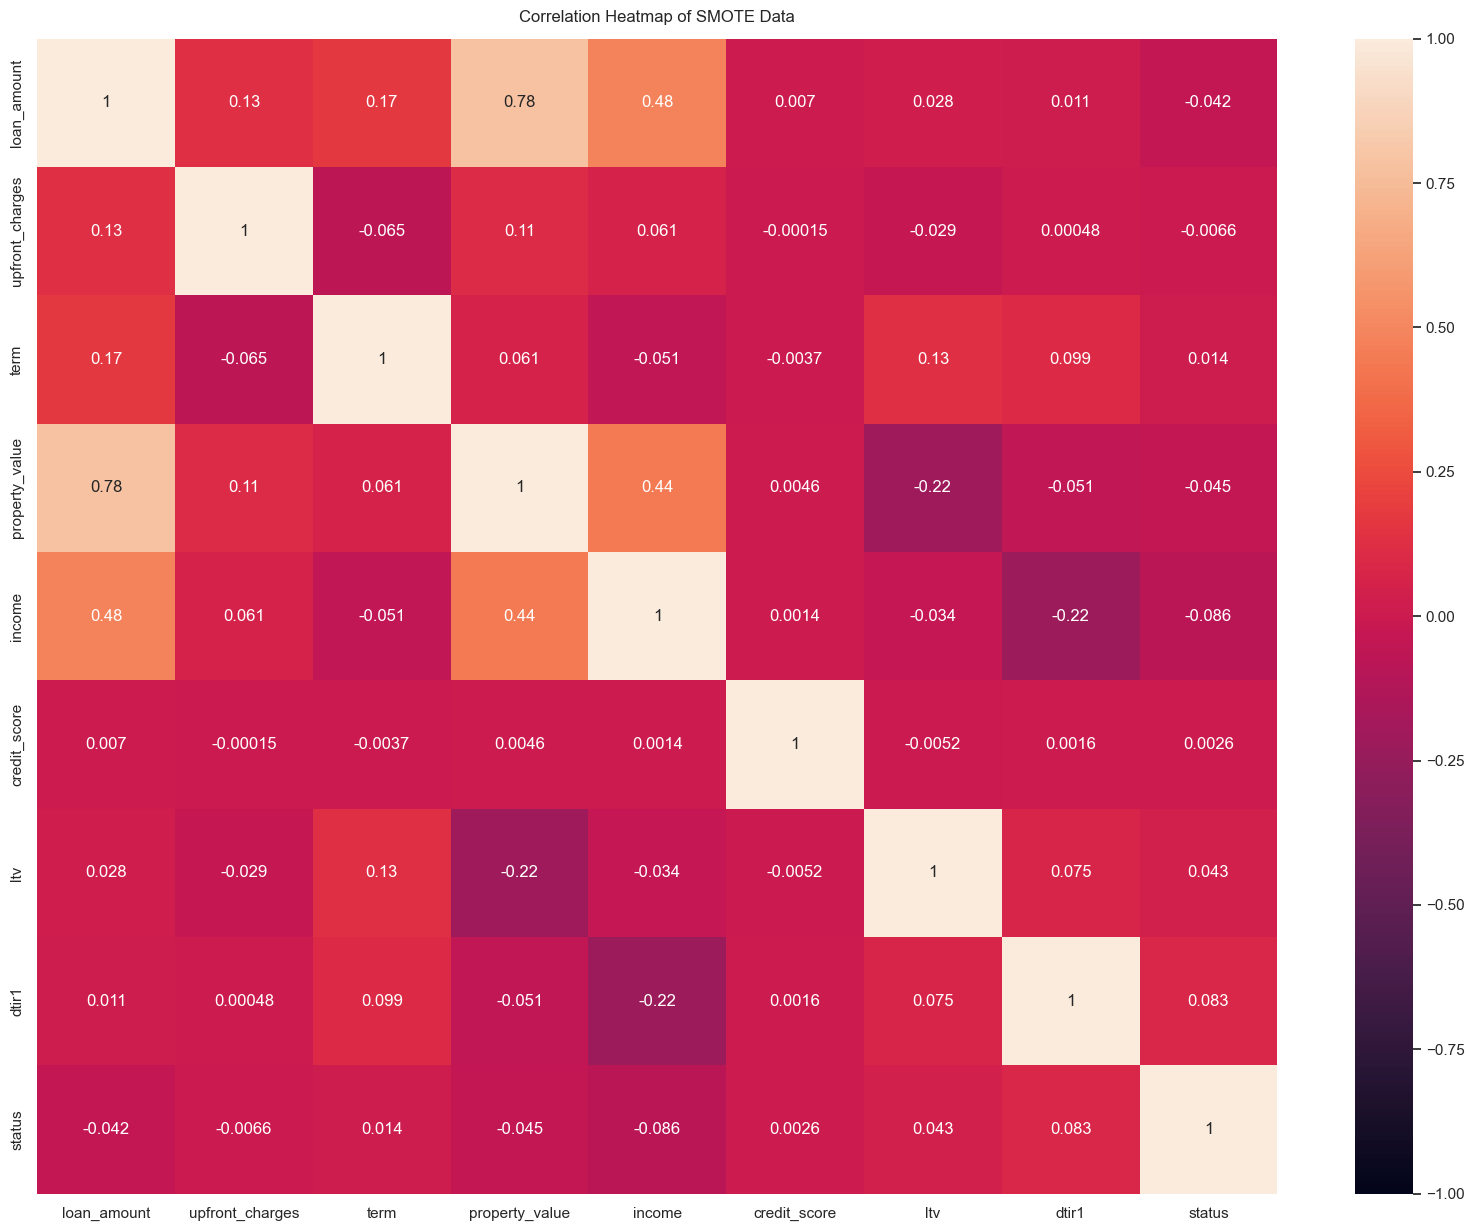

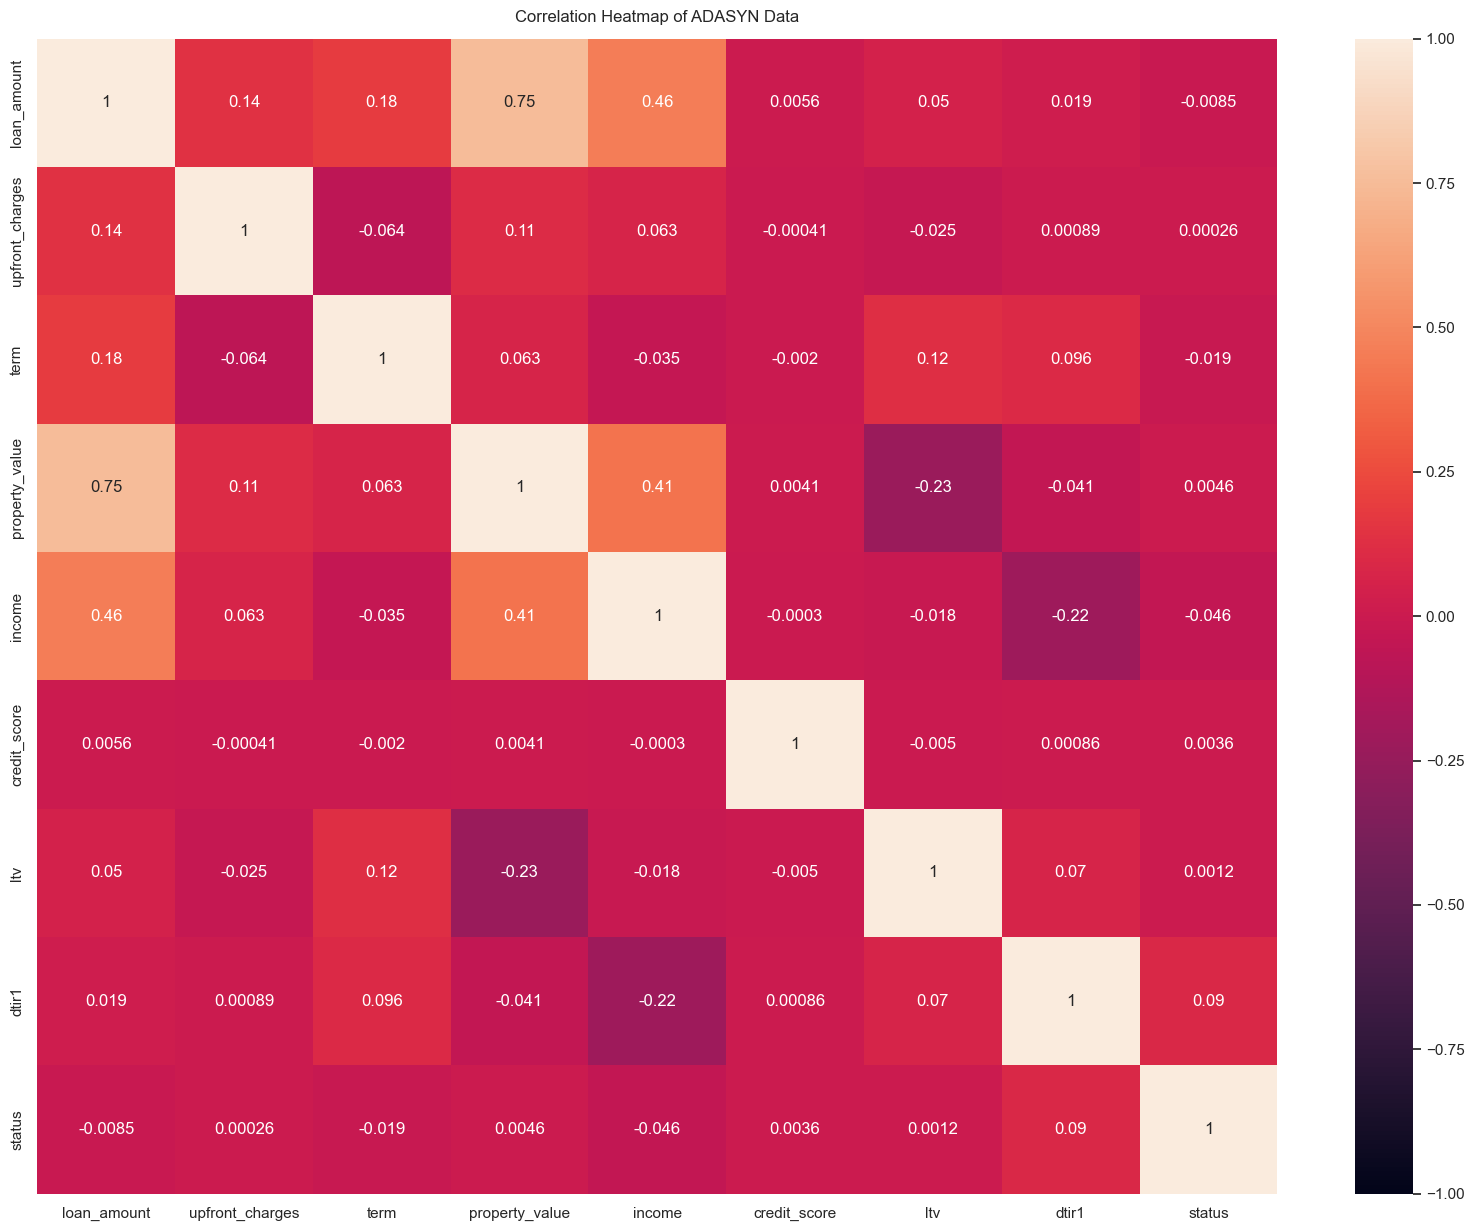

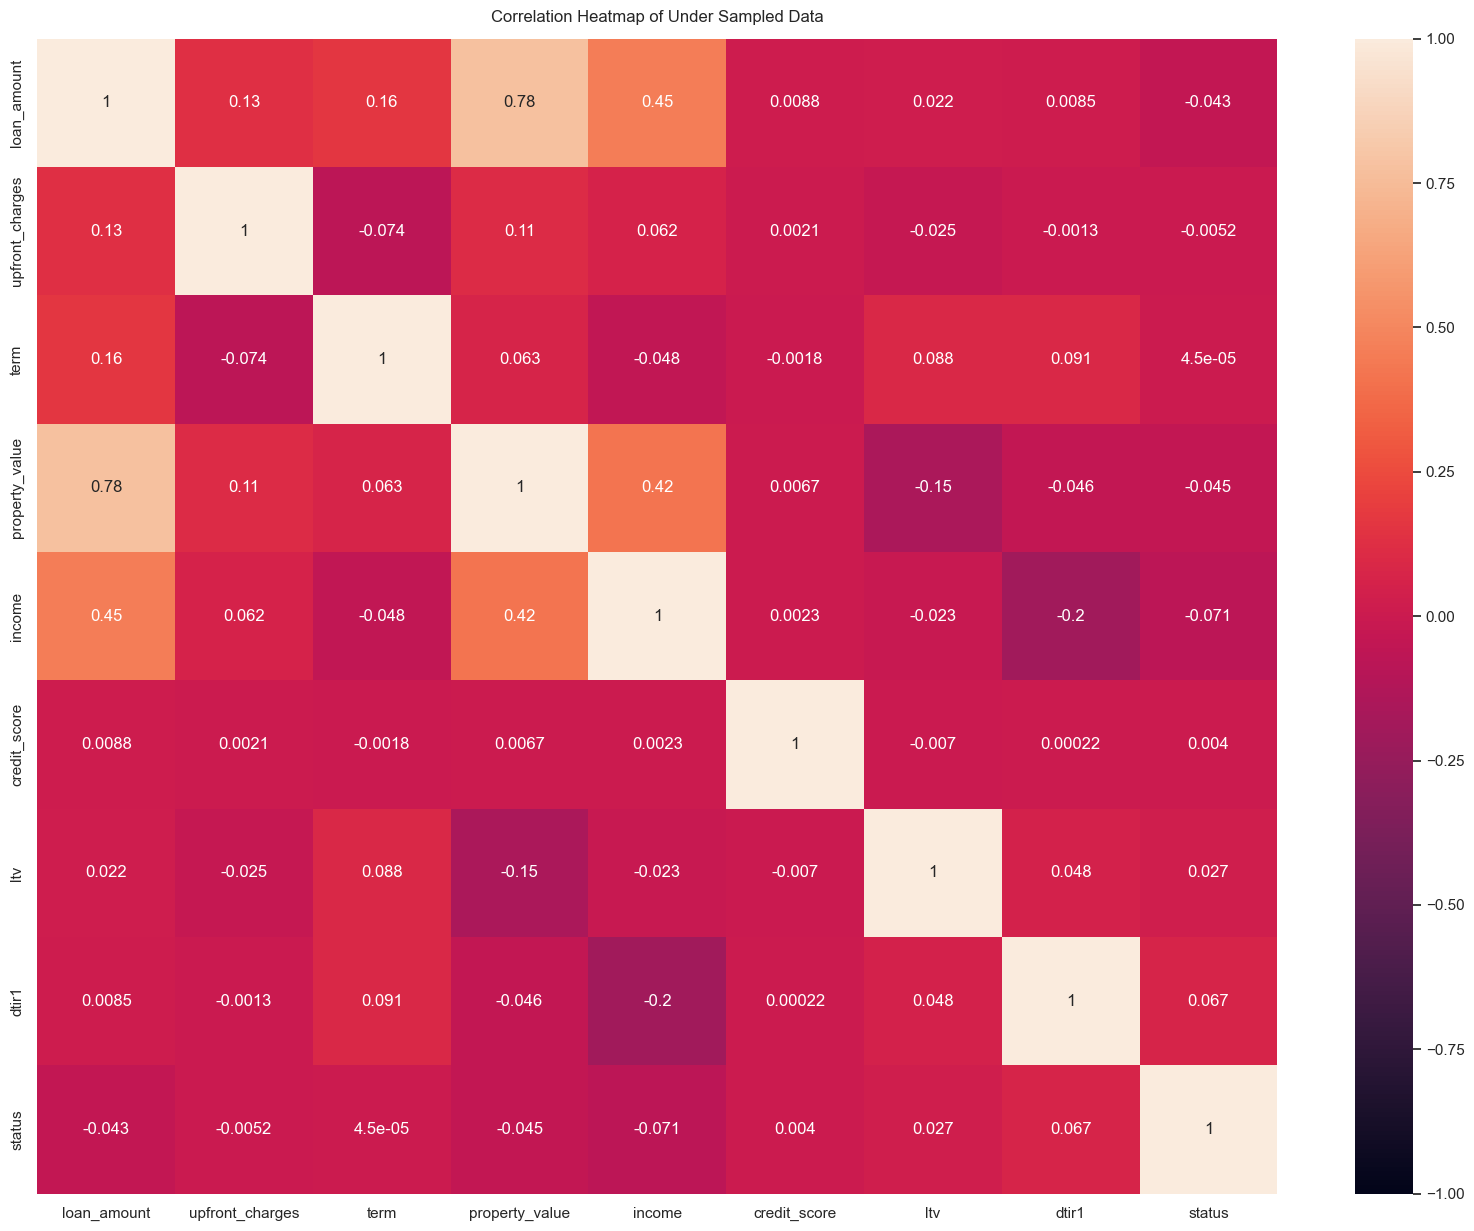

In [528]:
for i, method in enumerate(methods_for_imbalanced_data):
    corr = df_sets[i%4].drop(columns=["age"],axis=1).corr()
    plt.figure(figsize=(20, 15))
    heatmap = sb.heatmap(corr, vmin=-1, vmax=1, annot=True)
    heatmap.set_title('Correlation Heatmap of {}'.format(method), fontdict={'fontsize':12}, pad=12)

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">4. Scaling, Categorical Variables, and Splitting</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>
## 4.1 Splitting
Split the data into training and testing sets to avoid data leakage:

- **Train/Test Split:** Usually a 70/30 or 80/20 split.
- **Stratified Sampling:** If the dataset is imbalanced, ensure stratified sampling of the target variable.

In [568]:
scalling_methods = ["No Scaling", "Standard Scaler", "Min Max Scaler"]
all_types_data = {i: {j : {k : None for k in ['X_train','X_test','y_train','y_test']}
                      for j in scalling_methods}
                      for i in methods_for_imbalanced_data}

In [569]:

Xs = [X,X_smote,X_adasyn,X_under]
ys = [y,y_smote,y_adasyn,y_under]
for index,data_frame in enumerate(methods_for_imbalanced_data):
    X_train, X_test, y_train, y_test = train_test_split(Xs[index], ys[index], test_size=0.3, stratify=ys[index], random_state=1)
    all_types_data[data_frame]["No Scaling"]["X_train"]=X_train
    all_types_data[data_frame]["No Scaling"]["X_test"]=X_test
    for method in scalling_methods:
        all_types_data[data_frame][method]["y_train"]=y_train
        all_types_data[data_frame][method]["y_test"]=y_test

## 4.2 Encoding Categorical Variables
Handle categorical features:

- **Label Encoding:** For ordinal variables.
- **One-Hot Encoding:** For nominal variables.

In [570]:
for index,data_frame in enumerate(methods_for_imbalanced_data):
    
    dummy_frame = pd.get_dummies(all_types_data[data_frame]["No Scaling"]["X_train"]["age"],
                         drop_first=False,dtype=float,prefix='age')
    dummy_frame.columns =  [cat.replace('<','lower ').replace('>',"greater ") for cat in category_list]
    all_types_data[data_frame]["No Scaling"]["X_train"]=pd.concat(
        [all_types_data[data_frame]["No Scaling"]["X_train"].drop(columns=["age"],axis=1),
         dummy_frame],axis=1)
    dummy_frame = pd.get_dummies(all_types_data[data_frame]["No Scaling"]["X_test"]["age"],
                         drop_first=False,dtype=float,columns=category_list)
    dummy_frame.columns =  [cat.replace('<','lower ').replace('>',"greater ") for cat in category_list]
    all_types_data[data_frame]["No Scaling"]["X_test"]=pd.concat(
        [all_types_data[data_frame]["No Scaling"]["X_test"].drop(columns=["age"],axis=1),
         dummy_frame],axis=1)


## 4.3 Scaling
Normalize or standardize features to improve model performance, especially for distance-based algorithms (e.g., k-NN, SVM):

In [572]:
scalers = {"StandardScaler": [], "MinMaxScaler": []}
for data_frame in all_types_data:
    minmax = MinMaxScaler()
    standart = StandardScaler()
    all_types_data[data_frame]["Standard Scaler"]["X_train"] = minmax.fit_transform(all_types_data[data_frame]["No Scaling"]["X_train"])
    all_types_data[data_frame]["Min Max Scaler"]["X_train"] = standart.fit_transform(all_types_data[data_frame]["No Scaling"]["X_train"])
    all_types_data[data_frame]["Standard Scaler"]["X_test"] = minmax.transform(all_types_data[data_frame]["No Scaling"]["X_test"])
    all_types_data[data_frame]["Min Max Scaler"]["X_test"] = standart.transform(all_types_data[data_frame]["No Scaling"]["X_test"])
    
    scalers["MinMaxScaler"].append(minmax)
    scalers["StandardScaler"].append(standart)
       

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">5. Models</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## 5.1 Creating Models and Fine-Tuning
Build and evaluate baseline models using different machine learning algorithms. Improve model performance by tuning hyperparameters:

In [552]:
def visualize_model_performance(results, model_name):
    # Prepare data for visualization
    performance_data = []
    for data_frame in results[model_name]:
        for scaling_method in results[model_name][data_frame]:
            test_results = results[model_name][data_frame][scaling_method].get('Test', {})
            performance_data.append({
                'Imbalance Method': data_frame,
                'Scaling Method': scaling_method,
                'Accuracy': test_results.get('Accuracy', np.nan),
                'F1 Score': test_results.get('F1 Score', np.nan),
                'Recall': test_results.get('Recall', np.nan),
                'ROC AUC': test_results.get('ROC', np.nan)
            })
    
    df_performance = pd.DataFrame(performance_data)
    # Set up the matplotlib figure
    plt.figure(figsize=(20, 15))

    metrics = ['Accuracy', 'F1 Score', 'Recall', 'ROC AUC']
    # Heatmaps for each metric
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 3, i)
        
        pivot_metric = df_performance.pivot(
            index='Imbalance Method', 
            columns='Scaling Method', 
            values=metric
        )
        sb.heatmap(pivot_metric, annot=True, cmap='YlGnBu', center=pivot_metric.mean().mean())
        plt.title(f'{metric} Heatmap')
        plt.tight_layout()
    
    # 5. Comparative Bar Plot (Recall)
    ax = plt.subplot(2, 3, 5)
    sb.barplot(
        x='Imbalance Method', 
        y='Recall', 
        hue='Scaling Method', 
        data=df_performance
    )
    ax.set_ylim([0, 1])
    plt.title(f'{model_name} Recall Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # 6. Normalized Performance Radar Chart
    ax = plt.subplot(2, 3, 6)
    ax.set_ylim([0, 1])
    df_melted = pd.melt(
        df_performance, 
        id_vars=['Imbalance Method', 'Scaling Method'], 
        value_vars=['Accuracy', 'F1 Score', 'ROC AUC'],
        var_name='Metric', 
        value_name='Value'
    )
    
    sb.boxplot(
        x='Imbalance Method', 
        y='Value', 
        hue='Metric', 
        data=df_melted
    )
    plt.title('Overall Performance Metrics')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Adjust layout and show plot
    plt.suptitle(f'{model_name} Model Performance Analysis', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Print detailed performance summary
    print(f"\n{model_name} Performance Summary:")
    summary = df_performance.groupby(['Imbalance Method', 'Scaling Method']).mean()
    print(summary)
    
    # Identify best configurations
    print(f"\nBest {model_name} Configurations:")
    for metric in metrics:
        best_idx = df_performance[metric].idxmax()
        print(f"\nBest {metric} Configuration:")
        print(df_performance.loc[best_idx])
    
    return None #df_performance

def set_save_results(model_list, model_name, data_frame, method, train_accuracy,test_metric, model, results):
    results[model_name][data_frame][method]["Train"] = train_accuracy
    results[model_name][data_frame][method]["Test"] = test_metric
    model_list[data_frame+"_"+method] = model

def run_model(model, all_types_data, data_frame,method, importance=True):
    model.fit(all_types_data[data_frame][method]["X_train"], all_types_data[data_frame][method]["y_train"])
    prediction = model.predict(all_types_data[data_frame][method]["X_test"])
    train_accuracy = model.score(all_types_data[data_frame][method]["X_train"], 
                                                                all_types_data[data_frame][method]["y_train"])
    test_metric = {
                "Accuracy": accuracy_score(all_types_data[data_frame][method]["y_test"], prediction),
                "Precision": precision_score(all_types_data[data_frame][method]["y_test"], prediction),
                "Recall": recall_score(all_types_data[data_frame][method]["y_test"], prediction),
                "F1 Score": f1_score(all_types_data[data_frame][method]["y_test"], prediction),
                "Confusion Matrix": confusion_matrix(all_types_data[data_frame][method]["y_test"], prediction),
                "ROC": roc_auc_score(all_types_data[data_frame][method]["y_test"], prediction)
            }
    print("Train Score : ",train_accuracy)
    print("Test Score : ",test_metric["Accuracy"])
    print("Test F1 Score : ",test_metric["F1 Score"])
    print("Test ROC : ", test_metric["ROC"])
    print("Test Recall : ", test_metric["Recall"])
    if importance:
        print("Feature Importance : ",model.feature_importances_)
    return train_accuracy,test_metric, model

def run_check_model(model, results, all_types_data, data_frame,method, importance=True):
    model.fit(all_types_data[data_frame][method]["X_train"], all_types_data[data_frame][method]["y_train"])
    prediction = model.predict(all_types_data[data_frame][method]["X_test"])
    train_accuracy = model.score(all_types_data[data_frame][method]["X_train"], 
                                                                all_types_data[data_frame][method]["y_train"])
    test_metric = {
                "Accuracy": accuracy_score(all_types_data[data_frame][method]["y_test"], prediction),
                "Precision": precision_score(all_types_data[data_frame][method]["y_test"], prediction),
                "Recall": recall_score(all_types_data[data_frame][method]["y_test"], prediction),
                "F1 Score": f1_score(all_types_data[data_frame][method]["y_test"], prediction),
                "Confusion Matrix": confusion_matrix(all_types_data[data_frame][method]["y_test"], prediction),
                "ROC": roc_auc_score(all_types_data[data_frame][method]["y_test"], prediction)
            }
    print("Train Score : ",train_accuracy - results["KNN"][data_frame][method]["Train"])
    print("Test Score : ",test_metric["Accuracy"] - results["KNN"][data_frame][method]["Test"]["Accuracy"])
    print("Test F1 Score : ", test_metric["F1 Score"]- results["KNN"][data_frame][method]["Test"]["F1 Score"])
    print("Test ROC : ", test_metric["ROC"] - results["KNN"][data_frame][method]["Test"]["ROC"])
    print("Test Recall : ", test_metric["Recall"] - results["KNN"][data_frame][method]["Test"]["Recall"])
    if importance:
        print("Feature Importance : ",model.feature_importances_)
    return train_accuracy,test_metric, model


In [165]:
model_names = ["KNN","Decision Tree","Random Forest","Logistic Regression","MLP","XGBoost","LightGBM","CatBoost"]
results = {l:{i:{j:{k:None for k in ["Test","Train"]} for j in scalling_methods} for i in methods_for_imbalanced_data} for l in model_names}

In [169]:
KNN = {}
model_number = 0
c=0
for data_frame in all_types_data:
    for method in scalling_methods:
        print("Progress: {:.2f}%".format(100*(c)/(len(all_types_data)*len(scalling_methods))))
        c+=1
        print("Model: {}".format(model_names[model_number]))
        print("Data Frame : {} , Scalling Method : {}".format(data_frame,method))
        model = KNeighborsClassifier(n_neighbors=5, # 5, 7, 10, 15, 20, 25
                                     algorithm='auto', # auto, ball_tree, kd_tree, brute
                                     leaf_size=30, # 30, 40, 50, 60, 70, 80, 90, 100
                                     p=2) # 1, 2
        train_accuracy,test_metric, model = run_model(model, all_types_data, data_frame,method, importance=False)
        set_save_results(KNN, model_names[model_number], data_frame, method, train_accuracy,test_metric, model, results)
        print("---------------------------------------------------")
        

Progress: 0.00%
Model: KNN
Data Frame : No Imbalance Strategy , Scalling Method : No Scaling
Train Score :  0.9031604031940347
Test Score :  0.8606757696015784
Test F1 Score :  0.6978214355183816
Test ROC :  0.7907136352993928
Test Recall :  0.6527474526928675
---------------------------------------------------
Progress: 8.33%
Model: KNN
Data Frame : No Imbalance Strategy , Scalling Method : Standard Scaler
Train Score :  0.8801660436825568
Test Score :  0.8176498284791821
Test F1 Score :  0.6287149052727687
Test ROC :  0.7533182540001178
Test Recall :  0.6264556040756915
---------------------------------------------------
Progress: 16.67%
Model: KNN
Data Frame : No Imbalance Strategy , Scalling Method : Min Max Scaler
Train Score :  0.9083396592645264
Test Score :  0.8608327167552297
Test F1 Score :  0.7195336857801274
Test ROC :  0.8149083634023482
Test Recall :  0.7243449781659389
---------------------------------------------------
Progress: 25.00%
Model: KNN
Data Frame : SMOTE Data

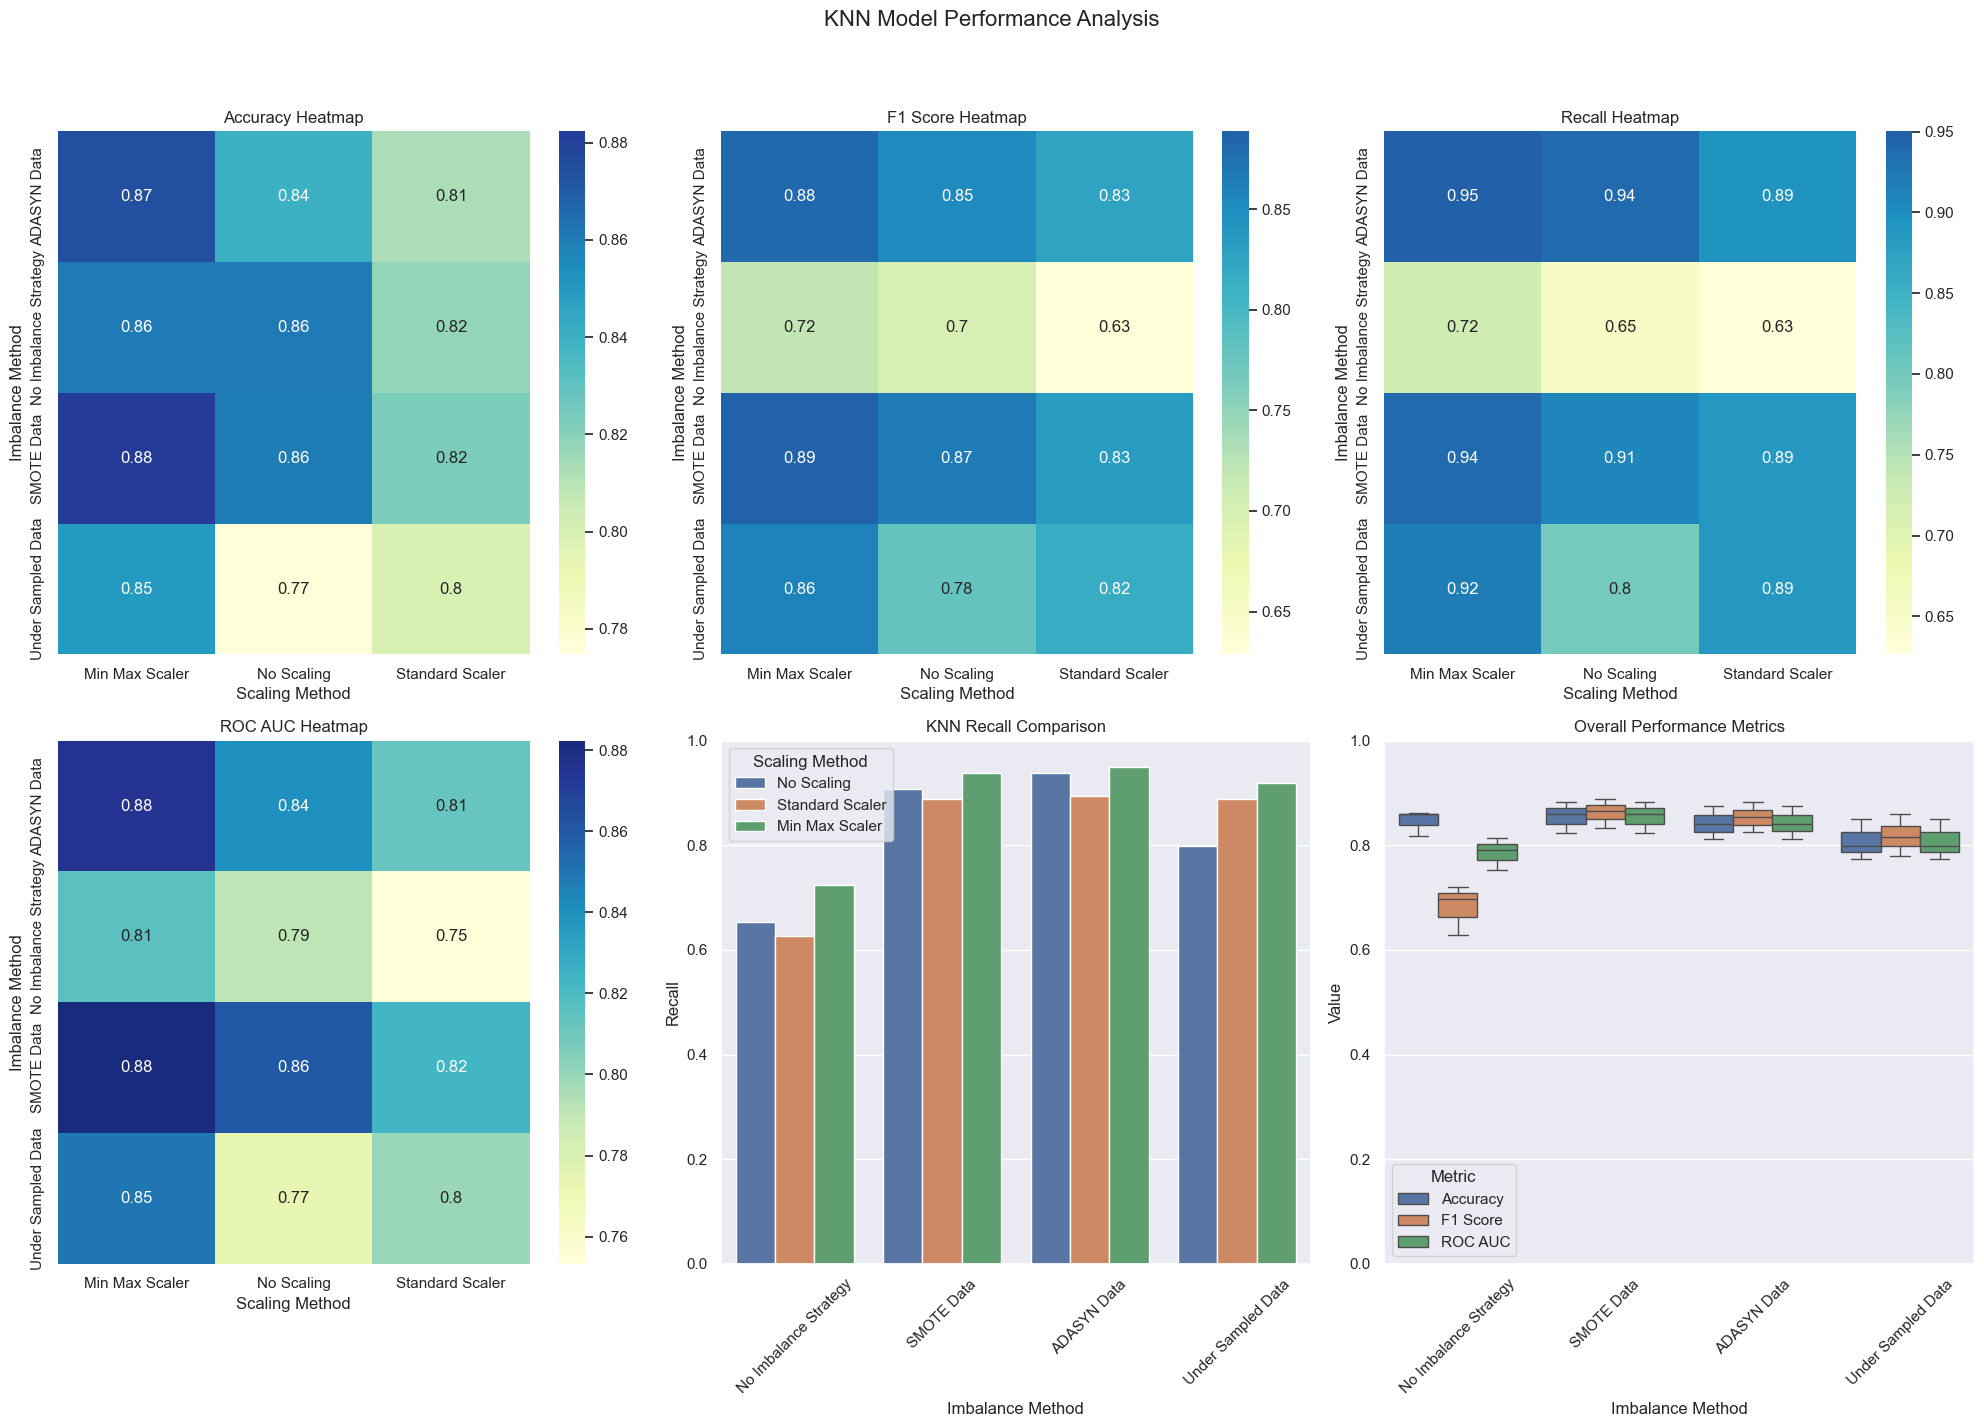


KNN Performance Summary:
                                       Accuracy  F1 Score    Recall   ROC AUC
Imbalance Method      Scaling Method                                         
ADASYN Data           Min Max Scaler   0.874942  0.883085  0.950066  0.875372
                      No Scaling       0.840109  0.853769  0.938930  0.840675
                      Standard Scaler  0.812293  0.825684  0.894263  0.812763
No Imbalance Strategy Min Max Scaler   0.860833  0.719534  0.724345  0.814908
                      No Scaling       0.860676  0.697821  0.652747  0.790714
                      Standard Scaler  0.817650  0.628715  0.626456  0.753318
SMOTE Data            Min Max Scaler   0.882295  0.888604  0.938917  0.882294
                      No Scaling       0.859742  0.866277  0.908599  0.859741
                      Standard Scaler  0.822714  0.833531  0.887682  0.822713
Under Sampled Data    Min Max Scaler   0.849982  0.859719  0.919396  0.849982
                      No Scaling      

In [170]:
visualize_model_performance(results,model_names[model_number])

In [172]:
data_frame = "SMOTE Data"
method = "Min Max Scaler"
model = KNeighborsClassifier(n_neighbors=3, # 5, 7, 10, 15, 20, 25
                            weights='uniform', 
                            algorithm='auto', 
                            leaf_size=30, # 30, 40, 50, 60, 70, 80, 90, 100
                            p=2 # 1, 2
                            ) 

train_accuracy,test_metric, model = run_check_model(model, results, all_types_data, data_frame,method, importance=False)

Train Score :  0.018037145425680468
Test Score :  -0.0015174281081241636
Test F1 Score :  -0.0022714827758923972
Test ROC :  -0.001517312580685215
Test Recall :  -0.009282951502529002


In [173]:
# set_save_results(KNN, model_names[model_number], data_frame, method, train_accuracy,test_metric, model, results)

In [178]:
LR = {}
c=0
model_number = 3
for data_frame in all_types_data:
    for method in scalling_methods:
        print("Progress: {:.2f}%".format(100*(c)/(len(all_types_data)*len(scalling_methods))))
        c+=1
        print("Data Frame : {} , Scalling Method : {}".format(data_frame,method))
        model = LogisticRegression(class_weight="balanced", 
                                   solver='lbfgs', 
                                   max_iter=400,  # 100, 200, 300, 400, 500
                                   warm_start=True)
        
        train_accuracy,test_metric, model = run_model(model, all_types_data, data_frame,method, importance=False)
        set_save_results(LR, model_names[model_number], data_frame, method, train_accuracy,test_metric, model, results)
        print("---------------------------------------------------")


Progress: 0.00%
Data Frame : No Imbalance Strategy , Scalling Method : No Scaling


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Score :  0.5429186405173491
Test Score :  0.545839779377144
Test F1 Score :  0.40758072063640616
Test ROC :  0.5754748513635034
Test Recall :  0.63391557496361
---------------------------------------------------
Progress: 8.33%
Data Frame : No Imbalance Strategy , Scalling Method : Standard Scaler
Train Score :  0.5370187087413159
Test Score :  0.5411537857895563
Test F1 Score :  0.3812173071689898
Test ROC :  0.5520400869958283
Test Recall :  0.5735080058224163
---------------------------------------------------
Progress: 16.67%
Data Frame : No Imbalance Strategy , Scalling Method : Min Max Scaler
Train Score :  0.5626171098021505
Test Score :  0.5621622833568755
Test F1 Score :  0.3897118569910619
Test ROC :  0.5638676699914414
Test Recall :  0.567230713245997
---------------------------------------------------
Progress: 25.00%
Data Frame : SMOTE Data , Scalling Method : No Scaling


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Score :  0.5737520960450897
Test Score :  0.5778425742721552
Test F1 Score :  0.6065362377116236
Test ROC :  0.5778414895012829
Test Recall :  0.6507587027670336
---------------------------------------------------
Progress: 33.33%
Data Frame : SMOTE Data , Scalling Method : Standard Scaler
Train Score :  0.5594129161008142
Test Score :  0.5628319373986521
Test F1 Score :  0.5880505789665517
Test ROC :  0.5628310268013902
Test Recall :  0.6240404641475751
---------------------------------------------------
Progress: 41.67%
Data Frame : SMOTE Data , Scalling Method : Min Max Scaler
Train Score :  0.5803638032937396
Test Score :  0.5807435397729809
Test F1 Score :  0.5966162830642391
Test ROC :  0.5807429545165202
Test Recall :  0.6200833085391253
---------------------------------------------------
Progress: 50.00%
Data Frame : ADASYN Data , Scalling Method : No Scaling


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Score :  0.5413003469216316
Test Score :  0.5471398859844687
Test F1 Score :  0.553031869332782
Test ROC :  0.547233983074589
Test Recall :  0.5635685046954009
---------------------------------------------------
Progress: 58.33%
Data Frame : ADASYN Data , Scalling Method : Standard Scaler
Train Score :  0.5395561198643094
Test Score :  0.5426810108778597
Test F1 Score :  0.5484709706012705
Test ROC :  0.5427728912629372
Test Recall :  0.5587226101613292
---------------------------------------------------
Progress: 66.67%
Data Frame : ADASYN Data , Scalling Method : Min Max Scaler
Train Score :  0.543602470133318
Test Score :  0.5468705579578951
Test F1 Score :  0.5571478708469817
Test ROC :  0.5470223982435306
Test Recall :  0.5733806886588009
---------------------------------------------------
Progress: 75.00%
Data Frame : Under Sampled Data , Scalling Method : No Scaling


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Score :  0.5619370686630015
Test Score :  0.5681404657933042
Test F1 Score :  0.6019620996142881
Test ROC :  0.5681404657933042
Test Recall :  0.6531113537117904
---------------------------------------------------
Progress: 83.33%
Data Frame : Under Sampled Data , Scalling Method : Standard Scaler
Train Score :  0.5479978165087535
Test Score :  0.5493085880640466
Test F1 Score :  0.5572437215121995
Test ROC :  0.5493085880640466
Test Recall :  0.567230713245997
---------------------------------------------------
Progress: 91.67%
Data Frame : Under Sampled Data , Scalling Method : Min Max Scaler
Train Score :  0.5608843139548485
Test Score :  0.5594068413391557
Test F1 Score :  0.5657281205164992
Test ROC :  0.5594068413391557
Test Recall :  0.5739628820960698
---------------------------------------------------


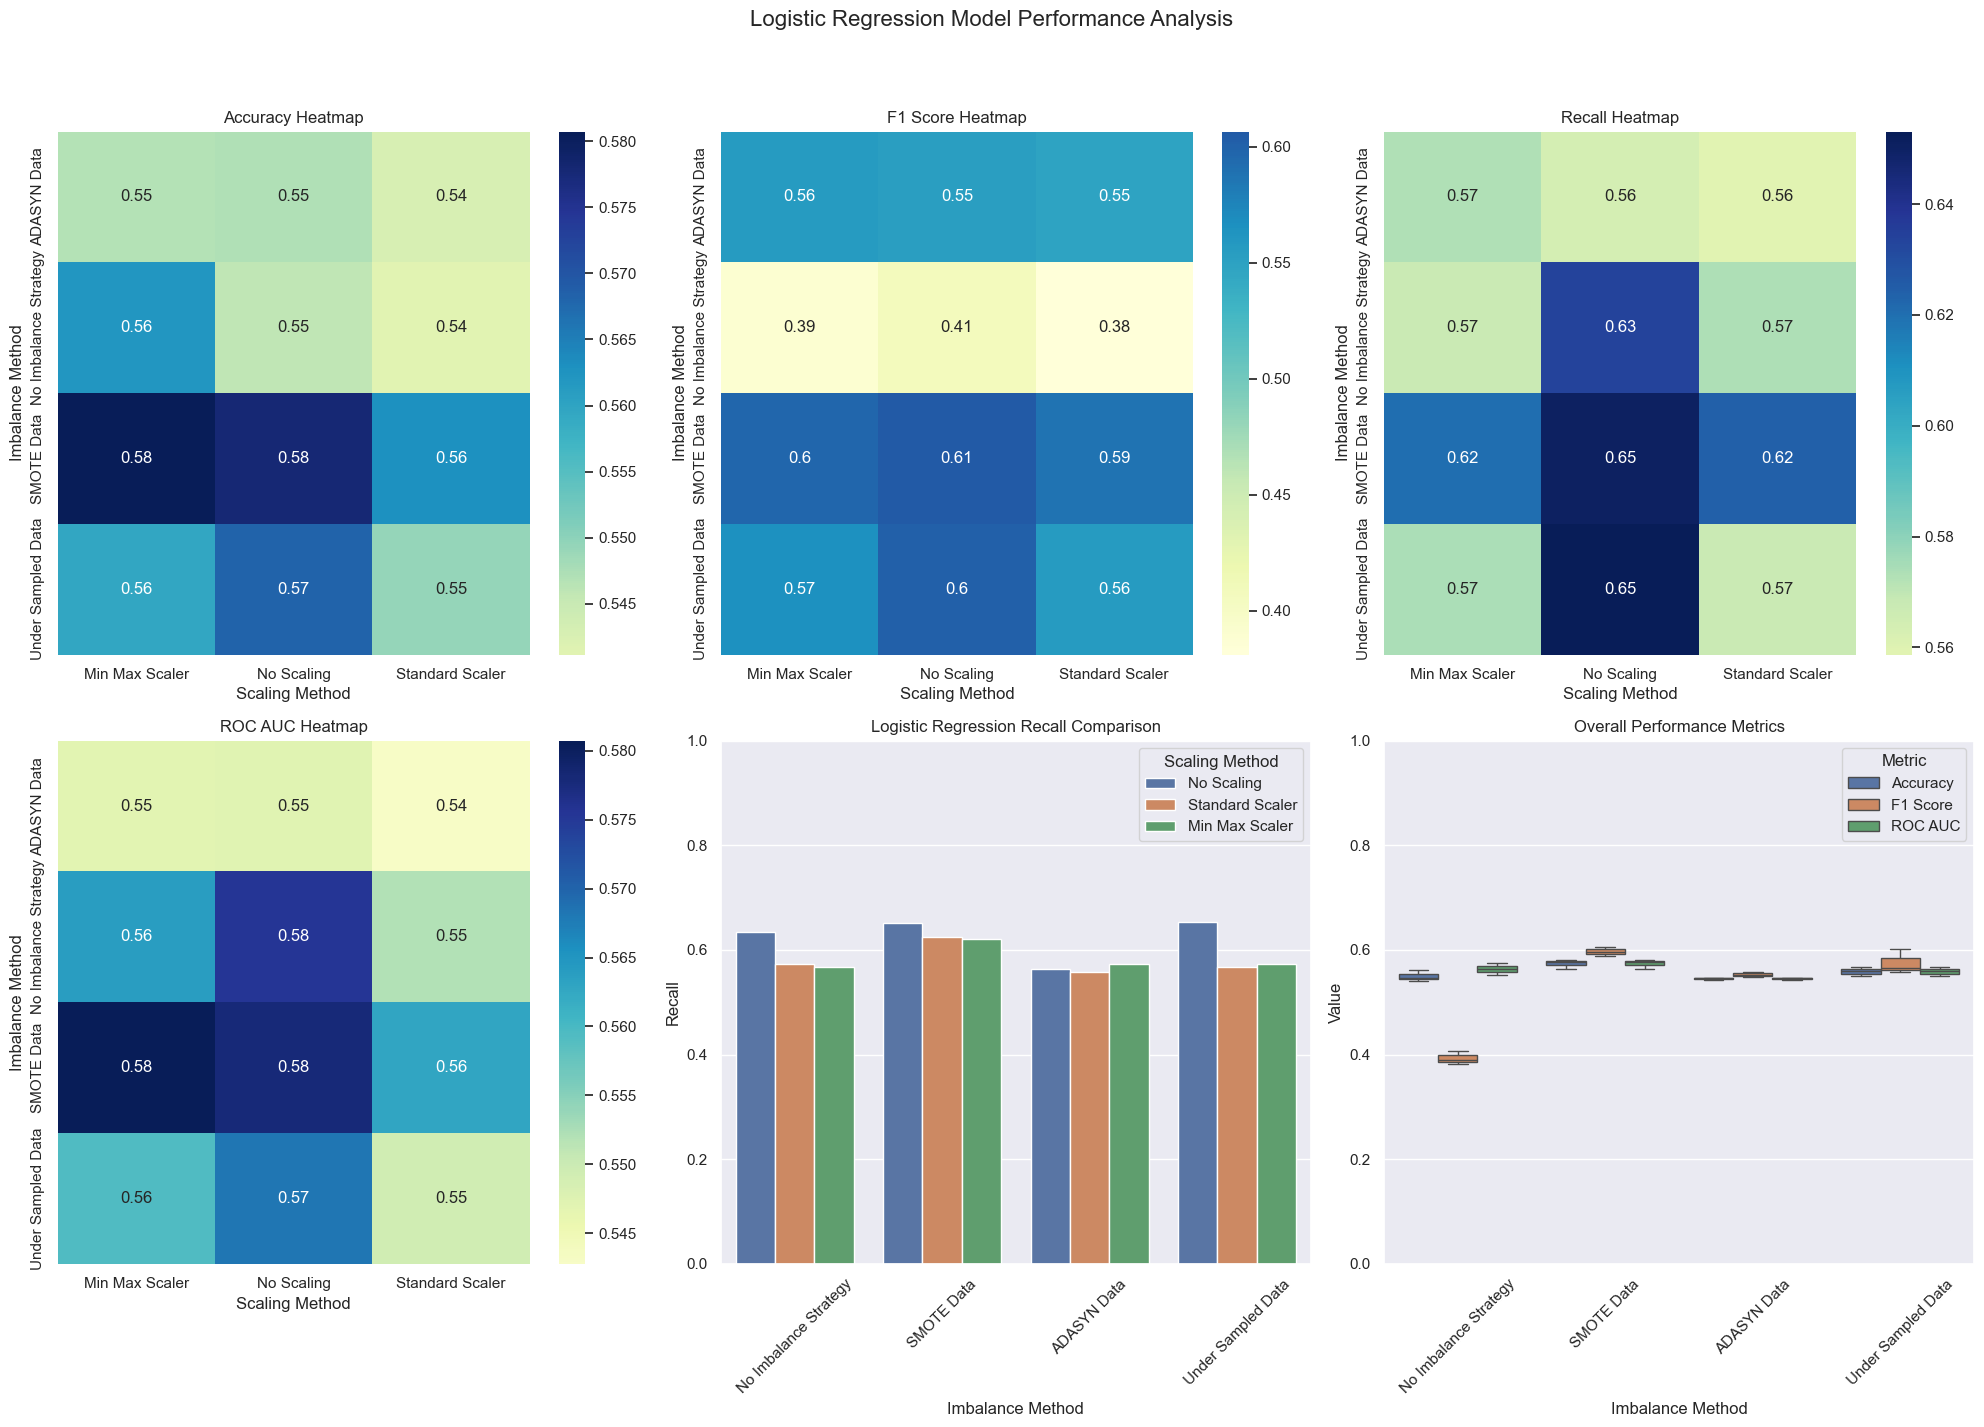


Logistic Regression Performance Summary:
                                       Accuracy  F1 Score    Recall   ROC AUC
Imbalance Method      Scaling Method                                         
ADASYN Data           Min Max Scaler   0.546871  0.557148  0.573381  0.547022
                      No Scaling       0.547140  0.553032  0.563569  0.547234
                      Standard Scaler  0.542681  0.548471  0.558723  0.542773
No Imbalance Strategy Min Max Scaler   0.562162  0.389712  0.567231  0.563868
                      No Scaling       0.545840  0.407581  0.633916  0.575475
                      Standard Scaler  0.541154  0.381217  0.573508  0.552040
SMOTE Data            Min Max Scaler   0.580744  0.596616  0.620083  0.580743
                      No Scaling       0.577843  0.606536  0.650759  0.577841
                      Standard Scaler  0.562832  0.588051  0.624040  0.562831
Under Sampled Data    Min Max Scaler   0.559407  0.565728  0.573963  0.559407
                      

In [179]:
visualize_model_performance(results,model_names[model_number])

In [180]:
data_frame = "SMOTE Data"
method = "Min Max Scaler"
model = LogisticRegression(penalty='l2', # 'l1', 'l2', 'elasticnet
                            dual=False,
                            tol=1e-4,
                            C=1.0,
                            fit_intercept=True,
                            intercept_scaling=1,
                            class_weight="balanced", # 'balanced', None
                            solver='lbfgs', # 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
                            max_iter=100,
                            multi_class='auto',
                            verbose=0,
                            warm_start=False)

train_accuracy,test_metric, model = run_check_model(model, results, all_types_data, data_frame,method, importance=False)


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Train Score :  -0.33753498721651587
Test Score :  -0.30155164462428774
Test F1 Score :  -0.29198789005546355
Test ROC :  -0.3015513875200029
Test Recall :  -0.31883368045224636


In [181]:
# set_save_results(LR, model_names[model_number], data_frame, method, train_accuracy,test_metric, model, results)

In [183]:
MLP = {}
model_number = 4
c=0
for data_frame in all_types_data:
    for method in scalling_methods:
        print("Progress: {:.2f}%".format(100*(c)/(len(all_types_data)*len(scalling_methods))))
        c+=1
        print("Data Frame : {} , Scalling Method : {}".format(data_frame,method))
        model = MLPClassifier(hidden_layer_sizes=(64, ), # (64,32 ), (32, 16), (128, 64, 32)
                               activation='relu', 
                                 solver='adam', # 'lbfgs', 'sgd', 'adam'
                                alpha=0.0001,
                                batch_size='auto',
                                learning_rate='constant', # 'constant', 'invscaling', 'adaptive'
                                learning_rate_init=0.001,
                                power_t=0.5,
                                max_iter=200,
                                shuffle=True,
                                random_state=42,
                                n_iter_no_change=10)
        train_accuracy,test_metric, model = run_model(model, all_types_data, data_frame,method, importance=False)
        set_save_results(MLP, model_names[model_number], data_frame, method, train_accuracy,test_metric, model, results)
        print("---------------------------------------------------")


Progress: 0.00%
Data Frame : No Imbalance Strategy , Scalling Method : No Scaling
Train Score :  0.7762253889246558
Test Score :  0.7736149413690276
Test F1 Score :  0.671610238397242
Test ROC :  0.8293699492208172
Test Recall :  0.9393195050946143
---------------------------------------------------
Progress: 8.33%
Data Frame : No Imbalance Strategy , Scalling Method : Standard Scaler


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Score :  0.9120583459051207
Test Score :  0.9072666532140535
Test F1 Score :  0.8209368776517447
Test ROC :  0.8922161554187048
Test Recall :  0.8625363901018923
---------------------------------------------------
Progress: 16.67%
Data Frame : No Imbalance Strategy , Scalling Method : Min Max Scaler
Train Score :  0.9278171213329618
Test Score :  0.9211676868231654
Test F1 Score :  0.8444247787610619
Test ROC :  0.9033071255087239
Test Recall :  0.8680858806404658
---------------------------------------------------
Progress: 25.00%
Data Frame : SMOTE Data , Scalling Method : No Scaling
Train Score :  0.5553897846891478
Test Score :  0.5574019250509529
Test F1 Score :  0.6781762128833361
Test ROC :  0.557396342217136
Test Recall :  0.9326688485569771
---------------------------------------------------
Progress: 33.33%
Data Frame : SMOTE Data , Scalling Method : Standard Scaler


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Score :  0.9204491115319141
Test Score :  0.9182076496228745
Test F1 Score :  0.922469470062329
Test ROC :  0.9182068320576455
Test Recall :  0.9731627491817911
---------------------------------------------------
Progress: 41.67%
Data Frame : SMOTE Data , Scalling Method : Min Max Scaler
Train Score :  0.9348201704889603
Test Score :  0.9321174072806796
Test F1 Score :  0.9349100609103748
Test ROC :  0.9321167692070835
Test Recall :  0.9750074382624219
---------------------------------------------------
Progress: 50.00%
Data Frame : ADASYN Data , Scalling Method : No Scaling
Train Score :  0.7023976709438705
Test Score :  0.6978738048568821
Test F1 Score :  0.6109741060419236
Test ROC :  0.6966101262377141
Test Recall :  0.4772453647965326
---------------------------------------------------
Progress: 58.33%
Data Frame : ADASYN Data , Scalling Method : Standard Scaler


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Score :  0.9140391040316013
Test Score :  0.9109870872173926
Test F1 Score :  0.9152189713406205
Test ROC :  0.9113048730748217
Test Recall :  0.9664700216710811
---------------------------------------------------
Progress: 66.67%
Data Frame : ADASYN Data , Scalling Method : Min Max Scaler
Train Score :  0.9316481021911852
Test Score :  0.927685424864962
Test F1 Score :  0.9300123090290349
Test ROC :  0.927907741175757
Test Recall :  0.9665001203948953
---------------------------------------------------
Progress: 75.00%
Data Frame : Under Sampled Data , Scalling Method : No Scaling
Train Score :  0.824891800210551
Test Score :  0.8254639737991266
Test F1 Score :  0.8434963494717951
Test ROC :  0.8254639737991266
Test Recall :  0.9406841339155749
---------------------------------------------------
Progress: 83.33%
Data Frame : Under Sampled Data , Scalling Method : Standard Scaler


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Score :  0.900592661909775
Test Score :  0.897834788937409
Test F1 Score :  0.9036795608542757
Test ROC :  0.8978347889374091
Test Recall :  0.9585152838427947
---------------------------------------------------
Progress: 91.67%
Data Frame : Under Sampled Data , Scalling Method : Min Max Scaler
Train Score :  0.9267555659531329
Test Score :  0.9234898107714702
Test F1 Score :  0.9268504827346264
Test ROC :  0.9234898107714702
Test Recall :  0.9694323144104804
---------------------------------------------------


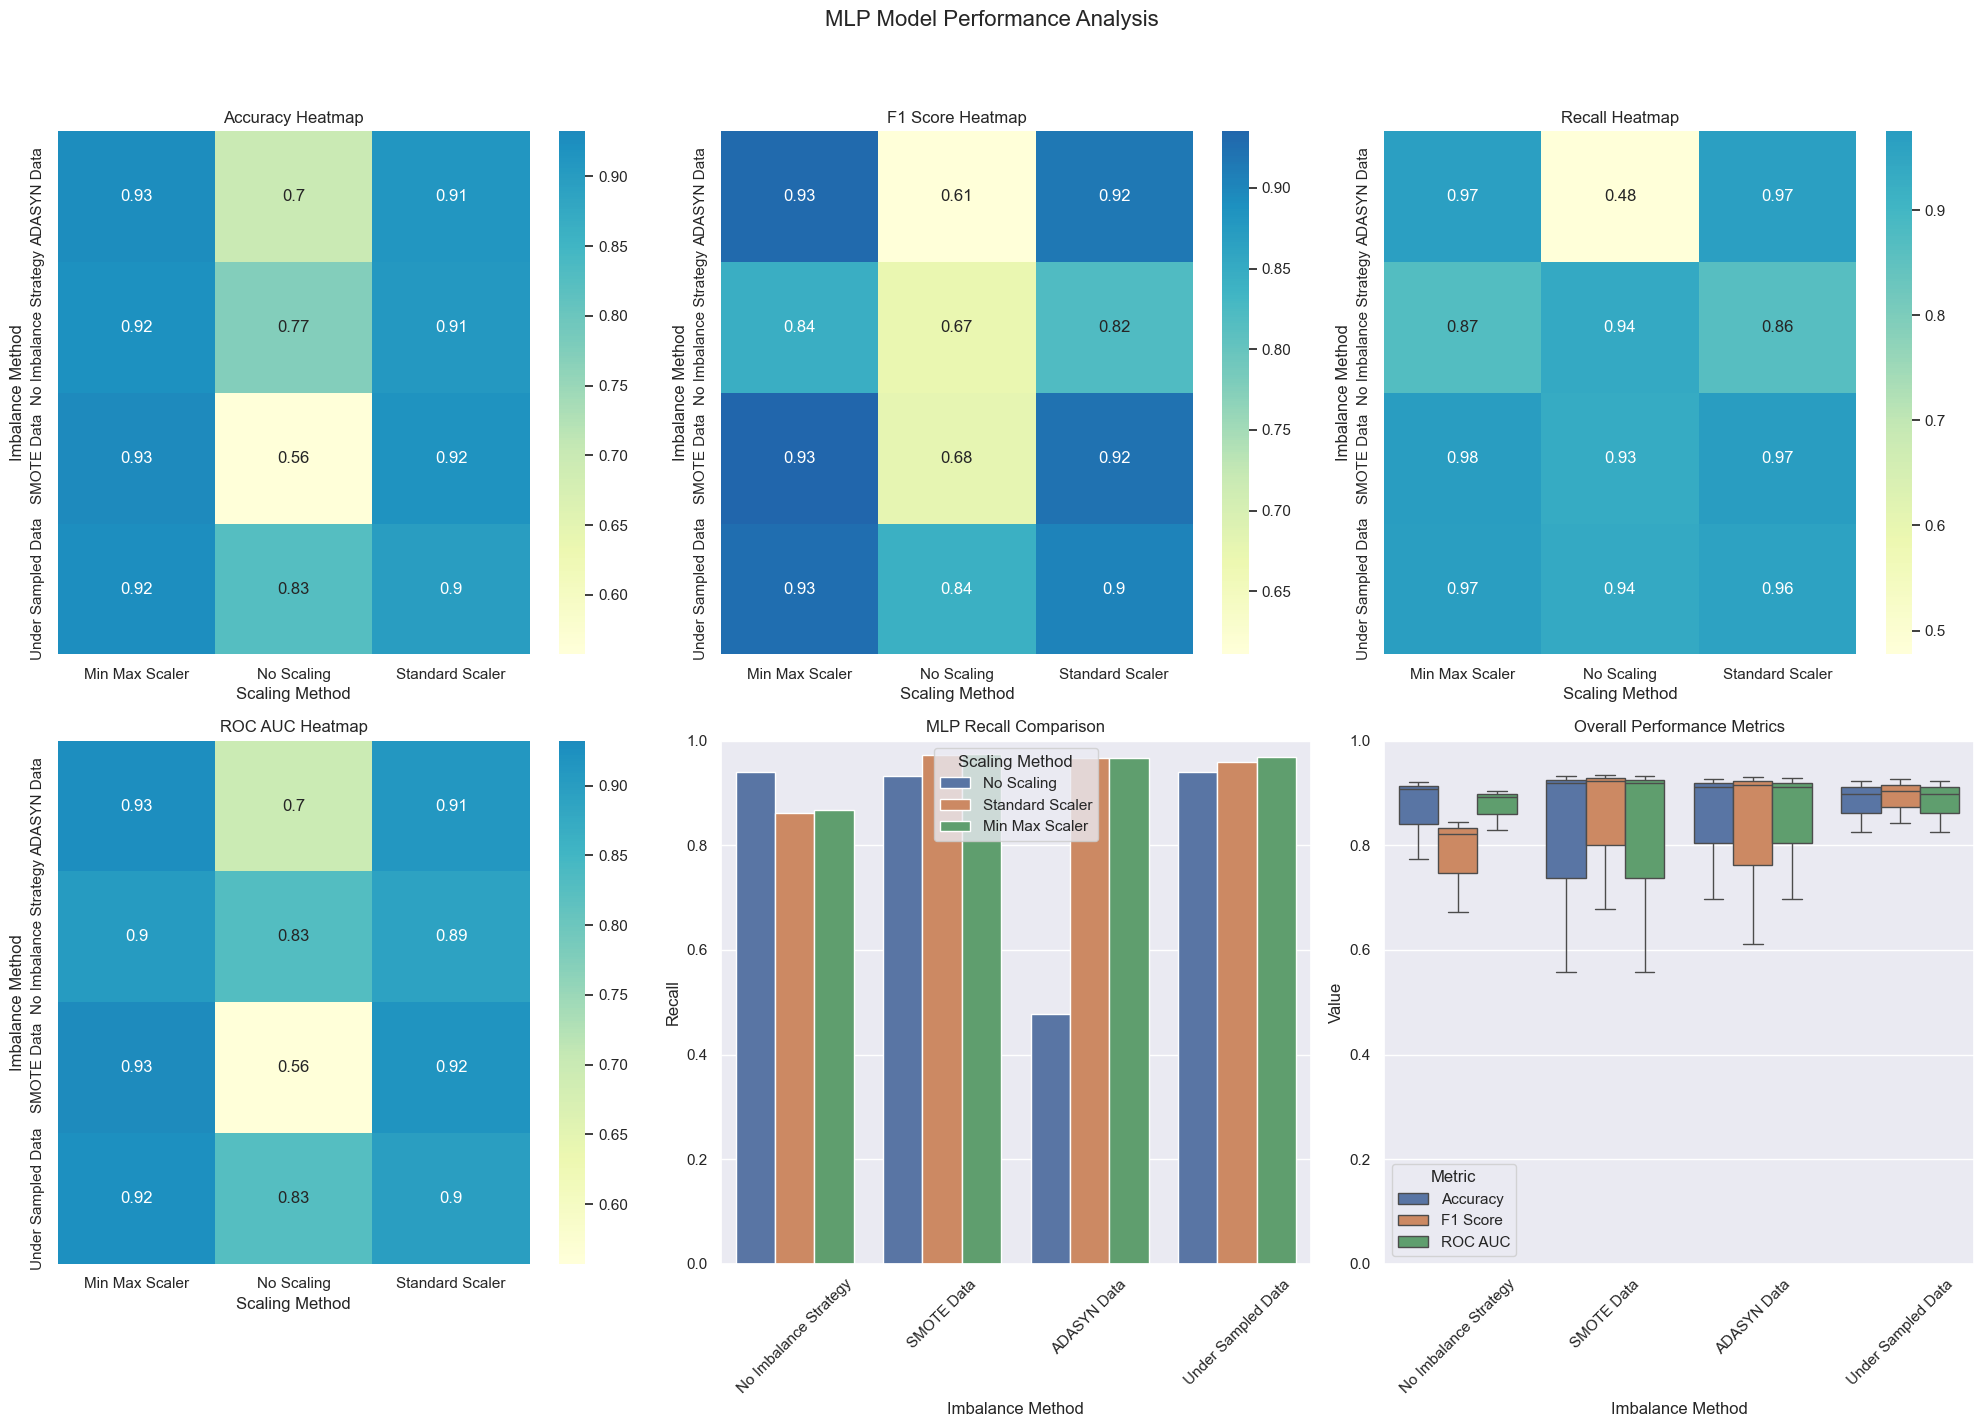


MLP Performance Summary:
                                       Accuracy  F1 Score    Recall   ROC AUC
Imbalance Method      Scaling Method                                         
ADASYN Data           Min Max Scaler   0.927685  0.930012  0.966500  0.927908
                      No Scaling       0.697874  0.610974  0.477245  0.696610
                      Standard Scaler  0.910987  0.915219  0.966470  0.911305
No Imbalance Strategy Min Max Scaler   0.921168  0.844425  0.868086  0.903307
                      No Scaling       0.773615  0.671610  0.939320  0.829370
                      Standard Scaler  0.907267  0.820937  0.862536  0.892216
SMOTE Data            Min Max Scaler   0.932117  0.934910  0.975007  0.932117
                      No Scaling       0.557402  0.678176  0.932669  0.557396
                      Standard Scaler  0.918208  0.922469  0.973163  0.918207
Under Sampled Data    Min Max Scaler   0.923490  0.926850  0.969432  0.923490
                      No Scaling      

In [184]:
visualize_model_performance(results,model_names[model_number])

In [185]:
data_frame = "SMOTE Data"
method = "Min Max Scaler"
model = MLPClassifier(hidden_layer_sizes=(64,32,16 ), # (64,32 ), (32, 16), (128, 64, 32)
                                 activation='relu', #
                                    solver='sgd', # 'lbfgs', 'sgd', 'adam'
                                  alpha=0.0001,
                                  batch_size='auto',
                                  learning_rate='adaptive', # 'constant', 'invscaling', 'adaptive'
                                  learning_rate_init=0.001,
                                  power_t=0.5,
                                  max_iter=200,
                                  shuffle=True,
                                  random_state=42,
                                  tol=0.0001,
                                  verbose=False,
                                  warm_start=False,
                                  momentum=0.9,
                                  nesterovs_momentum=True,
                                  early_stopping=False,
                                  validation_fraction=0.1,
                                  beta_1=0.9,
                                  beta_2=0.999,
                                  epsilon=1e-08,
                                  n_iter_no_change=10,
                                  max_fun=15000)

train_accuracy,test_metric, model = run_check_model(model, results, all_types_data, data_frame,method, importance=False)

C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Score :  0.02858909865279291
Test Score :  0.05998304050937975
Test F1 Score :  0.055438054807263826
Test ROC :  0.05998341410672381
Test Recall :  0.034870574233858975


In [ ]:
# set_save_results(MLP, model_names[model_number], data_frame, method, train_accuracy,test_metric, model, results)

In [611]:
Decision_Tree = {}
c=0
model_number = 1
for data_frame in all_types_data:
    for method in scalling_methods:
        print("Progress: {:.2f}%".format(100*(c)/(len(all_types_data)*len(scalling_methods))))
        c+=1
        print("Data Frame : {} , Scalling Method : {}".format(data_frame,method))
        model = DecisionTreeClassifier(criterion='gini', 
                                       min_samples_split=2, 
                                       min_samples_leaf=1, 
                                       random_state=43,  
                                       class_weight="balanced")
        train_accuracy,test_metric, model = run_model(model, all_types_data, data_frame,method, importance=False)
        set_save_results(Decision_Tree, model_names[model_number], data_frame, method, train_accuracy,test_metric, model, results)
        print("---------------------------------------------------")

Progress: 0.00%
Data Frame : No Imbalance Strategy , Scalling Method : No Scaling
Train Score :  1.0
Test Score :  0.9355395618932311
Test F1 Score :  0.8689548292994211
Test ROC :  0.9125371550638665
Test Recall :  0.8671761280931587
---------------------------------------------------
Progress: 8.33%
Data Frame : No Imbalance Strategy , Scalling Method : Standard Scaler
Train Score :  1.0
Test Score :  0.9355844039371315
Test F1 Score :  0.8691533451746596
Test ROC :  0.9128730155976883
Test Recall :  0.8680858806404658
---------------------------------------------------
Progress: 16.67%
Data Frame : No Imbalance Strategy , Scalling Method : Min Max Scaler
Train Score :  1.0
Test Score :  0.9359207192663842
Test F1 Score :  0.8698661324105272
Test ROC :  0.9134022767087366
Test Recall :  0.868995633187773
---------------------------------------------------
Progress: 25.00%
Data Frame : SMOTE Data , Scalling Method : No Scaling
Train Score :  1.0
Test Score :  0.9446882577842575
Test F

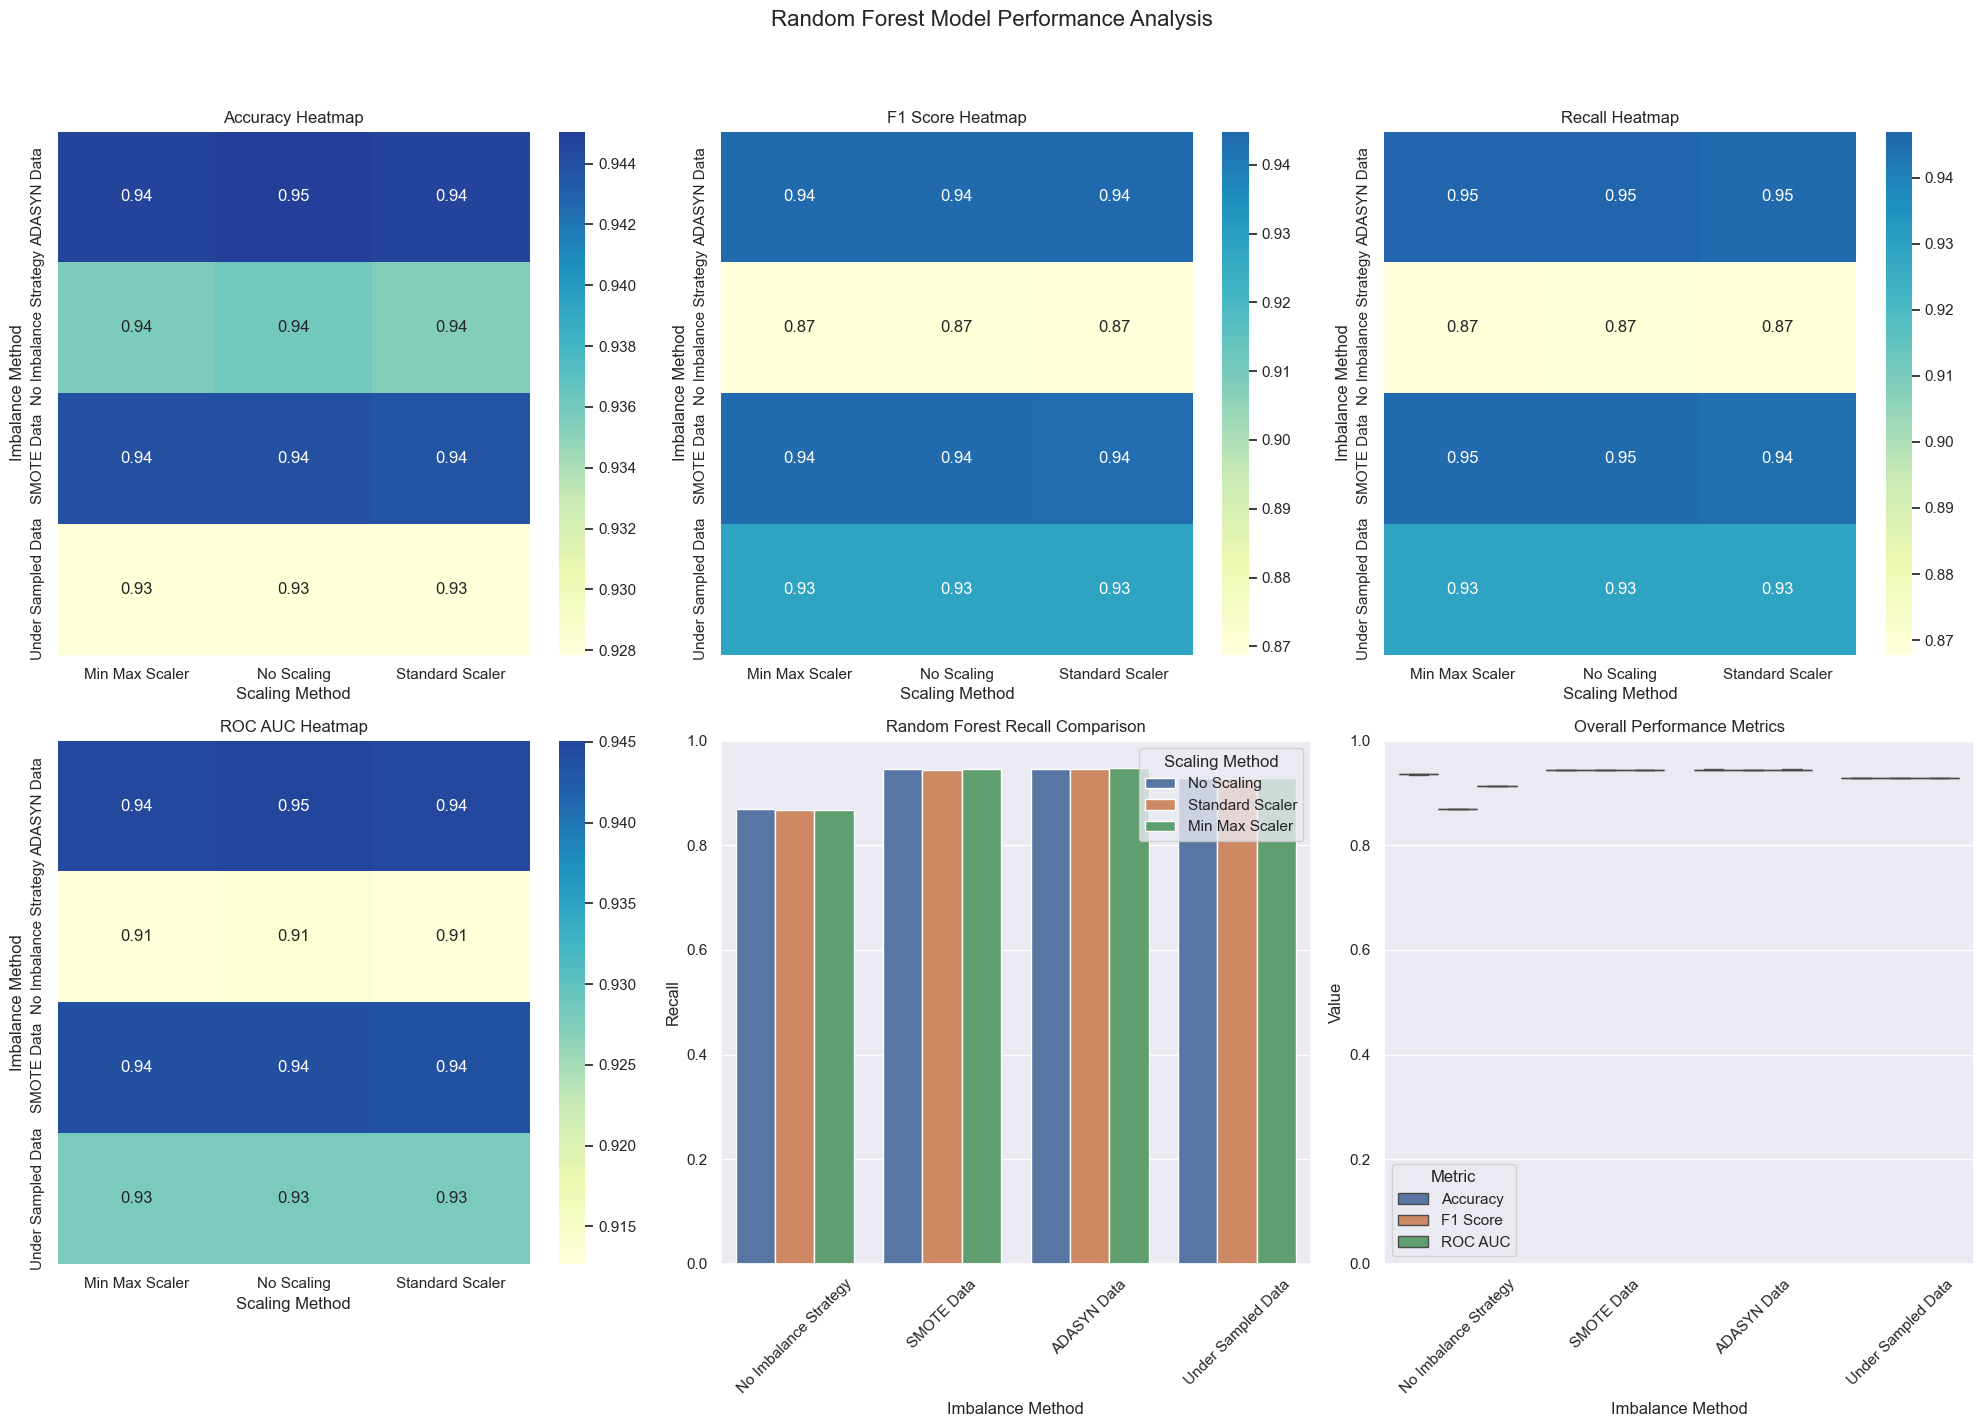


Random Forest Performance Summary:
                                       Accuracy  F1 Score    Recall   ROC AUC
Imbalance Method      Scaling Method                                         
ADASYN Data           Min Max Scaler   0.944743  0.944565  0.946996  0.944756
                      No Scaling       0.945057  0.944848  0.946725  0.945067
                      Standard Scaler  0.944713  0.944492  0.946183  0.944721
No Imbalance Strategy Min Max Scaler   0.935629  0.869197  0.867813  0.912811
                      No Scaling       0.936100  0.870195  0.869087  0.913552
                      Standard Scaler  0.935405  0.868813  0.867904  0.912693
SMOTE Data            Min Max Scaler   0.943989  0.944072  0.945463  0.943989
                      No Scaling       0.944034  0.944133  0.945790  0.944034
                      Standard Scaler  0.943647  0.943708  0.944719  0.943647
Under Sampled Data    Min Max Scaler   0.927857  0.927935  0.928948  0.927857
                      No Sca

In [188]:
visualize_model_performance(results,model_name=model_names[model_number])

In [189]:
data_frame = "ADASYN Data"
method = "No Scaling"
model = DecisionTreeClassifier(criterion='entropy', 
                                splitter='best', 
                                min_samples_split=2, 
                                min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, 
                                random_state=43, 
                                min_impurity_decrease=0.0, 
                                class_weight="balanced")

train_accuracy,test_metric, model = run_check_model(model, results, all_types_data, data_frame,method, importance=True)

Train Score :  0.10785992317705828
Test Score :  0.11018508820492867
Test F1 Score :  0.09639633731833419
Test ROC :  0.10963570347390339
Test Recall :  0.014266795087888196


In [ ]:
# set_save_results(Decision_Tree, model_names[model_number], data_frame, method, train_accuracy,test_metric, model, results)

In [191]:
RF = {}
c= 0
model_number = 2
for data_frame in all_types_data:
    for method in scalling_methods:
        print("Progress: {:.2f}%".format(100*(c)/(len(all_types_data)*len(scalling_methods))))
        c+=1
        print("Data Frame : {} , Scalling Method : {}".format(data_frame,method))
        model = RandomForestClassifier(n_estimators=200, 
                                       criterion='entropy', 
                                       min_samples_split=2, 
                                       min_samples_leaf=1, 
                                       min_weight_fraction_leaf=0.0,  
                                       min_impurity_decrease=0.0, 
                                       bootstrap=True, 
                                       random_state=42, 
                                       verbose=0, 
                                       warm_start=False, 
                                       class_weight="balanced", 
                                       ccp_alpha=0.0)
        train_accuracy,test_metric, model = run_model(model, all_types_data, data_frame,method, importance=False)
        set_save_results(RF, model_names[model_number], data_frame, method, train_accuracy,test_metric, model, results)
        print("---------------------------------------------------")

Progress: 0.00%
Data Frame : No Imbalance Strategy , Scalling Method : No Scaling
Train Score :  1.0
Test Score :  0.9505168045559517
Test F1 Score :  0.9010801846622742
Test ROC :  0.9383925124807362
Test Recall :  0.9144832605531296
---------------------------------------------------
Progress: 8.33%
Data Frame : No Imbalance Strategy , Scalling Method : Standard Scaler
Train Score :  1.0
Test Score :  0.950561646599852
Test F1 Score :  0.9012052511313231
Test ROC :  0.9385753197151262
Test Recall :  0.9149381368267832
---------------------------------------------------
Progress: 16.67%
Data Frame : No Imbalance Strategy , Scalling Method : Min Max Scaler
Train Score :  1.0
Test Score :  0.9505392255779018
Test F1 Score :  0.9011471589890662
Test ROC :  0.9384992214278745
Test Recall :  0.9147561863173217
---------------------------------------------------
Progress: 25.00%
Data Frame : SMOTE Data , Scalling Method : No Scaling
Train Score :  1.0
Test Score :  0.9617965158660498
Test F

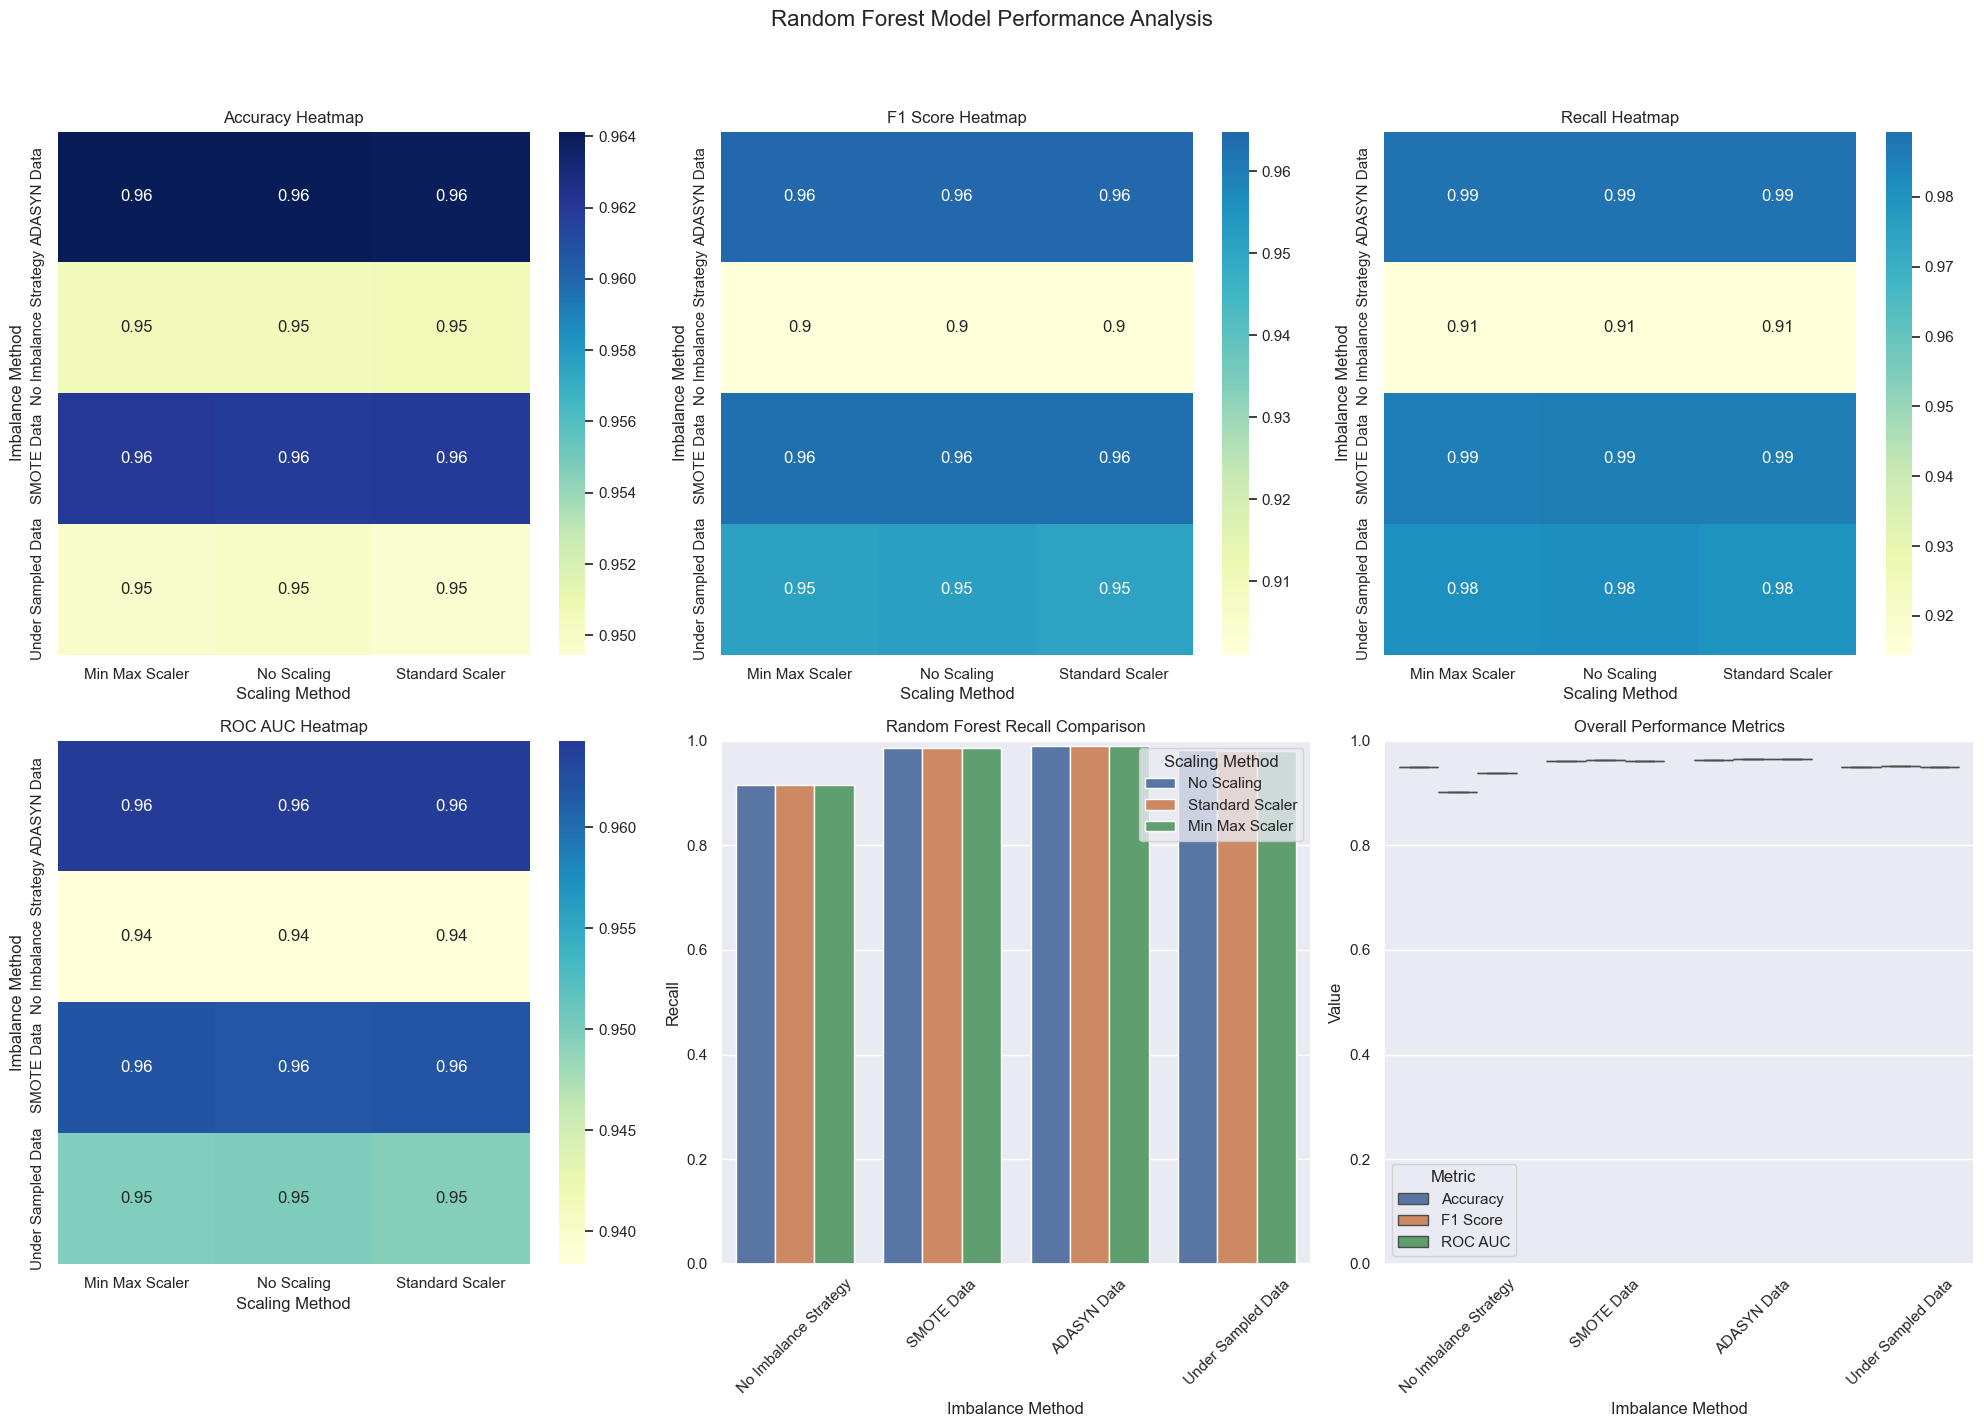


Random Forest Performance Summary:
                                       Accuracy  F1 Score    Recall   ROC AUC
Imbalance Method      Scaling Method                                         
ADASYN Data           Min Max Scaler   0.964134  0.964819  0.989285  0.964279
                      No Scaling       0.964060  0.964751  0.989375  0.964205
                      Standard Scaler  0.964015  0.964702  0.989195  0.964159
No Imbalance Strategy Min Max Scaler   0.950539  0.901147  0.914756  0.938499
                      No Scaling       0.950517  0.901080  0.914483  0.938393
                      Standard Scaler  0.950562  0.901205  0.914938  0.938575
SMOTE Data            Min Max Scaler   0.961960  0.962841  0.985659  0.961960
                      No Scaling       0.961797  0.962705  0.986135  0.961796
                      Standard Scaler  0.961901  0.962797  0.985986  0.961900
Under Sampled Data    Min Max Scaler   0.949736  0.951277  0.981350  0.949736
                      No Sca

In [192]:
visualize_model_performance(results,model_names[model_number])

In [193]:
data_frame = "ADASYN Data"
method = "Min Max Scaler"
model = RandomForestClassifier(n_estimators=150, 
                            criterion='gini', 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            min_impurity_decrease=0.0, 
                            bootstrap=True, 
                            oob_score=False, 
                            random_state=1, 
                            warm_start=False, 
                            class_weight="balanced")

train_accuracy,test_metric, model = run_check_model(model, results, all_types_data, data_frame,method, importance=False)


Train Score :  0.08971867926101207
Test Score :  0.08814507803031435
Test F1 Score :  0.08073480995420479
Test ROC :  0.08786346620288643
Test Recall :  0.038977847339272786


In [ ]:
# set_save_results(RF, model_names[model_number], data_frame, method, train_accuracy,test_metric, model, results)

In [573]:
XGB = {}
c=0
model_number = 5
for data_frame in all_types_data:
    for method in scalling_methods:
        print("Progress: {:.2f}%".format(100*(c)/(len(all_types_data)*len(scalling_methods))))
        c+=1
        print("Data Frame : {} , Scalling Method : {}".format(data_frame,method))
        class_counts = all_types_data[data_frame][method]["y_train"].value_counts()
        num_negative = class_counts[0]
        num_positive = class_counts[1]
        scale_pos_weight = num_negative / num_positive
        model = XGBClassifier(scale_pos_weight=scale_pos_weight, 
                              n_estimators=100, 
                              max_depth=3)
        train_accuracy,test_metric, model = run_model(model, all_types_data, data_frame,method, importance=False)
        set_save_results(XGB, model_names[model_number], data_frame, method, train_accuracy,test_metric, model, results)
        print("---------------------------------------------------")

Progress: 0.00%
Data Frame : No Imbalance Strategy , Scalling Method : No Scaling
Train Score :  0.9277498582671112
Test Score :  0.9240151566108383
Test F1 Score :  0.8635942845642987
Test ROC :  0.94150074300383
Test Recall :  0.9759825327510917
---------------------------------------------------
Progress: 8.33%
Data Frame : No Imbalance Strategy , Scalling Method : Standard Scaler
Train Score :  0.9277498582671112
Test Score :  0.9240151566108383
Test F1 Score :  0.8635942845642987
Test ROC :  0.94150074300383
Test Recall :  0.9759825327510917
---------------------------------------------------
Progress: 16.67%
Data Frame : No Imbalance Strategy , Scalling Method : Min Max Scaler
Train Score :  0.9277498582671112
Test Score :  0.9240151566108383
Test F1 Score :  0.8635942845642987
Test ROC :  0.94150074300383
Test Recall :  0.9759825327510917
---------------------------------------------------
Progress: 25.00%
Data Frame : SMOTE Data , Scalling Method : No Scaling
Train Score :  0.9

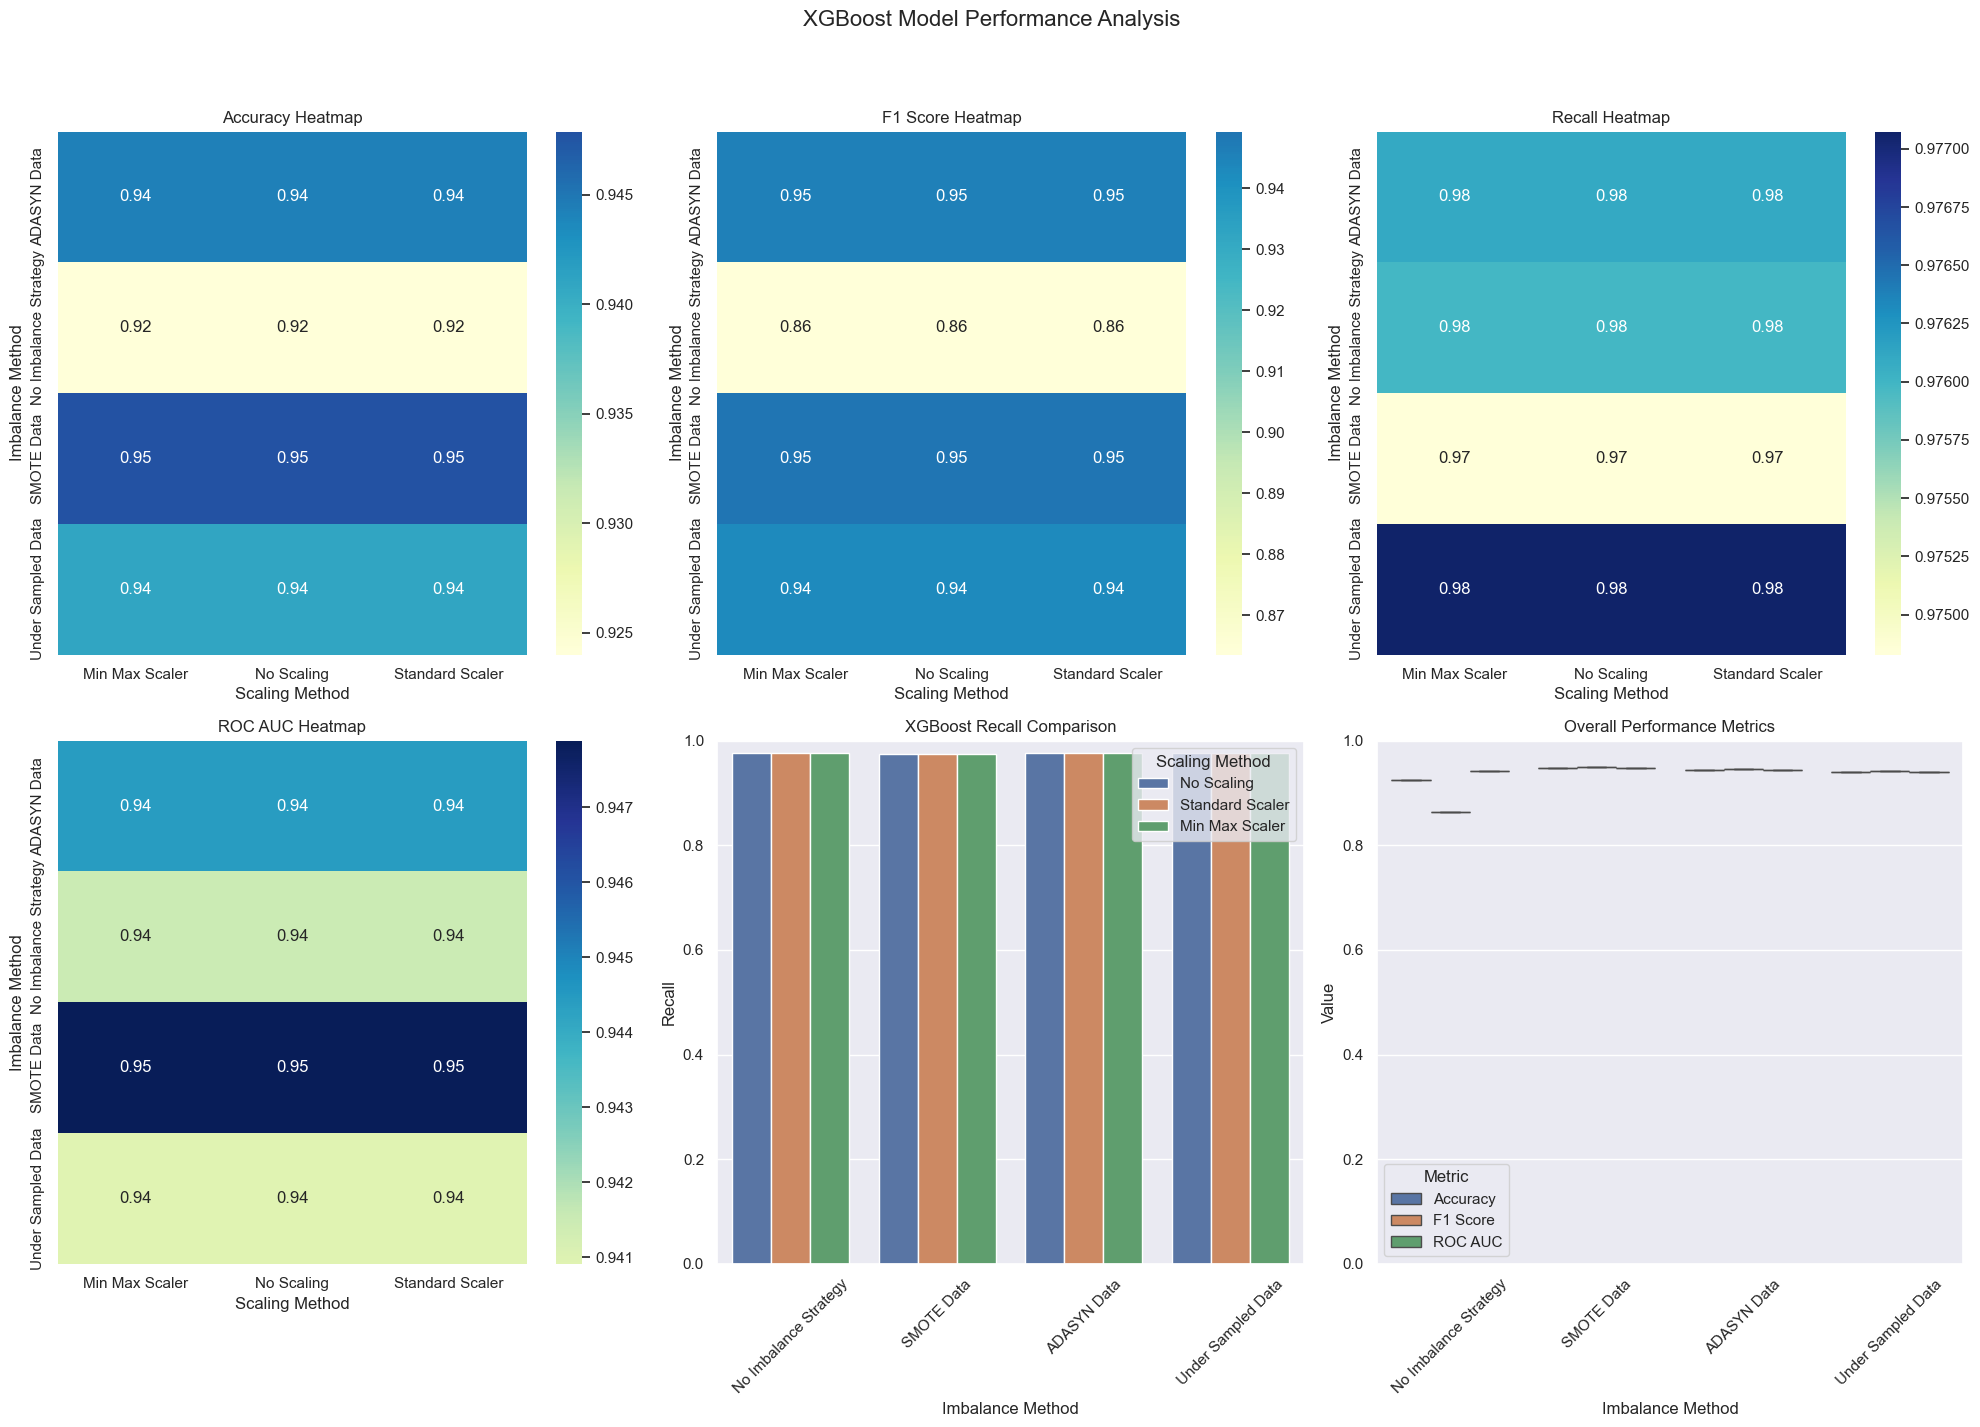


XGBoost Performance Summary:
                                       Accuracy  F1 Score    Recall   ROC AUC
Imbalance Method      Scaling Method                                         
ADASYN Data           Min Max Scaler   0.944264  0.945688  0.976102  0.944446
                      No Scaling       0.944264  0.945688  0.976102  0.944446
                      Standard Scaler  0.944264  0.945688  0.976102  0.944446
No Imbalance Strategy Min Max Scaler   0.924015  0.863594  0.975983  0.941501
                      No Scaling       0.924015  0.863594  0.975983  0.941501
                      Standard Scaler  0.924015  0.863594  0.975983  0.941501
SMOTE Data            Min Max Scaler   0.947887  0.949255  0.974829  0.947886
                      No Scaling       0.947887  0.949255  0.974829  0.947886
                      Standard Scaler  0.947887  0.949255  0.974829  0.947886
Under Sampled Data    Min Max Scaler   0.940912  0.942974  0.977074  0.940912
                      No Scaling  

In [574]:
visualize_model_performance(results,model_names[model_number])

In [575]:
data_frame = "SMOTE Data"
method = "No Scaling"
class_counts = all_types_data[data_frame][method]["y_train"].value_counts()
num_negative = class_counts[0]
num_positive = class_counts[1]
scale_pos_weight = num_negative / num_positive
model = XGBClassifier(learning_rate=0.01, 
                              n_estimators=300, 
                              max_depth=3, 
                              min_child_weight=1, 
                              gamma=0, 
                              subsample=1, 
                              colsample_bytree=1, 
                              objective='binary:logistic', 
                              nthread=1, 
                              scale_pos_weight=scale_pos_weight, 
                              seed=27, 
                              use_label_encoder=False)

train_accuracy,test_metric, model = run_check_model(model, results, all_types_data, data_frame,method, importance=False)


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [04:14:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Train Score :  -0.009767729512952461
Test Score :  0.038917567949538046
Test F1 Score :  0.037992281721062504
Test ROC :  0.038917423216456304
Test Recall :  0.04864623623921449


In [ ]:
# set_save_results(XGB, model_names[model_number], data_frame, method, train_accuracy,test_metric, model, results)

In [577]:
LGBM = {}
model_number = 6
for data_frame in all_types_data:
    for method in scalling_methods:
        print("Model: {}".format(model_names[model_number]))
        print("Data Frame : {} , Scalling Method : {}".format(data_frame,method))
        model = LGBMClassifier(boosting_type='gbdt', 
                              class_weight='balanced')
        train_accuracy,test_metric, model = run_model(model, all_types_data, data_frame,method, importance=False)
        set_save_results(LGBM, model_names[model_number], data_frame, method, train_accuracy,test_metric, model, results)
        print("---------------------------------------------------")

Model: LightGBM
Data Frame : No Imbalance Strategy , Scalling Method : No Scaling
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 25647, number of negative: 78422
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 104069, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Train Score :  0.9462472013760101
Test Score :  0.9421761843904846
Test F1 Score :  0.8936538699435075
Test ROC :  0.9568570379295107
Test Recall :  0.9858078602620087
---------------------------------------------------
Model: LightGBM
Data Frame : No Imbalance Strategy , Scalling

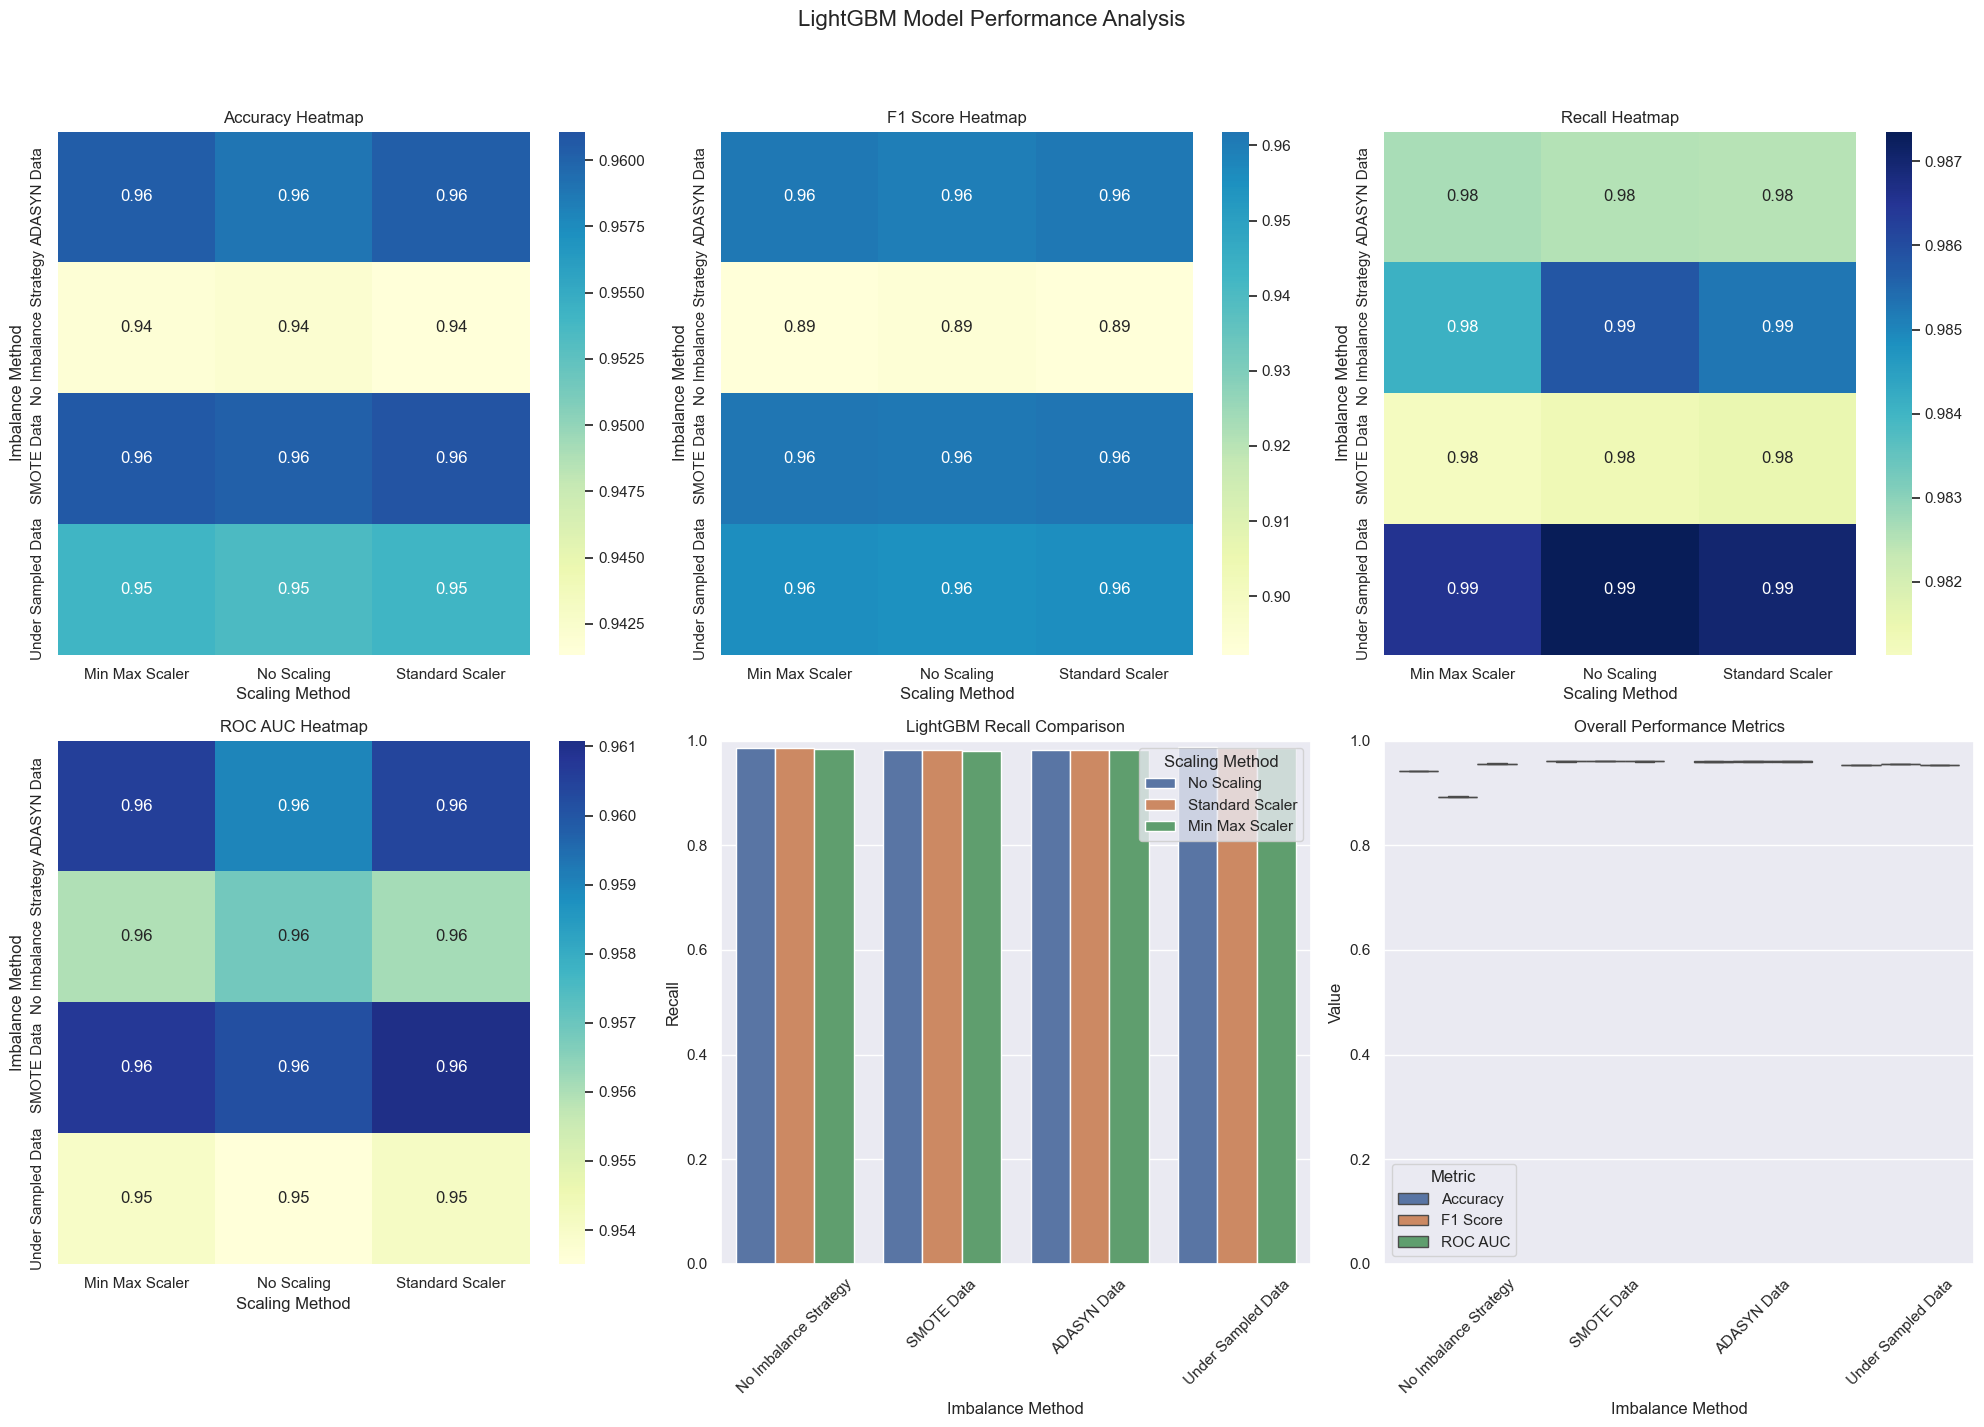


LightGBM Performance Summary:
                                       Accuracy  F1 Score    Recall   ROC AUC
Imbalance Method      Scaling Method                                         
ADASYN Data           Min Max Scaler   0.960439  0.961083  0.982663  0.960566
                      No Scaling       0.958868  0.959594  0.982513  0.959003
                      Standard Scaler  0.960259  0.960907  0.982483  0.960386
No Imbalance Strategy Min Max Scaler   0.941705  0.892713  0.984079  0.955963
                      No Scaling       0.942176  0.893654  0.985808  0.956857
                      Standard Scaler  0.941347  0.892239  0.985262  0.956123
SMOTE Data            Min Max Scaler   0.960711  0.961498  0.981137  0.960710
                      No Scaling       0.960190  0.961016  0.981375  0.960190
                      Standard Scaler  0.961082  0.961863  0.981523  0.961082
Under Sampled Data    Min Max Scaler   0.954012  0.955461  0.986536  0.954012
                      No Scaling 

In [578]:
visualize_model_performance(results,model_names[model_number])

In [581]:
data_frame = "SMOTE Data"
method = "Standard Scaler"
model = LGBMClassifier(boosting_type='gbdt',
                        class_weight='balanced',
                        objective='binary',
                        random_state=42,
                        n_estimators=300,
                        learning_rate=0.01,
                        max_depth=4)

train_accuracy,test_metric, model = run_check_model(model, results, all_types_data, data_frame,method, importance=False)

[LightGBM] [Info] Number of positive: 78421, number of negative: 78422
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2039
[LightGBM] [Info] Number of data points in the train set: 156843, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [ ]:
# set_save_results(LGBM, model_names[model_number], data_frame, method, train_accuracy,test_metric, model, results)

In [583]:
CatBoost = {}
model_number = 7
for data_frame in all_types_data:
    for method in scalling_methods:
        print("Model: {}".format(model_names[model_number]))
        print("Data Frame : {} , Scalling Method : {}".format(data_frame,method))
        model = CatBoostClassifier(iterations=100,
                              learning_rate=0.01,
                              depth=6,
                              loss_function='Logloss',
                              verbose=True)
        train_accuracy,test_metric, model = run_model(model, all_types_data, data_frame,method, importance=False)
        set_save_results(CatBoost, model_names[model_number], data_frame, method, train_accuracy,test_metric, model, results)
        print("---------------------------------------------------")

Model: CatBoost
Data Frame : No Imbalance Strategy , Scalling Method : No Scaling
0:	learn: 0.6869824	total: 146ms	remaining: 14.5s
1:	learn: 0.6805578	total: 151ms	remaining: 7.4s
2:	learn: 0.6745280	total: 157ms	remaining: 5.07s
3:	learn: 0.6685602	total: 161ms	remaining: 3.87s
4:	learn: 0.6627655	total: 167ms	remaining: 3.16s
5:	learn: 0.6570064	total: 174ms	remaining: 2.72s
6:	learn: 0.6513353	total: 180ms	remaining: 2.38s
7:	learn: 0.6458949	total: 186ms	remaining: 2.13s
8:	learn: 0.6404222	total: 192ms	remaining: 1.94s
9:	learn: 0.6350111	total: 198ms	remaining: 1.78s
10:	learn: 0.6298693	total: 205ms	remaining: 1.65s
11:	learn: 0.6246802	total: 210ms	remaining: 1.54s
12:	learn: 0.6196251	total: 217ms	remaining: 1.45s
13:	learn: 0.6146153	total: 222ms	remaining: 1.36s
14:	learn: 0.6098450	total: 228ms	remaining: 1.29s
15:	learn: 0.6049305	total: 234ms	remaining: 1.23s
16:	learn: 0.6000086	total: 240ms	remaining: 1.17s
17:	learn: 0.5953767	total: 246ms	remaining: 1.12s
18:	learn: 

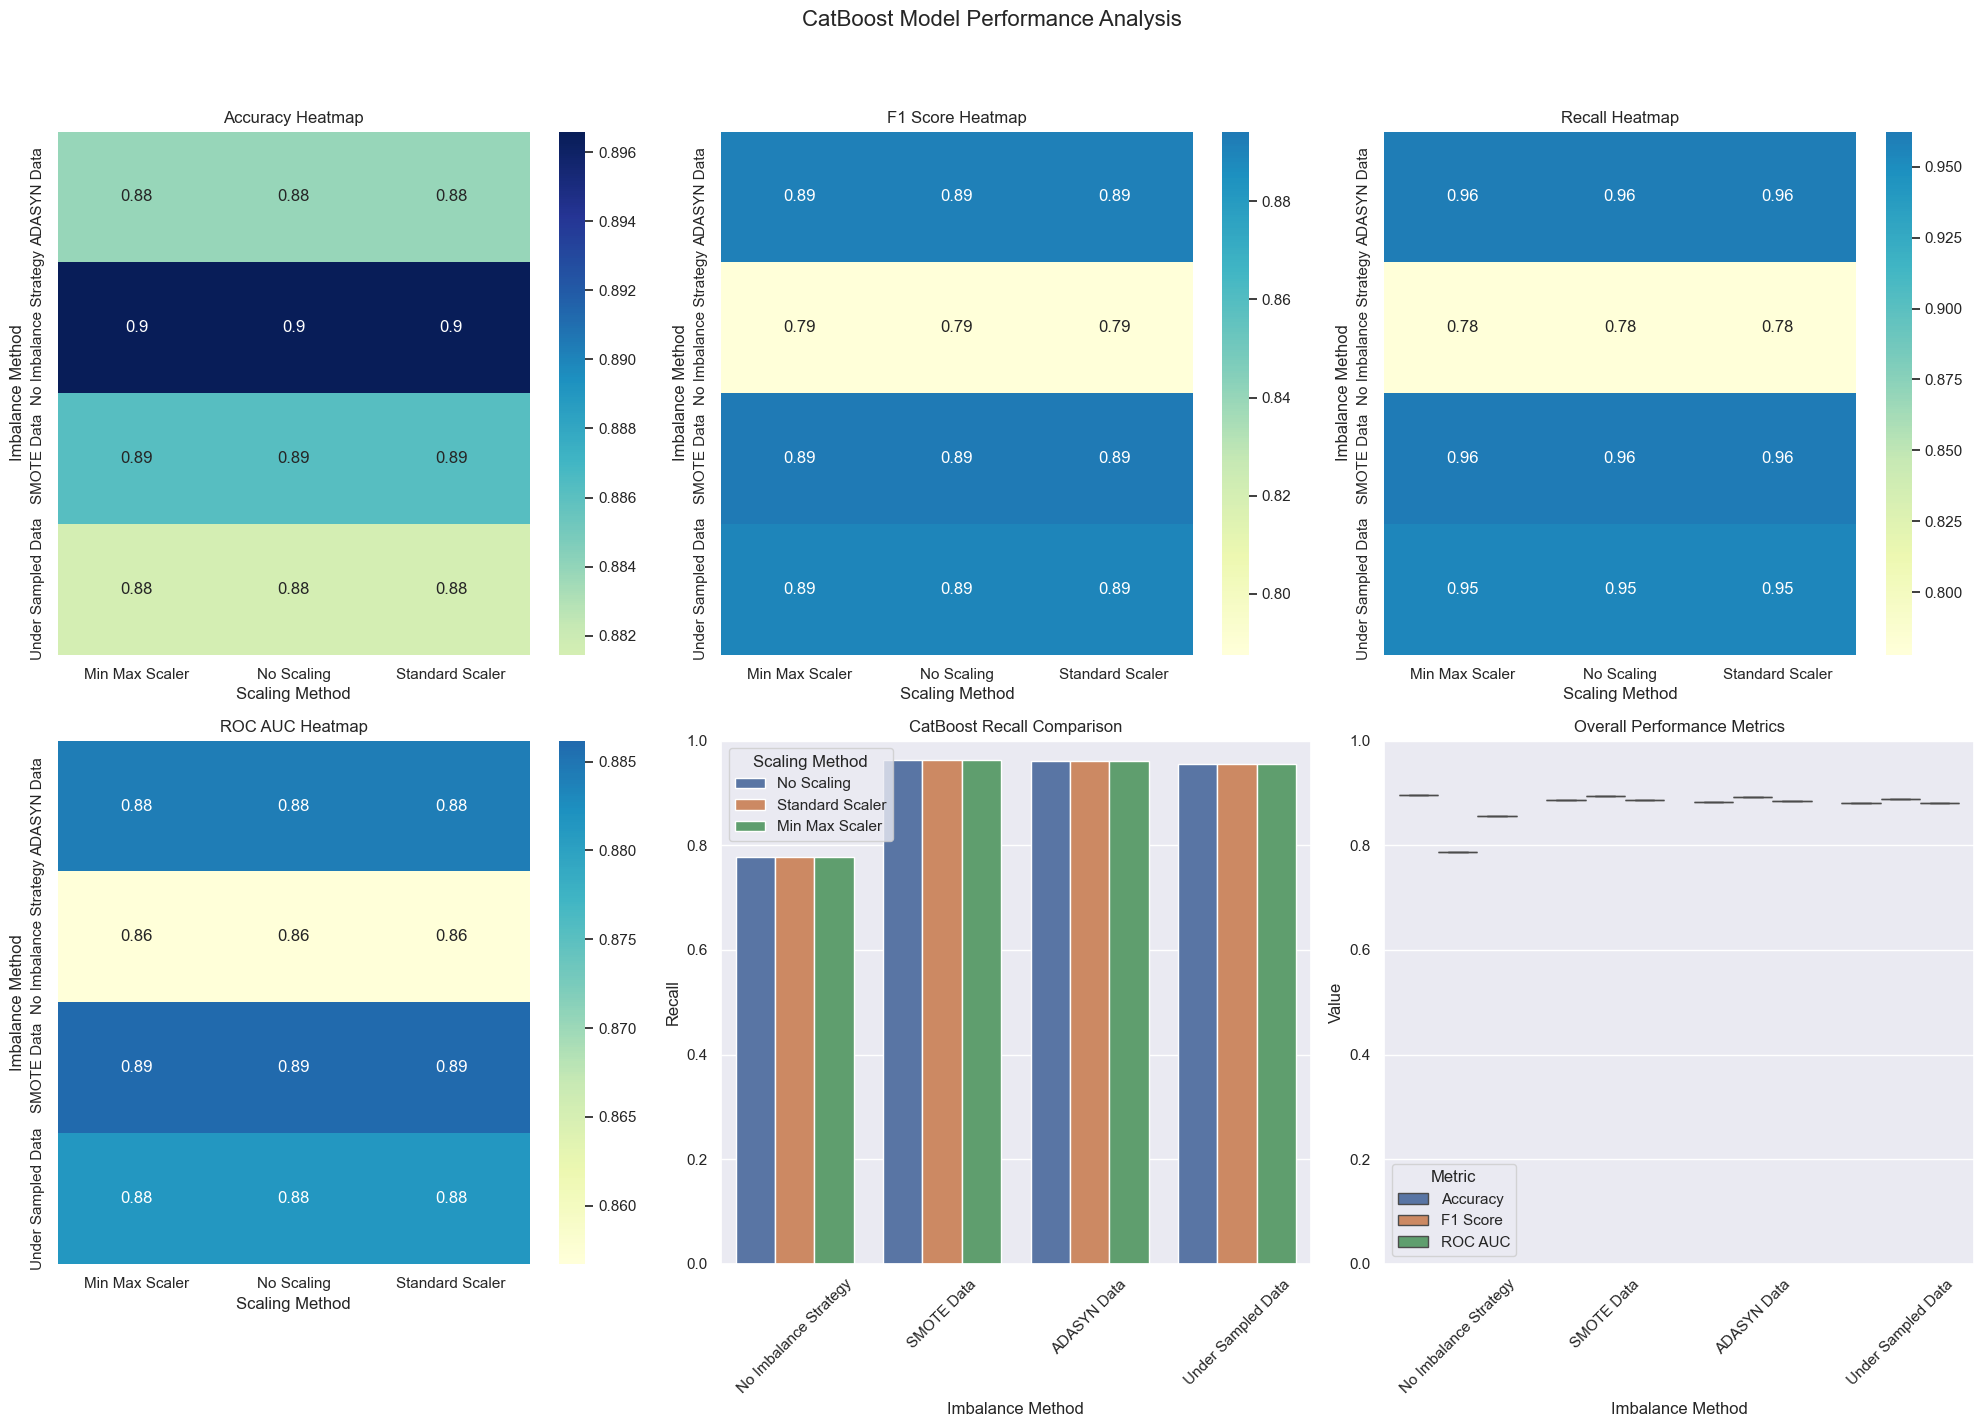


CatBoost Performance Summary:
                                       Accuracy  F1 Score    Recall   ROC AUC
Imbalance Method      Scaling Method                                         
ADASYN Data           Min Max Scaler   0.883830  0.891567  0.960721  0.884270
                      No Scaling       0.883830  0.891567  0.960721  0.884270
                      Standard Scaler  0.883830  0.891567  0.960721  0.884270
No Imbalance Strategy Min Max Scaler   0.896594  0.787642  0.778111  0.856728
                      No Scaling       0.896594  0.787642  0.778111  0.856728
                      Standard Scaler  0.896594  0.787642  0.778111  0.856728
SMOTE Data            Min Max Scaler   0.886178  0.894237  0.962362  0.886177
                      No Scaling       0.886178  0.894237  0.962362  0.886177
                      Standard Scaler  0.886178  0.894237  0.962362  0.886177
Under Sampled Data    Min Max Scaler   0.881459  0.889567  0.954876  0.881459
                      No Scaling 

In [584]:
visualize_model_performance(results,model_names[model_number])

In [586]:
data_frame = "SMOTE Data"
method = "No Scaling"
model = CatBoostClassifier(iterations=100,
                              learning_rate=0.01,
                              depth=8,
                              loss_function='Logloss',
                              verbose=True)

train_accuracy,test_metric, model = run_check_model(model, results, all_types_data, data_frame,method, importance=False)

0:	learn: 0.6868481	total: 20.5ms	remaining: 2.03s
1:	learn: 0.6806180	total: 29.9ms	remaining: 1.47s
2:	learn: 0.6746196	total: 39.1ms	remaining: 1.26s
3:	learn: 0.6687148	total: 49.1ms	remaining: 1.18s
4:	learn: 0.6629387	total: 59.2ms	remaining: 1.13s
5:	learn: 0.6571811	total: 69.9ms	remaining: 1.09s
6:	learn: 0.6515503	total: 81ms	remaining: 1.08s
7:	learn: 0.6460793	total: 91ms	remaining: 1.05s
8:	learn: 0.6406700	total: 102ms	remaining: 1.03s
9:	learn: 0.6353604	total: 112ms	remaining: 1.01s
10:	learn: 0.6301092	total: 122ms	remaining: 987ms
11:	learn: 0.6249606	total: 135ms	remaining: 990ms
12:	learn: 0.6198995	total: 146ms	remaining: 979ms
13:	learn: 0.6147926	total: 155ms	remaining: 955ms
14:	learn: 0.6098763	total: 165ms	remaining: 936ms
15:	learn: 0.6051362	total: 176ms	remaining: 921ms
16:	learn: 0.6004340	total: 185ms	remaining: 904ms
17:	learn: 0.5955186	total: 196ms	remaining: 893ms
18:	learn: 0.5905798	total: 207ms	remaining: 881ms
19:	learn: 0.5857987	total: 216ms	rem

In [ ]:
# set_save_results(CatBoost, model_names[model_number], data_frame, method, train_accuracy,test_metric, model, results)

## 5.2 Model Comparisons
Compare the performance of different models.

In [614]:
# train_accuracies = []
# test_accuracies = []
# test_recalls = []
# test_precisions = []
# test_f1s = []
# test_ROCs = []
# x_labels = []

# for model_name, models in results.items():
#     for preprocess, imbalanced_strategies in models.items():
#         for scaling, metrics in imbalanced_strategies.items():
#                 train_accuracy = metrics.get("Train", None)
#                 test_metrics = metrics.get("Test", None)
#                 test_accuracy = test_metrics.get("Accuracy", None) 
#                 test_recall = test_metrics.get("Recall", None) 
#                 test_precision = test_metrics.get("Precision", None) 
#                 test_f1 = test_metrics.get("F1", None) 
#                 test_ROC = test_metrics.get("ROC", None) 

#                 if train_accuracy is not None and test_accuracy is not None:
#                     x_labels.append(f"{model_name}-{preprocess}({scaling})")
#                     train_accuracies.append(train_accuracy)
#                     test_accuracies.append(test_accuracy)
#                     test_recalls.append(test_recall)
#                     test_ROCs.append(test_ROC)
#                     test_precisions.append(test_precision)
#                     test_f1s.append(test_f1)
                
               


# data = list(zip(x_labels, train_accuracies, test_accuracies, test_recalls))
# data_sorted = sorted(data, key=lambda x: x[3], reverse=True)
# x_labels_sorted, train_accuracies_sorted, test_accuracies_sorted = zip(*data_sorted)

# # Plotting
# x = range(len(x_labels_sorted)) 
# width = 0.35 

# plt.figure(figsize=(40, 12))

# plt.bar([pos - width/2 for pos in x], train_accuracies_sorted, width, label='Train Accuracy')
# plt.bar([pos + width/2 for pos in x], test_accuracies_sorted, width, label='Test Accuracy')

# plt.xlabel("Models with Preprocessing and Scaling")
# plt.ylabel("Accuracy")
# plt.title("Train and Test Accuracies for Models (Sorted by Test Accuracy)")
# plt.xticks(ticks=x, labels=x_labels_sorted, rotation=45, ha='right')
# plt.legend()
# plt.tight_layout()
# plt.show()

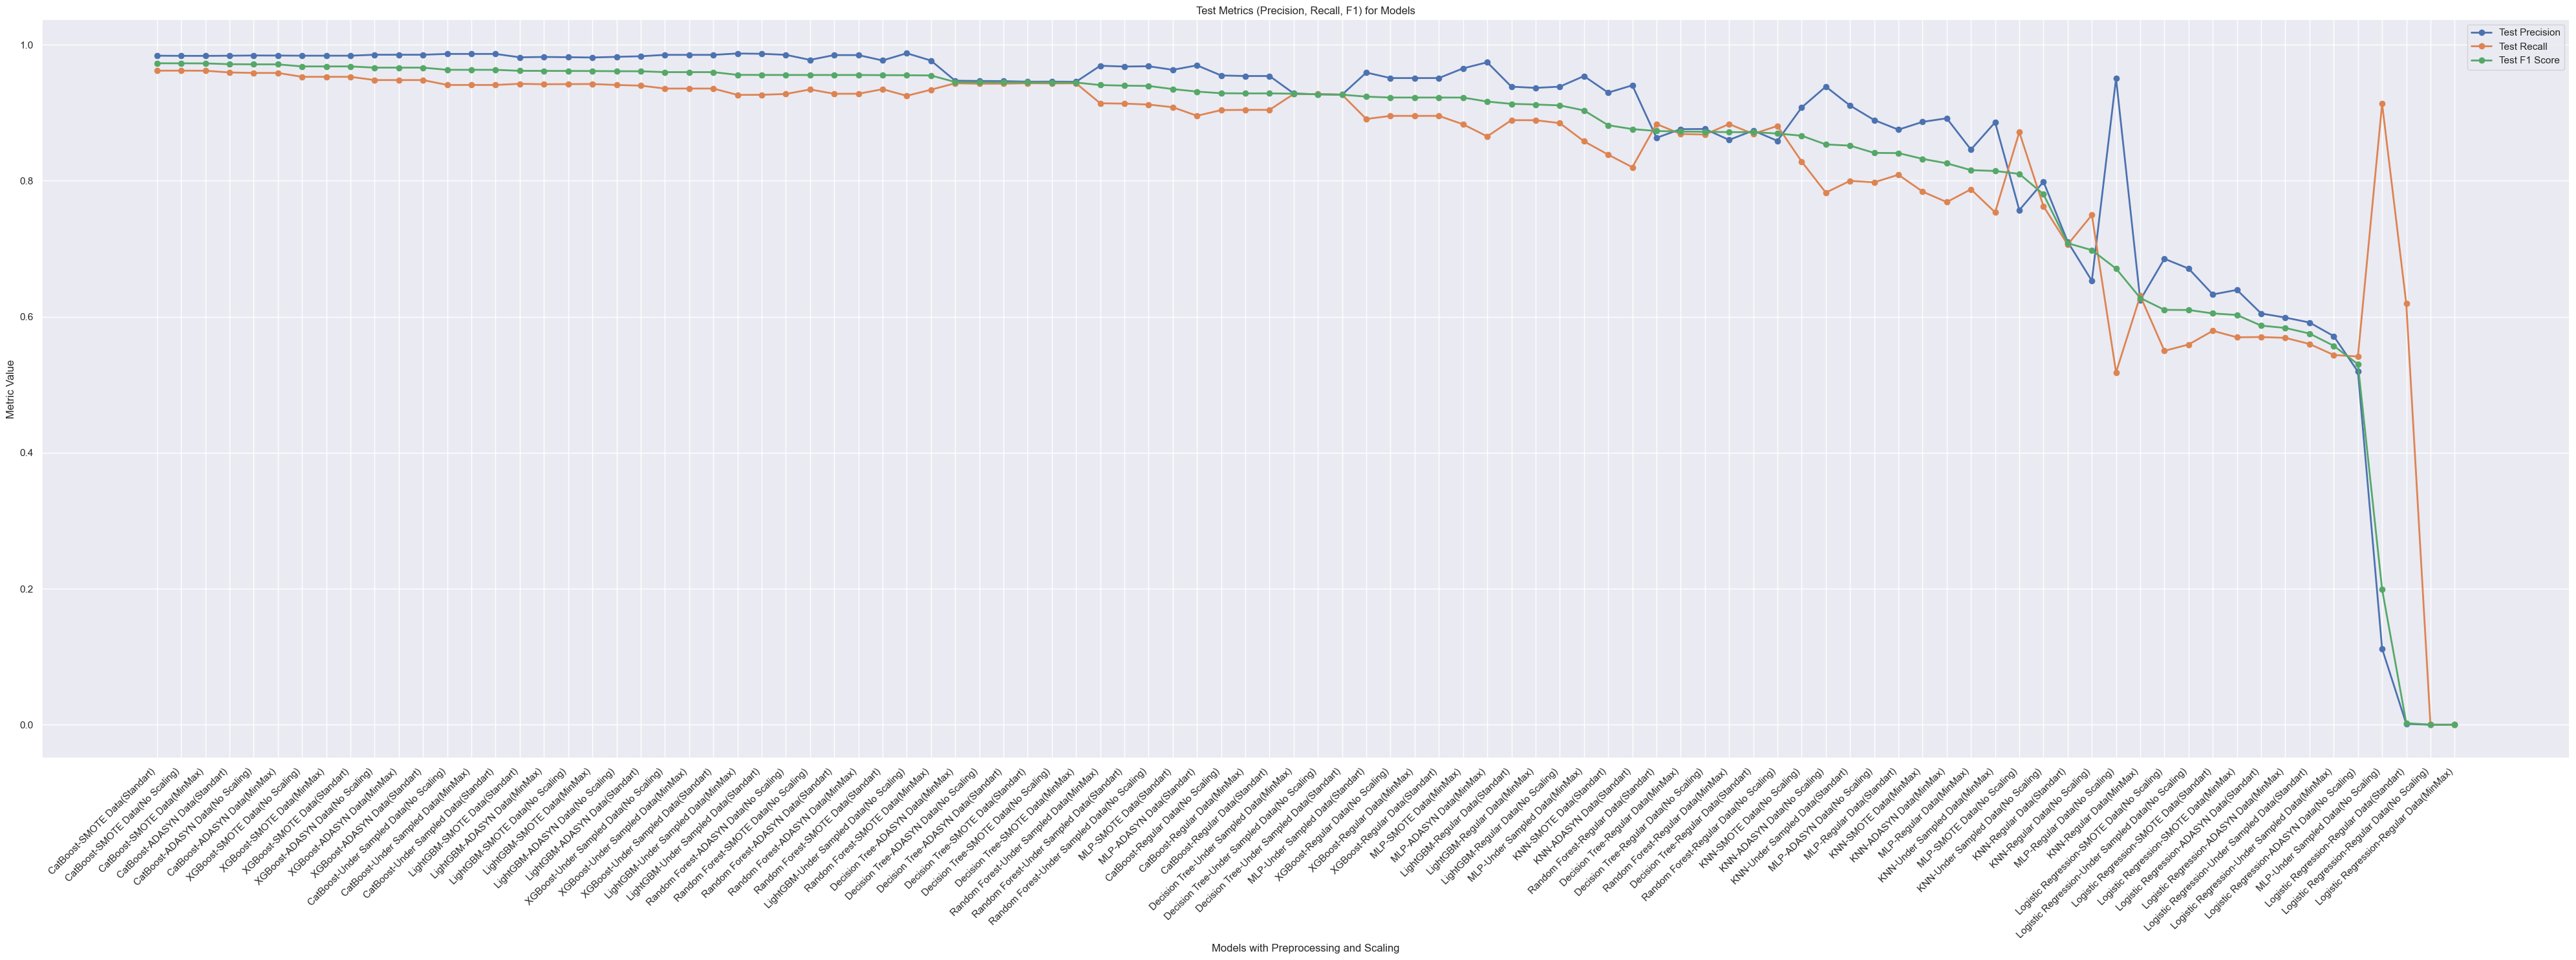

In [ ]:
# data = list(zip(x_labels, test_recalls, test_precisions, test_f1s))
# data_sorted = sorted(data, key=lambda x: x[3], reverse=True)

# x_labels_sorted, test_precisions_sorted, test_recalls_sorted, test_f1_scores_sorted = zip(*data_sorted)

# x = range(len(x_labels_sorted)) 

# plt.figure(figsize=(40, 15))
# plt.plot(x, test_precisions_sorted, marker='o', label='Test Precision', linestyle='-', linewidth=2)
# plt.plot(x, test_recalls_sorted, marker='o', label='Test Recall', linestyle='-', linewidth=2)
# plt.plot(x, test_f1_scores_sorted, marker='o', label='Test F1 Score', linestyle='-', linewidth=2)

# plt.xlabel("Models with Preprocessing and Scaling")
# plt.ylabel("Metric Value")
# plt.title("Test Metrics (Precision, Recall, F1) for Models")
# plt.xticks(ticks=x, labels=x_labels_sorted, rotation=45, ha='right')
# plt.legend()
# plt.tight_layout()
# plt.show()

## 5.3 Feature Importance
Analyze and explain the most important features:

## 5.4 Final Model
Choose the best-performing model based on your evaluations and fine-tuning.

## 5.5 Create a Model with Fewer Features (if necessary)

## 5.6 Pickle the Model
Save the final model for future deployment:

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">6. Conclusion</p>

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## Final Remarks
Summarize the key takeaways from the project. Highlight what was learned throughout the data science workflow and model deployment.

......